
# **Assignment: `Credit EDA Case Study` by `Devendra Kumar`**

### **CONTEXT**

1. **Loading Data `Application Data`**
2. **Checking the structure of Application_Data**
3. **Data Quality Check & Missing Values**<br>
    - 3.1 Finding the percentage of missing values for all the columns 
    - 3.2 Removing columns with high missing percentage (above 50%) 
    - 3.3 Imputing data for missing values in application_clean 
    - 3.4 Standarizing the Datatypes and Values 
    - 3.5 Outliers Detection in application_clean Dataframe 
        - Converting DAYS into YEARS 
    3.6 Binning of Continous Variables 
4. **Analysis of Application_Data**<br>
    - 4.1 Checking Imbalance Percentage
    - 4.2 Dividing data in 2 Sets
        - Performing Univariate Analysis on Target 0 and 1 Datasets
        - Countplot for these categorical variables - target1
        - Countplot for these categorical variables - target0
    - 4.3 Data Imbalance Calculation 
        - 4.3.1 Categorical Univariate Analysis on Target 0 (Client with no Payment Difficulty) Datasets - Demographic View
        - 4.3.2 Categorical Univariate Analysis on Target 1 (Client with Payment Difficulty) Datasets - Demographic View
    - 4.4 Finding Correlation for Numerical columns in Target 1 and 0
    - 4.5 Checking and Comparing correlation of both Target 1 and 0.
    - 4.6 Segmented Univariate Analysis of Application Clean
        - 4.6.1 Boxplot Analysis for Target = 0
        - 4.6.2 Boxplot Analysis for Target = 1
        - 4.6.3 Segmented Univariate Analysis overall.
5. **Bivariate Analysis on Application Clean**<br>
6. **Loading Previous Applciation Data**<br>
7. **Checking the structure of previous_data dataframe**<br>
8. **Data Quality Check & Missing Values in previous_data**<br>
    - 8.1 Analyzing the missing values
    - 8.2 Removing Columns which has missing values above 90%
    - 8.3 Checking duplicates
    - 8.4 Standarizing the Datatypes and Values
9. **Univariate and Segmented Univariate Analysis of previous_clean dataframe**<br>
    - 9.1 Univariate Analysis
    - 9.2 Segmented Univariate Analysis
10. **Merging the Application Data and Previous Application Data.**<br>
11. **Univariate, Segmented Univariate and Bivariate Analysis of merged_data**<br>
    - 11.1 Univariate, Segmented Univariate Analysis


In [4]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

# Importing Seaborn and Matplotlib packages as well for Viz. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# 1. **Loading Data `Application Data`**

Import data files into dataframe.<br>
**`application_data`** - contains all the information of the client at the time of application.The data is about whether a client has payment difficulties <br>
**`previous_application`** - contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer. </font>

In [6]:
# Read application data file into dataframe
application_data=pd.read_csv("application_data.csv")

# 2. **Checking the structure of `Application_Data`**

**Let's have some glance on the `application_data` dataframe**

In [7]:
# Shape of application_data dataframe
application_data.shape

(307511, 122)

In [8]:
# Datatypes of application_data dataframe
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [9]:
# Quick review to the statistics matrixes of application_data dataframe
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

<br>

# 3. **Data Quality Check & Missing Values**
1. Analyze existing dataframes for missing values in columns
2. Analyze existing dataframes for missing values in rows 
3. Removing the columns which has more than **`50%`** missing values
4. Filter data - Remove columns which do not add any anlytical value 
5. Removing Deduplicate rows.

### 3.1 **Finding the percentage of missing values for all the columns.**

In [10]:
# Analyze columns for missing values in application_data
application_nullcols = round(100*(application_data.isnull().sum()/len(application_data.index)),2).sort_values(ascending=False)
application_nullcols

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### 3.2 **Removing columns with high missing percentage (above 50%).**
As we see several columns with extremly high missing values ( more than 50% ), we will be filtering them out for our analysis. <br>```application_clean``` - Filtered application_data which will be used for analysis

In [11]:
# Create new DF by removing columns where more than 50% of null values from application_data

# Create a list of columns to be deleted (Logic null% > 50)
application_coltodelete = list(application_nullcols[application_nullcols.values>50].index)

# Create new DF by removing the columns using application_coltodelete from application dataframe
application_clean = application_data.drop(application_coltodelete, axis=1)

# Size of new dataframe
application_clean.shape

(307511, 81)

In [12]:
# Lets check again the missing values > 1% of remaining columns in `application_clean` dataframe.
round((application_clean.isnull().sum()/len(application_clean.index))*100,2).sort_values(ascending=False)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
NAME_TYPE_SUITE                  0.42
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
FLAG_DOCUMENT_5                  0.00
NAME_FAMILY_STATUS               0.00
FLAG_EMAIL                       0.00
FLAG_PHONE  

**Removing `FLAG_DOCUMENT` and `EXT_SOURCE` columns as they do not provide any analytical significance.**

In [13]:
# FLAG_DOCUMENT and EXT_SOURCE Do not provide any analytical value and hence we will remove it

# List of columns
appcollist=list(application_clean.columns)

# FLAG_DOCUMENT and EXT_SOURCE columns
flagcol = [col for col in appcollist if col.startswith("FLAG_DOCUMENT") or col.startswith("EXT_SOURCE")]

# Drop FLAG_DOCUMENT and EXT_SOURCE columns from dataframe
application_clean = application_clean.drop(flagcol, axis=1)

# Size of application_clean dataframe
application_clean.shape

(307511, 59)

In [14]:
# Drop duplicate data from application_clean, if any
application_clean.drop_duplicates(subset=None, inplace=True)
application_clean.shape

(307511, 59)

**OKAY !! We didn't have any duplicate values in `application_clean` dataframe. NICE !!**

In [15]:
# Check null values percentage in application_clean dataframe
print(round(100*(application_clean.isnull().sum()/len(application_clean.index)),2).sort_values(ascending=False))

FLOORSMAX_MEDI                  49.76
FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
NAME_TYPE_SUITE                  0.42
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
AMT_GOODS_PRICE                  0.09
DAYS_BIRTH                       0.00
REGION_POPULATION_RELATIVE       0.00
NAME_HOUSING_TYPE                0.00
NAME_FAMILY_STATUS               0.00
NAME_EDUCATION_TYPE              0.00
NAME_INCOME_

In [16]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

application_clean[numeric_columns]=application_clean[numeric_columns].apply(pd.to_numeric)
application_clean.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### 3.3 **Imputing data for missing values in `application_clean`**
- Determine if data can be imputed for columns with missing value in application_clean <br>
- Here we're taking those columns which are having over **`~13.5%`** missing values and are important and needs deep understanding.
- As our instructor **`Mr.Sumit Shukla`** said in **`EDA Case Study Session`** not to impute data and said just to report the columns which can be imputed. So we are going to find the columns in **`application_clean`** dataframe which can be imputed with some suitable matric.


In [17]:
# Below are the columns which we determined to imputed for columns with missing value in application_clean.
# Here we're taking those columns which are having over ~13.5% missing values and are important and needs deep understanding.

cols2anz = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY",
"AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_QRT","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE"]

application_clean[cols2anz].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.267395   
std                      1.869295                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.007000   
std                      0.204685                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.265474   
std                      0.083849                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                 261.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   0.143421                  1.405292   
std                    0.446698                  2.379803   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   0.100049                  1.422245  
std                    0.362291                  2.400989  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    0.000000                  2.000000  
max                   24.000000                348.000000

**Findings** : Here we have identified the below 7 columns which can be imputed with 0, as their min, max and all quartiles values are zero.

    1. AMT_REQ_CREDIT_BUREAU_MON
    2. AMT_REQ_CREDIT_BUREAU_WEEK
    3. AMT_REQ_CREDIT_BUREAU_DAY
    4. AMT_REQ_CREDIT_BUREAU_HOUR
    5. AMT_REQ_CREDIT_BUREAU_QRT
    6. DEF_30_CNT_SOCIAL_CIRCLE
    7. DEF_60_CNT_SOCIAL_CIRCLE

### 3.4 **Standarizing the Datatypes and Values**
1. Analyzing the Datatypes.
2. Analyzing the Values.
3. Standarizing the values of columns, say -ve days and date columns.
4. Standarizing the Datatypes.

In [18]:
# Here we are going to analyis and observe every column, datatype and their unique values.
# The purpose of this task is to analyis various types of variables like Numerical, Catagorial Variables, Univariate and Multivariate variables,
# Continous and Descriate etc.

# To achive above task I'm creating below for loop to walk through all the columns and print their datatype, unique values 
# and count of unique values. 

for col in application_clean.columns:
    uniq_val = application_clean[col].unique()
    col_dtype = application_clean[col].dtypes
    print('Column Name\t\t:{}\nDatatype\t\t:{}\nUnique Values Count\t:{}\nUnique Values\t\t:{}'.format(col,col_dtype,len(uniq_val),uniq_val))
    print('='*100)

Column Name		:SK_ID_CURR
Datatype		:int64
Unique Values Count	:307511
Unique Values		:[100002 100003 100004 ... 456253 456254 456255]
Column Name		:TARGET
Datatype		:int64
Unique Values Count	:2
Unique Values		:[1 0]
Column Name		:NAME_CONTRACT_TYPE
Datatype		:object
Unique Values Count	:2
Unique Values		:['Cash loans' 'Revolving loans']
Column Name		:CODE_GENDER
Datatype		:object
Unique Values Count	:3
Unique Values		:['M' 'F' 'XNA']
Column Name		:FLAG_OWN_CAR
Datatype		:object
Unique Values Count	:2
Unique Values		:['N' 'Y']
Column Name		:FLAG_OWN_REALTY
Datatype		:object
Unique Values Count	:2
Unique Values		:['Y' 'N']
Column Name		:CNT_CHILDREN
Datatype		:int64
Unique Values Count	:15
Unique Values		:[ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
Column Name		:AMT_INCOME_TOTAL
Datatype		:float64
Unique Values Count	:2548
Unique Values		:[202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
Column Name		:AMT_CREDIT
Datatype		:float64
Unique Values Count	:5603
Unique Values		:[

In [19]:
# Converting -ve days to +ve days.

application_clean[['DAYS_BIRTH',
                   'DAYS_EMPLOYED', 
                   'DAYS_REGISTRATION', 
                   'DAYS_ID_PUBLISH', 
                   'DAYS_LAST_PHONE_CHANGE']] = np.abs(application_clean[['DAYS_BIRTH',
                                                                          'DAYS_EMPLOYED', 
                                                                          'DAYS_REGISTRATION', 
                                                                          'DAYS_ID_PUBLISH', 
                                                                          'DAYS_LAST_PHONE_CHANGE']])

### 3.5 **Outliers Detection in `application_clean` Dataframe**
1. Numerical columns identifications.
2. Indentifing outliers in numerical columns.

In [20]:
# List of numerical columns in application_clean

numcols=list(application_clean.select_dtypes(exclude=['object','category']))
numcols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT

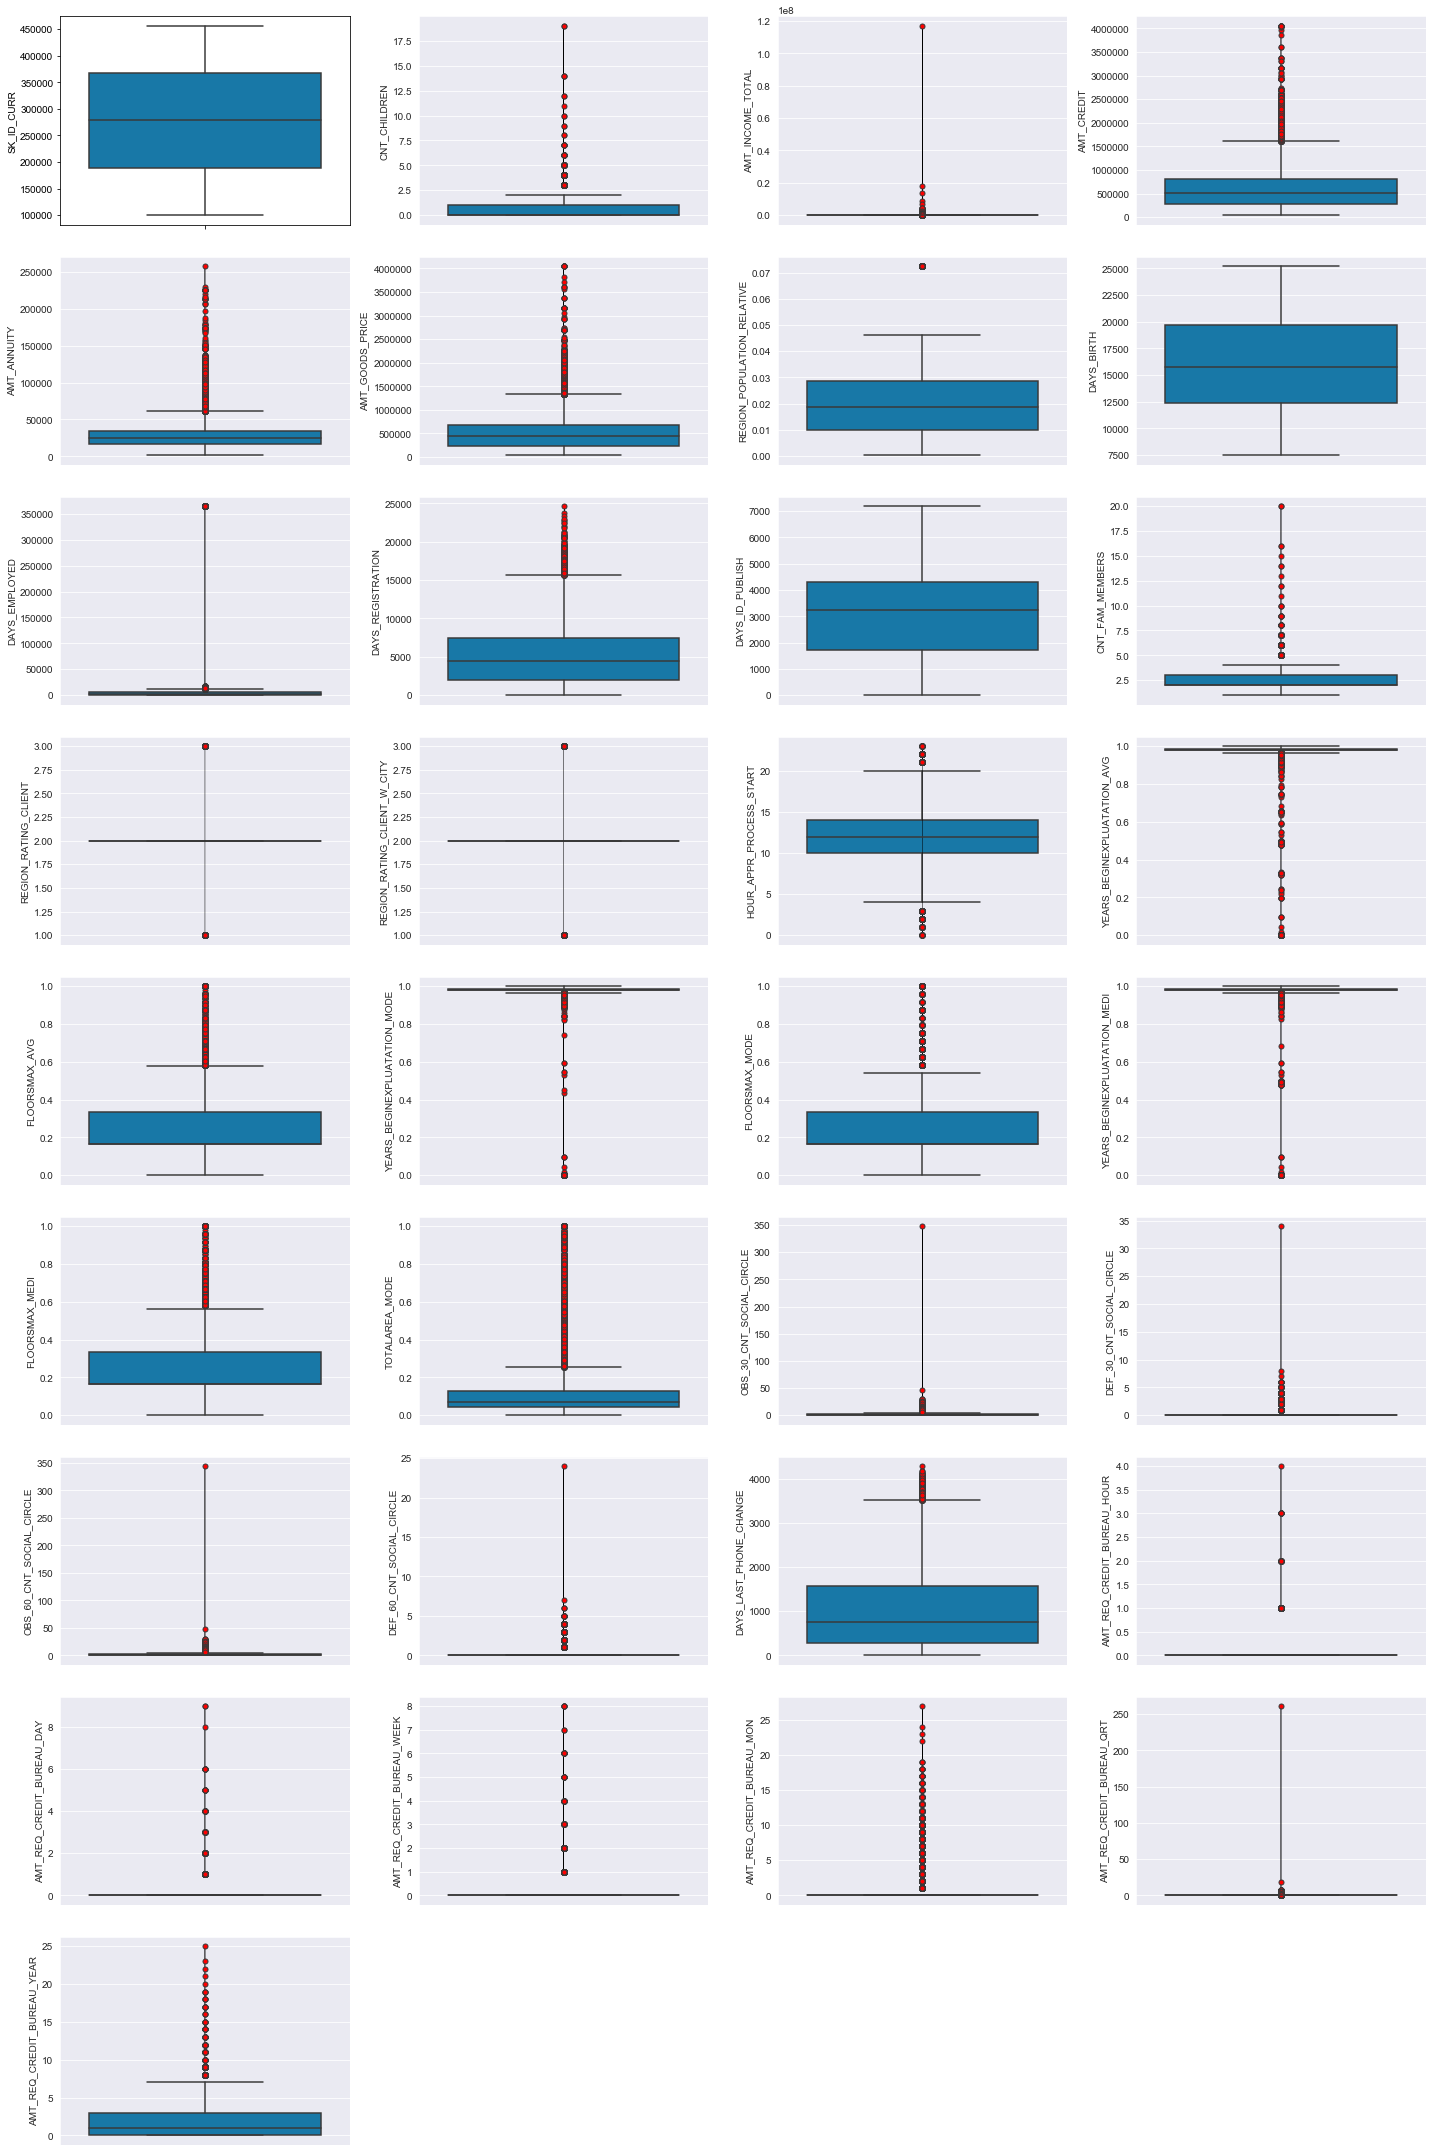

In [21]:
# Determine outliers using boxplot for quantitative variables - application_clean dataframe.

# Number of numerical columns
ln=len(numcols)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(1,figsize=(20,40))

# Running in loop to plot all columns as subplot
for column in numcols:
    if application_clean[column].nunique() > 2:
        plt.subplot(m,n,ct)
        flierprops = dict(marker='o',markerfacecolor='red', markersize=5,linewidth=0.5,
                      linestyle='-')

        data = application_clean[column]
        sns.set_style("darkgrid")
        sns.boxplot(y=data,palette="winter",flierprops=flierprops)

        ct+=1

# Show graphs
plt.tight_layout()
plt.show()

**Observation** <br>
1. Outliers are denoted by red 'o' in the box plot. Outliers are prominent for below variables in application clean <br>
    1. AMT_INCOME_TOTAL <br>
    2. AMT_CREDIT <br>
    3. AMT_ANNUITY <br>
    4. DAYS_EMPLOYED <br>
    5. DAYS_REGISTRATION <br>
    6. CNT_FAM_MEMBERS <br>
    7. DEF_30_CNT_SOCIAL_CIRCLE <br>
    8. AMT_REQ_CREDIT_BUREAU_* <br>
    9. INCOME_CREDIT_RT (Derived) <br>
    10. LTV_RT (Derived) <br>
    11. EMPLOYED_YEAR
2. Note - There are outliers for other flags but we would not need them for analysis  <br>

In [22]:
# Quick review of stats for outlier columns from application_clean

outlier_list = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_EMPLOYED","DAYS_REGISTRATION","CNT_FAM_MEMBERS",
               "DEF_30_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK",
               "AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

application_clean[outlier_list].describe(percentiles=[.25,.50,.75,.95])

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.737315   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
95%         2.000000      3.375000e+05  1.350000e+06   53325.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  DAYS_EMPLOYED  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
count     3.072330e+05  307511.000000      307511.000000    307509.000000   
mean      5.383962e+05   67724.742149        4986.120328         2.152665   
std       3.694465e+05  139443.751806        3522.886321         0.910682   
min       4.050000e+04       0.000000           0.000000         1.000000   
25%       2.385000e+05     933.000000        2010.000000         2.000000   
50%       4.500000e+05    2219.000000        4504.000000         2.000000   
75%       6.795000e+05    5707.000000        7479.500000         3.000000   
95%       1.305000e+06  365243.000000       11416.000000         4.000000   
max       4.050000e+06  365243.000000       24672.000000        20.000000   

       DEF_30_CNT_SOCIAL_CIRCLE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count             306490.000000               265992.000000   
mean                   0.143421                    0.006402   
std                    0.446698                    0.083849   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    0.000000   
95%                    1.000000                    0.000000   
max                   34.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
95%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
95%                     1.000000                   2.000000   
max                    27.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count               265992.000000  
mean                     1.899974  
std                      1.869295  
min                      0.000000  
25%                      0.000000  
50%                      1.000000  
75%                      3.000000  
95%                      6.000000  
max                     25.000000

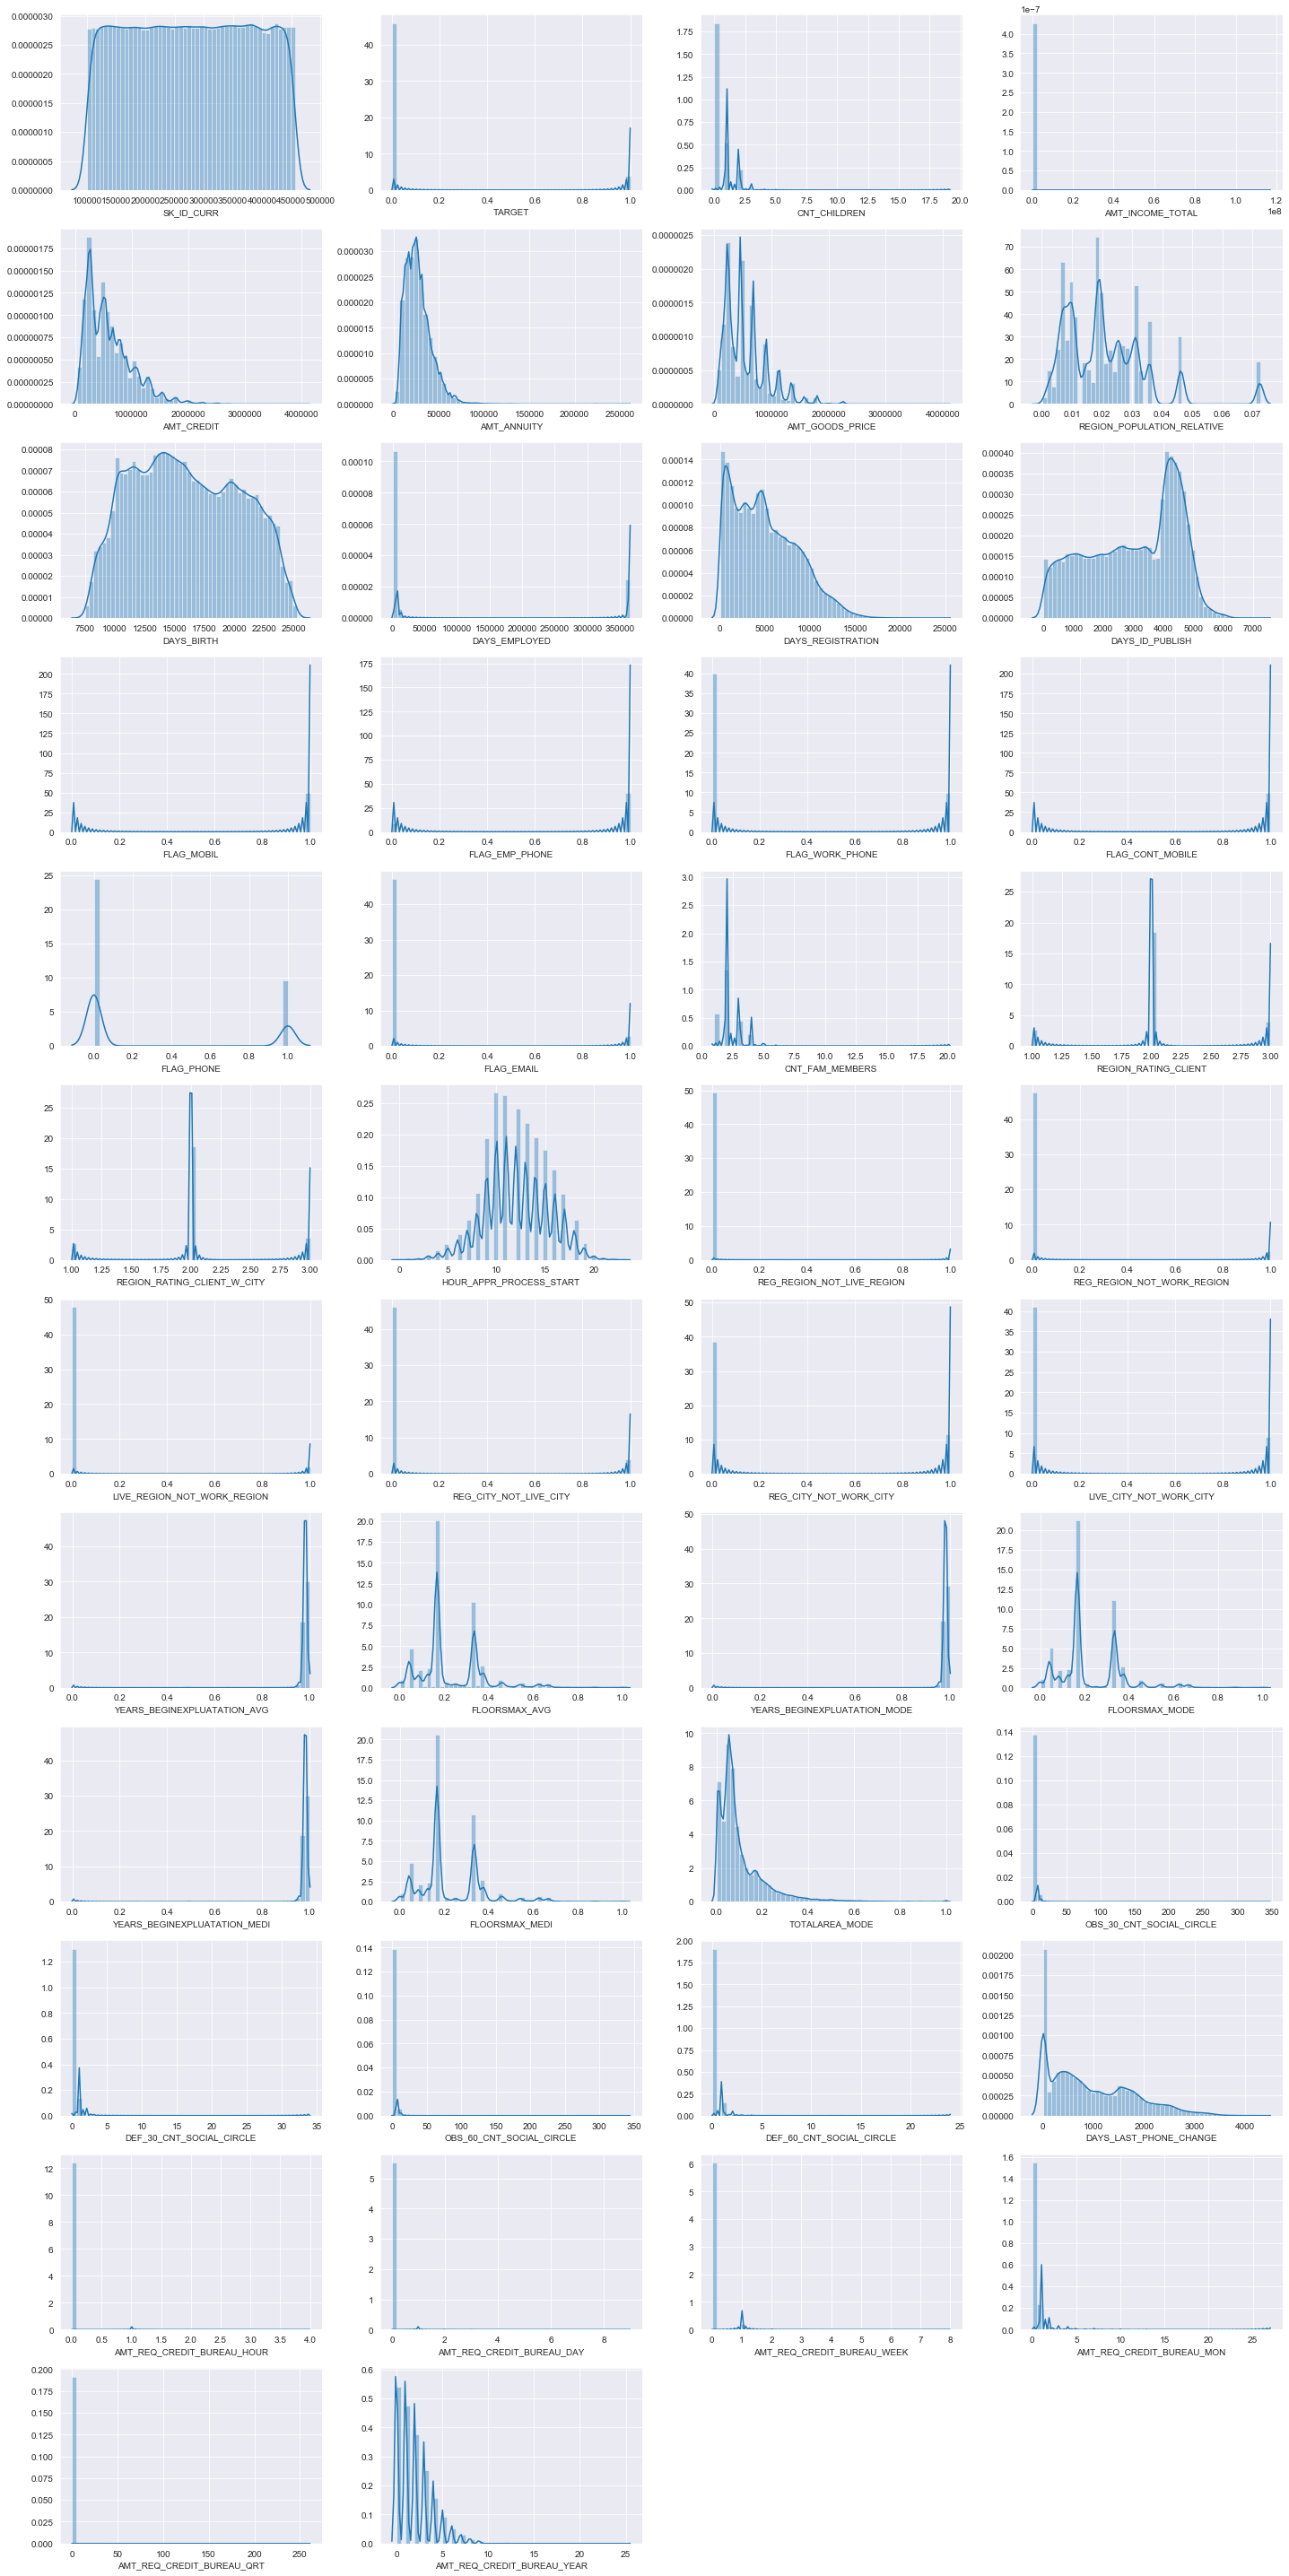

In [23]:
# Histogram for quantitative variables - application_clean

# Number of numerical columns
ln=len(numcols)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(1,figsize=(20,40))

# Running in loop to plot all columns as subplot
for column in numcols:
    plt.subplot(m,n,ct)

    data = application_clean[column]
    sns.distplot(data.dropna(),hist=True)
    ct+=1

# Show graphs
plt.tight_layout()
plt.show()

Remove outliers from applicaiton_clean dataframe as it produces incorrect metric and graphs. Use below logic to determine outliers. <br>
1. Calculate Inter Quantile Region (75th Percentile - 25th Percentile) <br>
2. Upper cutoff = 75th percentile + 1.5 * (IQR) <br>
3. Lower cutoff = 25th percentile - 1.5 * (IQR) <br>
**Note** - We will not remove null values since it might results in removing entire categorical value. eg. Removing null values from AMT_CREDIT from previous_application results in removing "CANCELLED, REFUSED...." Status.</font>

In [24]:
## Remove Outliers from application_clean
np.warnings.filterwarnings('ignore')

# Calculate Inter Quantile Region (75th Percentile - 25th Percentile)
# Upper cutoff = 75th percentile + 1.5 * (IQR)
# Lower cutoff = 25th percentile - 1.5 * (IQR)

def removeoutlier(application_clean,col):

    col_q1,col_q3,_col_IQR,lower_cutoff,upper_cutoff = 0,0,0,0,0
    data=pd.DataFrame()
    outlier_data=pd.DataFrame()
    data=application_clean[col]

    col_q1 = data.quantile(q=.25)
    col_q3 = data.quantile(q=.75)
    col_IQR = col_q3 - col_q1
    lower_cutoff = col_q1 - (1.5 * col_IQR)
    upper_cutoff = col_q3 + (1.5 * col_IQR)
    mask1 = (application_clean[col] > lower_cutoff) & (application_clean[col] < upper_cutoff)
    mask2 = (application_clean[col].isnull()==True)
#     print(col,lower_cutoff,upper_cutoff)
    if(lower_cutoff==0) | (upper_cutoff==0) | (lower_cutoff == upper_cutoff):
        return application_clean
        pass
    else:
        application_clean = application_clean.loc[mask1 | mask2]
        return application_clean


# # Running in loop to plot all columns as subplot
# We will not remove outliers from "DAYS_EMPLOYED"


for column in outlier_list:
    if(column!="DAYS_EMPLOYED"):
        application_clean = removeoutlier(application_clean,column)

# application_clean2 = removeoutlier(application_clean2,col)
np.warnings.filterwarnings('default')

In [25]:
# Quick review of application_clean dataframe after removing outliers
application_clean.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  269087.000000  269087.000000  269087.000000     269087.000000   
mean   278253.650288       0.083360       0.377201     149692.667699   
std    102799.406576       0.276426       0.640877      61000.804966   
min    100002.000000       0.000000       0.000000      25650.000000   
25%    189194.500000       0.000000       0.000000     108000.000000   
50%    278311.000000       0.000000       0.000000     135000.000000   
75%    367046.500000       0.000000       1.000000     180000.000000   
max    456255.000000       1.000000       2.000000     337050.000000   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.690870e+05  269077.000000     2.688260e+05   
mean   5.300438e+05   24511.576211     4.726503e+05   
std    3.182346e+05   11168.337289     2.846328e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.695500e+05   15808.500000     2.250000e+05   
50%    4.725000e+05   23580.000000     4.500000e+05   
75%    7.538400e+05   31576.500000     6.750000e+05   
max    1.558814e+06   57334.500000     1.345500e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               269087.000000  269087.000000  269087.000000   
mean                     0.020202   16042.292575   70579.574063   
std                      0.012841    4430.326738  141807.859710   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12309.000000     918.000000   
50%                      0.018850   15776.000000    2200.000000   
75%                      0.026392   19767.000000    6005.000000   
max                      0.072508   25201.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      269087.000000    269087.000000  269087.000000   269087.000000   
mean         5019.676573      2987.898156       0.999996        0.811949   
std          3494.642444      1507.204743       0.001928        0.390753   
min             0.000000         0.000000       0.000000        0.000000   
25%          2076.500000      1712.000000       1.000000        1.000000   
50%          4548.000000      3242.000000       1.000000        1.000000   
75%          7534.000000      4294.000000       1.000000        1.000000   
max         15781.000000      7197.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    269087.000000     269087.000000  269087.000000  269087.000000   
mean          0.199954          0.998261       0.276944       0.051861   
std           0.399966          0.041668       0.447489       0.221746   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    269086.000000         269087.000000                269087.000000   
mean          2.101540              2.076860                     2.057290   
std           0.844387              0.491714                     0.485548   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max           4.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            269087.000000               269087.000000   
mean                 12.008105                    0.013427   
std                   3.24359

**Datatypes Observation**
1. Converting `DAYS_REGISTRATION` and `CNT_FAM_MEMBERS` from float to int as these columns can never be in float.
2. Converting these Continous Variables `REGION_POPULATION_RELATIVE`, `DAYS_BIRTH`, `DAYS_EMPLOYED` into Catagorical Ranges like high, medium, low and creating  new variables `CAT_REGION_POPULATION_RELATIVE`, `CAT_DAYS_BIRTH`, `CAT_DAYS_EMPLOYED` respectivly.

In [26]:
# Finding null values in 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS'
application_clean[['DAYS_REGISTRATION', 'CNT_FAM_MEMBERS']].isnull().sum()

DAYS_REGISTRATION    0
CNT_FAM_MEMBERS      1
dtype: int64

In [27]:
# Imputing NaN values in CNT_FAM_MEMBER to zero, here we are assuing for these two with 0 family members.

application_clean['CNT_FAM_MEMBERS'].fillna(0,inplace=True)

In [28]:
# Converting to integer.

application_clean[['DAYS_REGISTRATION', 'CNT_FAM_MEMBERS']] = application_clean[['DAYS_REGISTRATION', 'CNT_FAM_MEMBERS']].astype(int)

### **Converting DAYS into YEARS**

In [29]:
# Derived column AGE_YEAR for Age in years for application_clean dataframe
application_clean["AGE_YEAR"]=(application_clean["DAYS_BIRTH"]//365)

In [30]:
# Derived column EMPLOYED_YEAR for Employed in years for application_clean dataframe
application_clean["EMPLOYED_YEAR"]=(application_clean["DAYS_EMPLOYED"]//365).astype(int)

In [31]:
# Derived column INCOME_CREDIT_RT for INCOME to CREDIT Ratio for application_clean dataframe
application_clean["INCOME_CREDIT_RT"]=round((application_clean["AMT_INCOME_TOTAL"]/application_clean["AMT_CREDIT"]),2)

In [32]:
# Derived column LTV_RT (Loan-to-value) for GOODS_PRICE to CREDIT Ratio for application_clean dataframe
application_clean["LTV_RT"]=round((application_clean["AMT_GOODS_PRICE"]/application_clean["AMT_CREDIT"]),2)

### 3.6 **Binning of Continous Variables**

In [33]:
# Bining population ranges according to their normalized values.
# Less than 0.03       : LOW_POPULATION
# Between 0.03 and 0.06 : MID_POPULATION
# Greater than 0.06    : HIGH_POPULATION

application_clean['CAT_REGION_POPULATION'] = pd.cut(x = application_clean['REGION_POPULATION_RELATIVE'], 
                                                   bins = [0, .03, .06, 1.0],
                                                   labels = ['LOW','MED','HIGH'])

In [34]:
# Bining application_clean["AGE_YEAR"] to Age by Decades.

application_clean['AGE_BY_DECADES'] = pd.cut(x=application_clean["AGE_YEAR"], 
                                             bins=[20, 29, 39, 49, 59, 69], 
                                             labels=['20s', '30s', '40s', '50s', '60s'])


In [35]:
application_clean['CAT_WORK_EXPERIENCE'] = pd.cut(x=application_clean["EMPLOYED_YEAR"], 
                                             bins=[-1, 0, 2, 3, 6, 10, 45], 
                                             labels=['Not Experinced','Fresher', 'Entry Level', 'Mid Level', 'Senior Level', 'Higher Senior Level'])


In [36]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_clean['AMT_INCOME_RANGE']=pd.cut(application_clean['AMT_INCOME_TOTAL'],bins,labels=slot)

In [37]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_clean['AMT_CREDIT_RANGE']=pd.cut(application_clean['AMT_CREDIT'],bins=bins,labels=slots)

# 4. **Analysis of `Application_Data`**
1. Checking and reporting the imbalance percentage.
2. Dividing the data into two sets i.e Target=1 and Target=0 and storing them into new dataframes called `target1` and `target0` respectivly.


### 4.1 **Checking Imbalance Percentage**

In [38]:
# Checking the imbalance percentage w.r.t target column.

# target_1_per = round((len(application_clean[application_clean['TARGET'] == 1])/len(application_clean.index))*100,2)
# print('Imbalance Percenate of TARGET = 1 is :{}%'.format(target_1_per))
# print('Imbalance Percenate of TARGET = 0 is :{}%'.format(100 - target_1_per))

round((application_clean['TARGET'].value_counts(normalize=True))*100,2)

0    91.66
1     8.34
Name: TARGET, dtype: float64

### 4.2 **Dividing data in 2 Sets**

In [39]:
# Creating two separate dataframes target1 and target0

target1 = application_clean[application_clean['TARGET'] == 1]
target0 = application_clean[~application_clean.isin(target1)]

target0_df=application_clean.loc[application_clean["TARGET"]==0]
target1_df=application_clean.loc[application_clean["TARGET"]==1]

### 4.3 **Performing Univariate Analysis on Target 0 and 1 Datasets**

In [40]:
# Filtering the catagorical columns from application_clean dataframe as target1 and target0 has same columns.

# List Categorical Variables application_clean
nonnumcols=list(application_clean.select_dtypes(include='object'))
nonnumcols


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

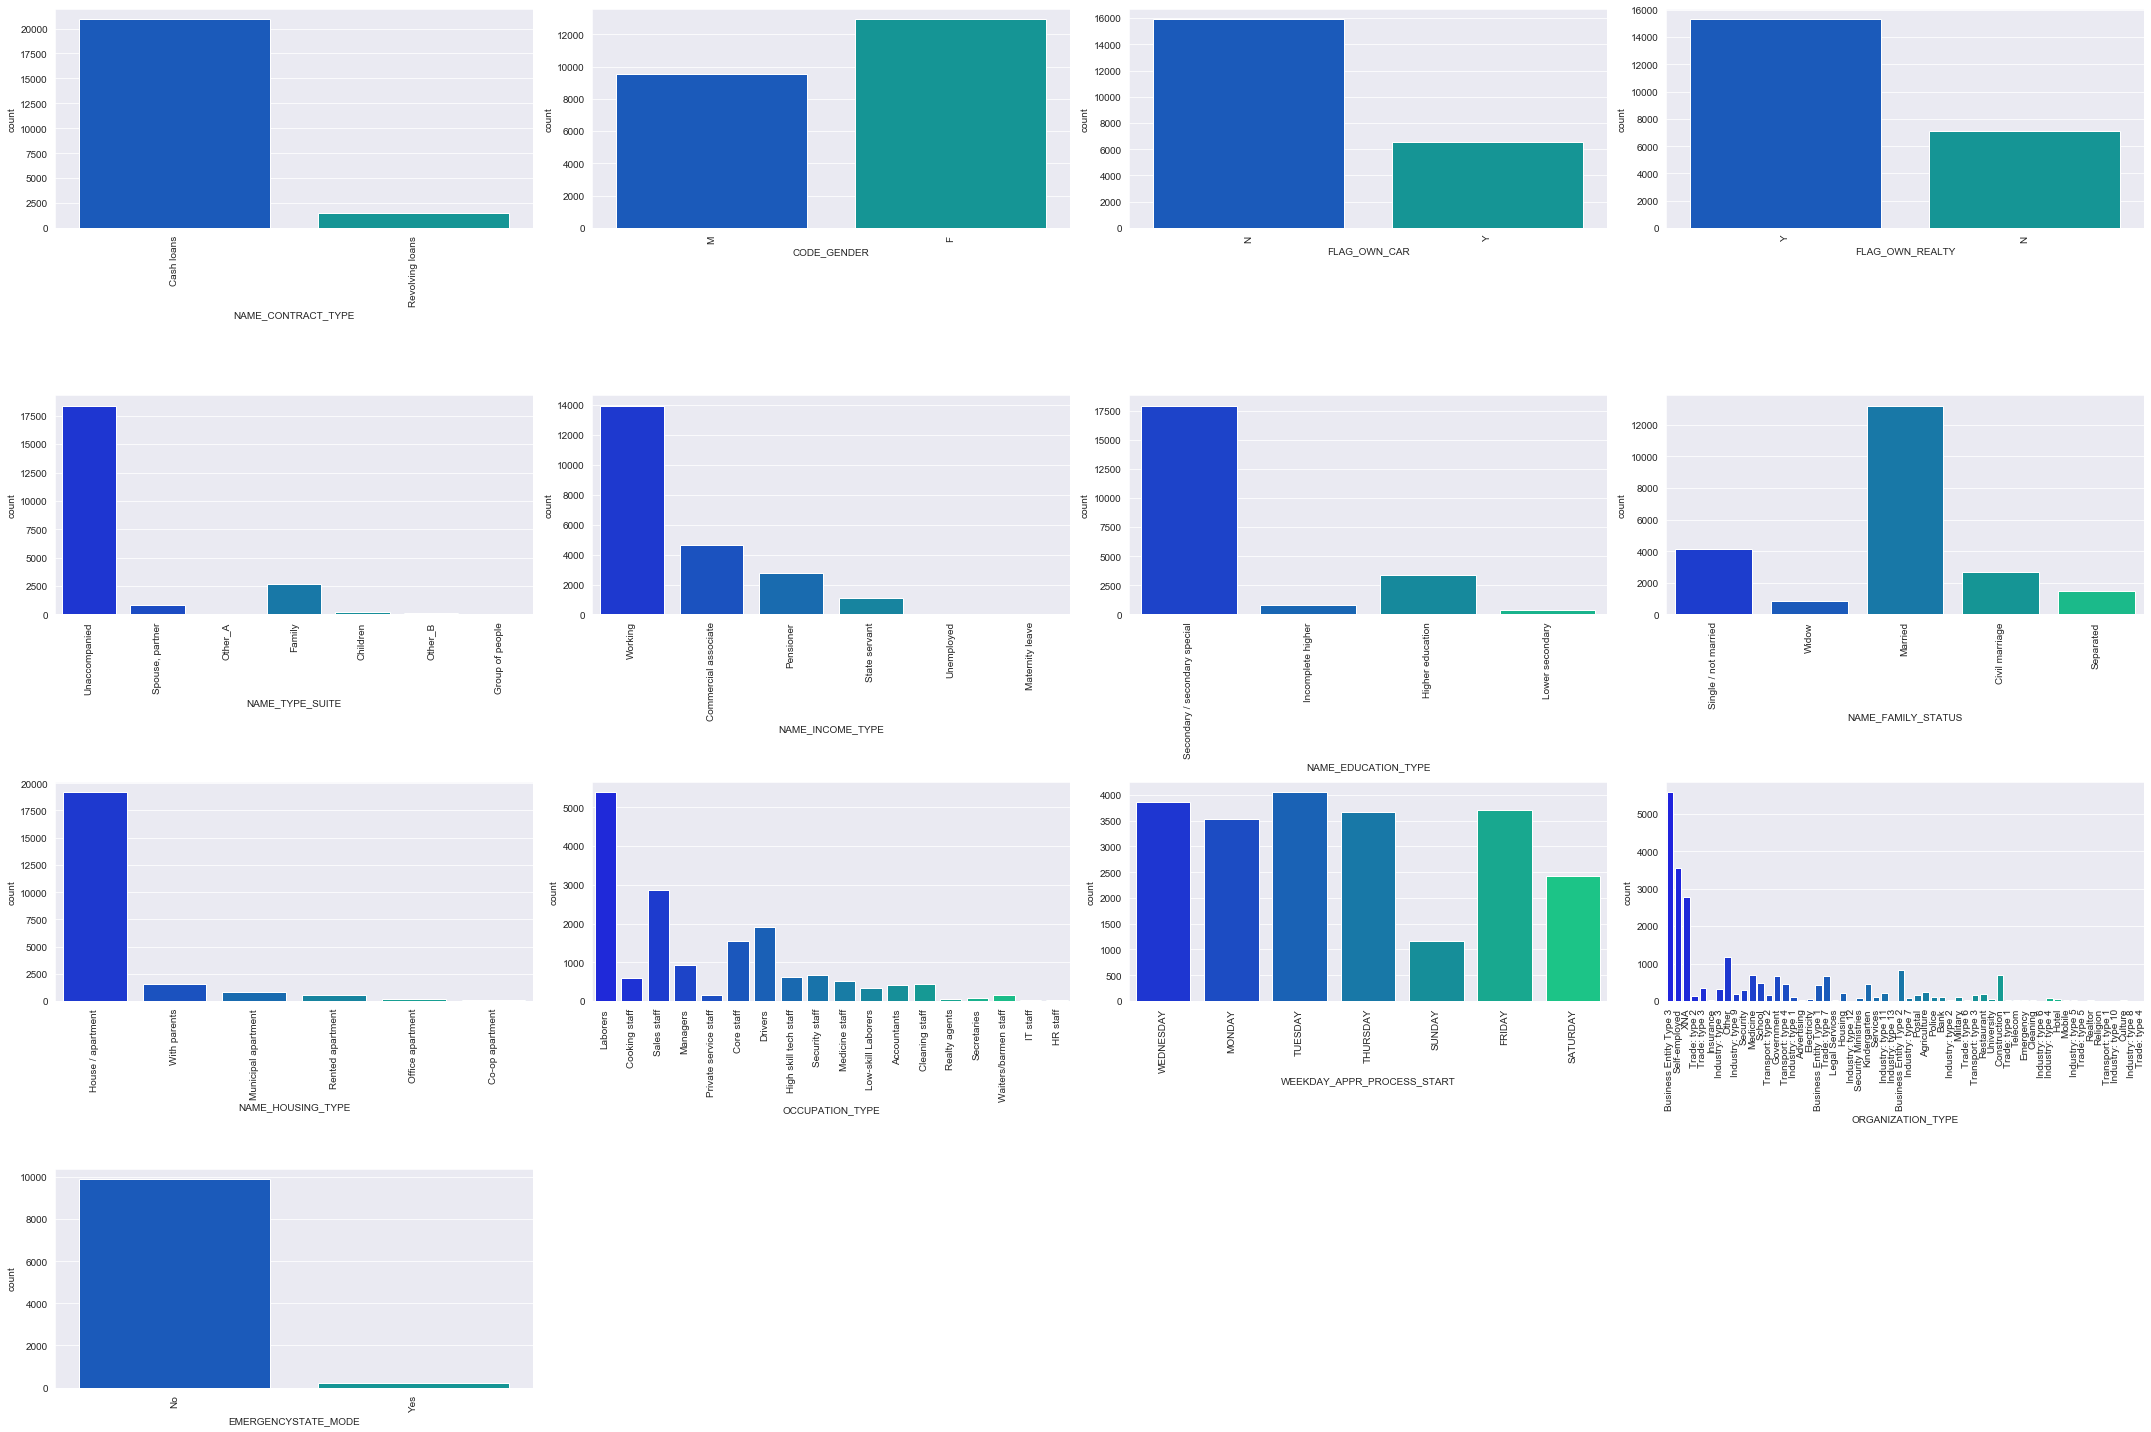

In [41]:
# Countplot for these categorical variables - target1

# Number of numerical columns
ln=len(nonnumcols)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(2,figsize=(30,20))

# Running in loop to plot all columns as subplot
for column in nonnumcols:
    plt.subplot(m,n,ct)

    plt.xticks(rotation=90)
    sns.countplot(x=column,data=target1,palette='winter')
    ct+=1

# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

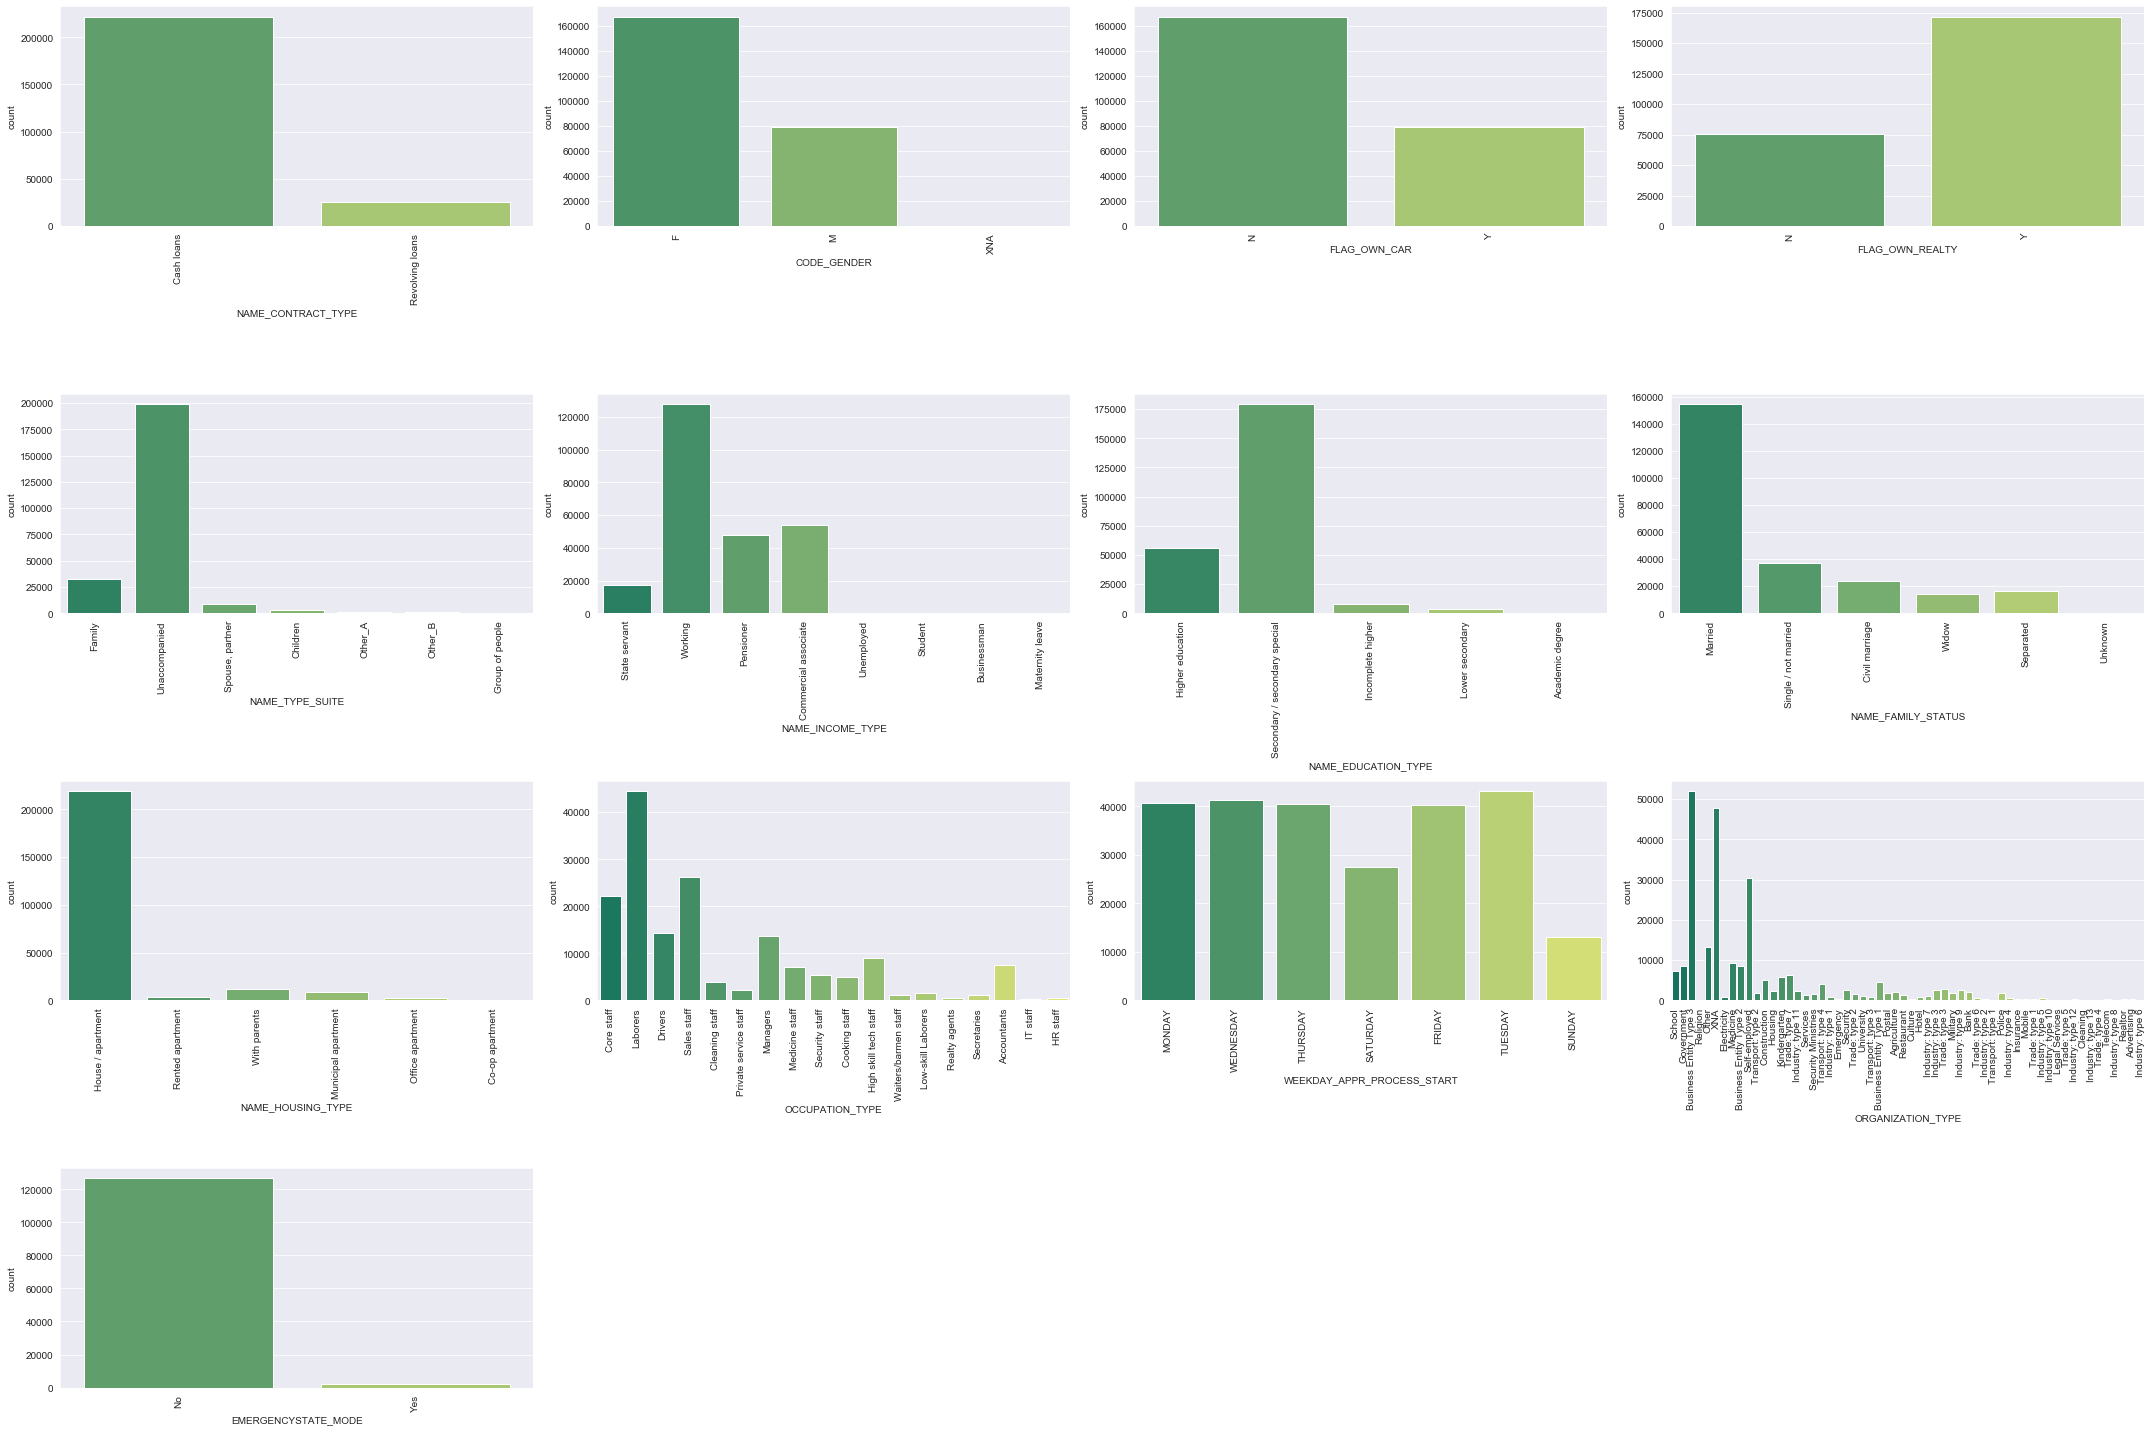

In [42]:
# Countplot for these categorical variables - target0

# Number of numerical columns
ln=len(nonnumcols)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(2,figsize=(30,20))

# Running in loop to plot all columns as subplot
for column in nonnumcols:
    plt.subplot(m,n,ct)

    plt.xticks(rotation=90)
    sns.countplot(x=column,data=target0,palette='summer')
    ct+=1

# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

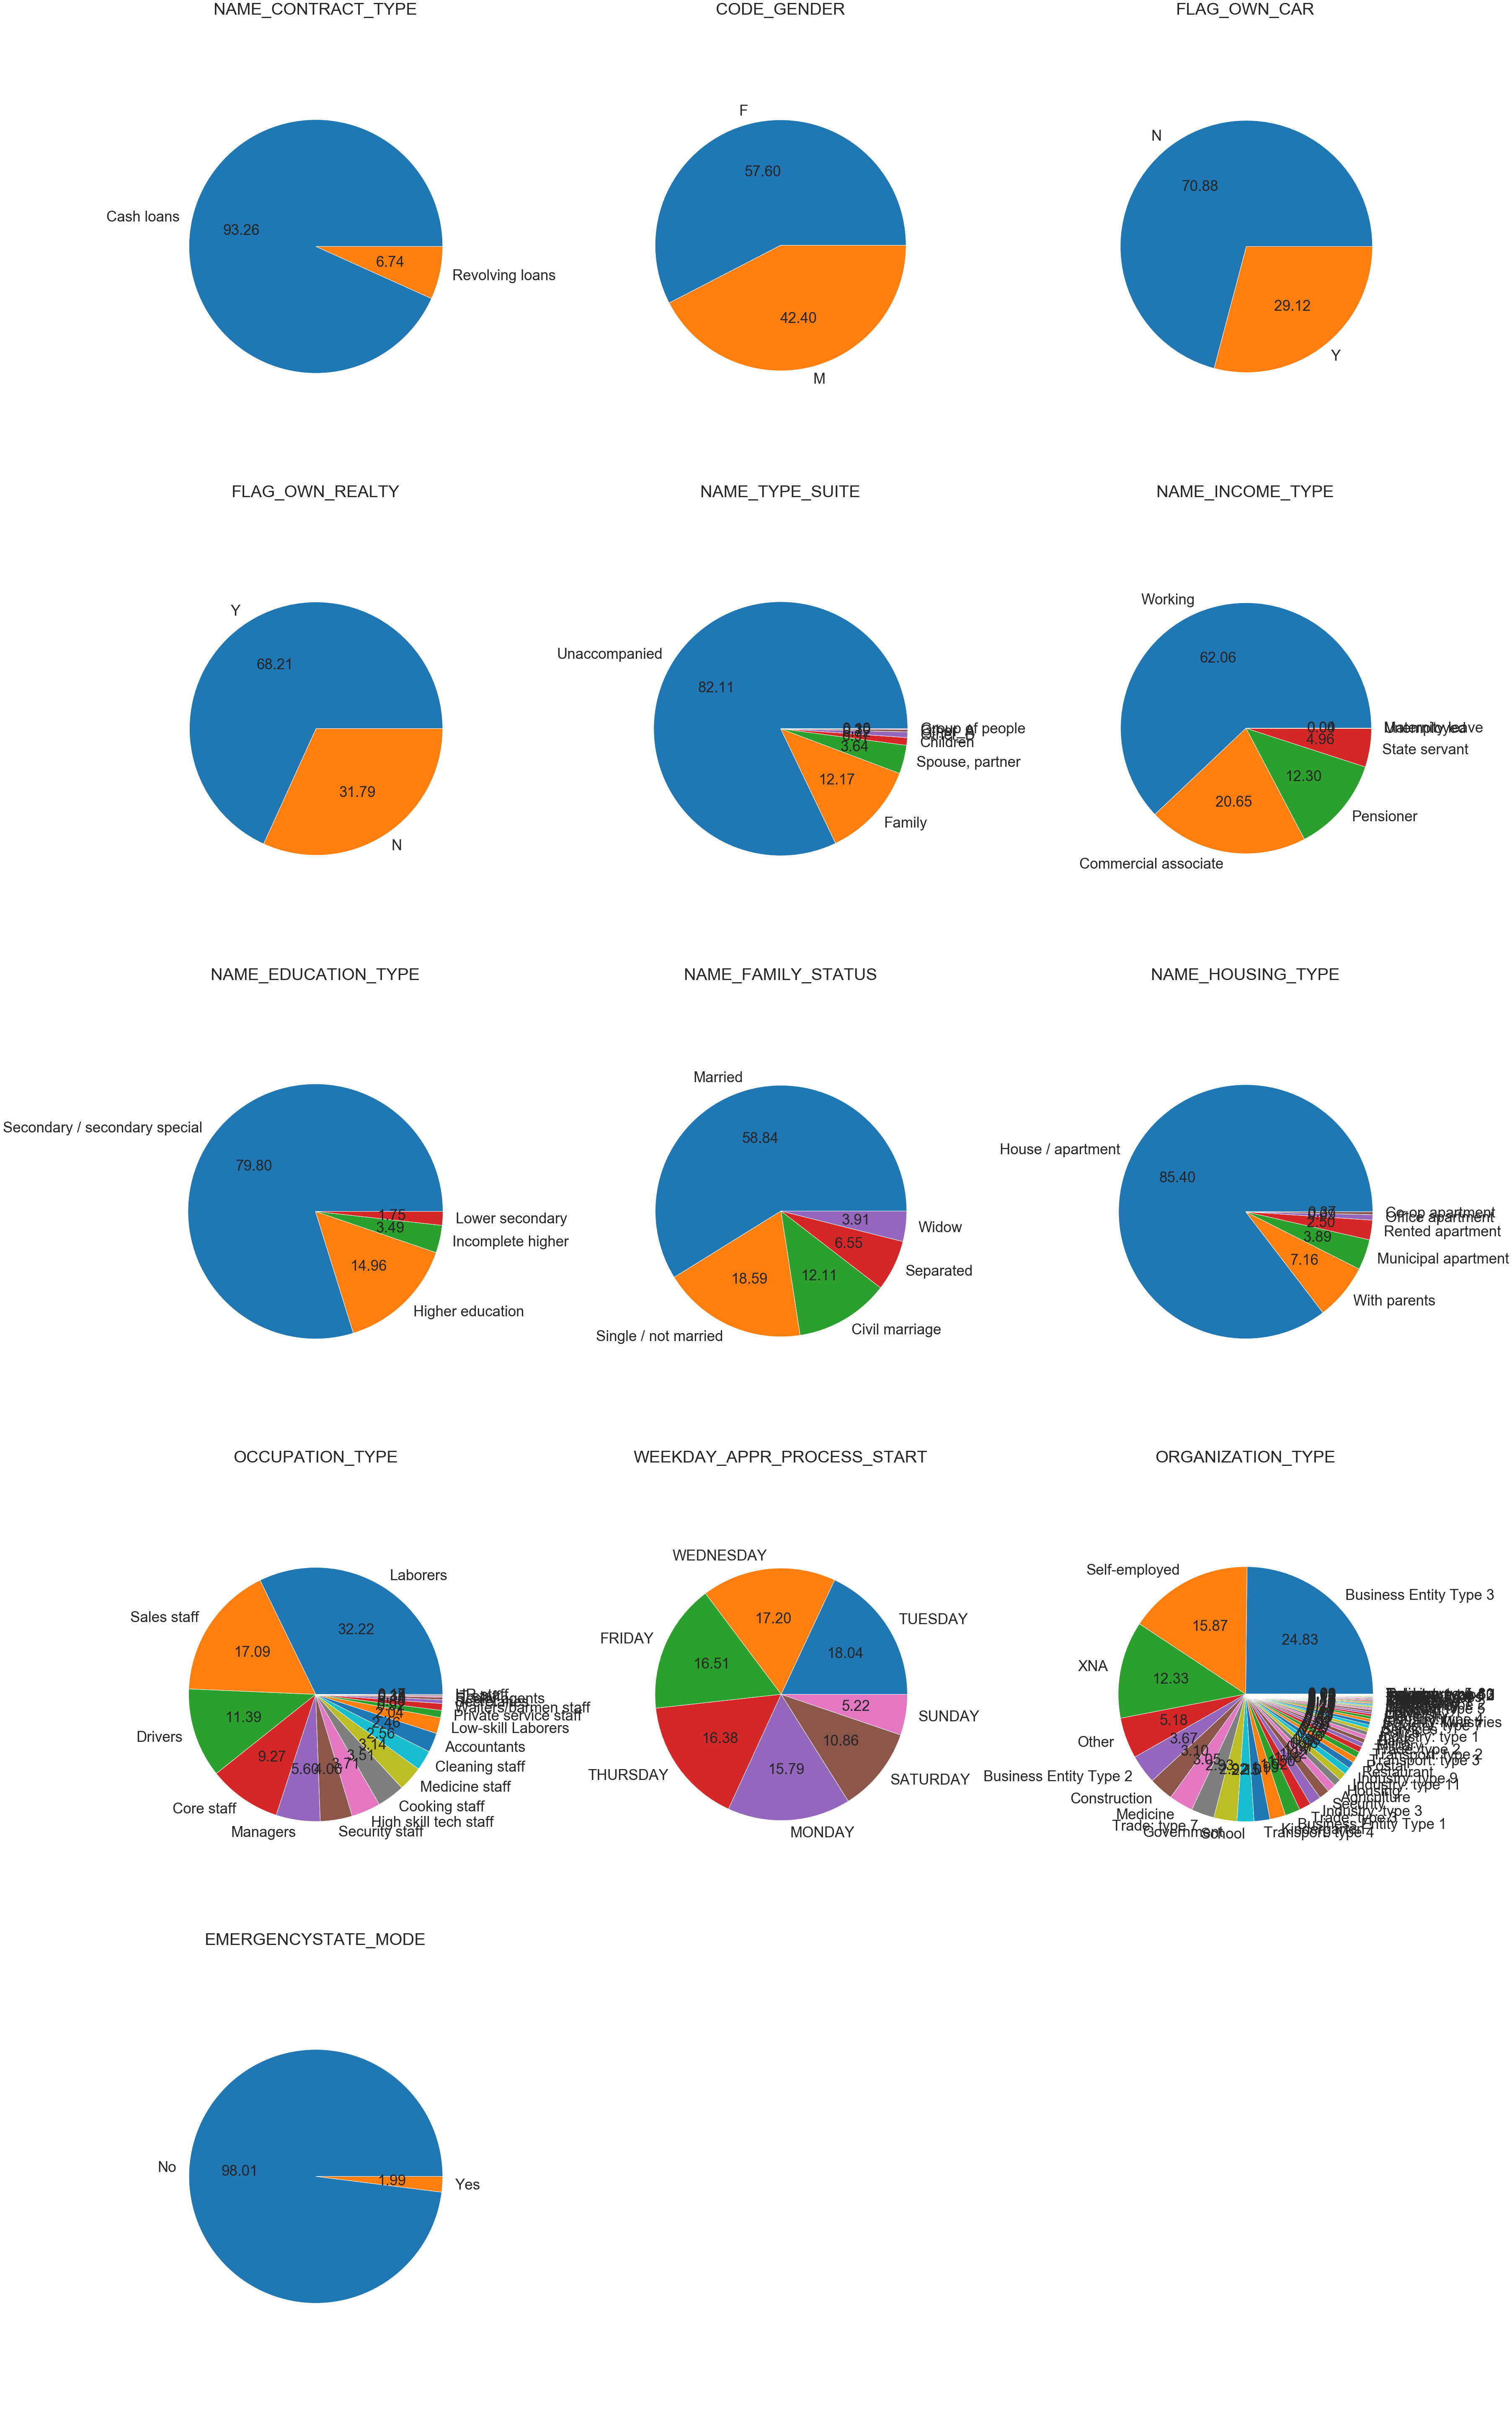

In [43]:
# Imbalance Calculation - Pie Chart for these categorical variables - application_clean

# Number of numerical columns
ln=len(nonnumcols)

# calculation for subplots
n=3
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(4,figsize=(50,80))
# plt.figure(4)

# Running in loop to plot all columns as subplot
for column in nonnumcols:
    plt.subplot(m,n,ct)

    df_t = target1[column].value_counts()
    l=df_t.index.tolist()
    
    plt.pie(df_t,labels=l,radius=2.8,autopct='%.2f',textprops={'fontsize': 35}, )
    plt.title(column,fontdict={'fontsize': 40, 'fontweight': 'medium'})
    plt.axis('equal')
    ct+=1

plt.tight_layout()
plt.show()

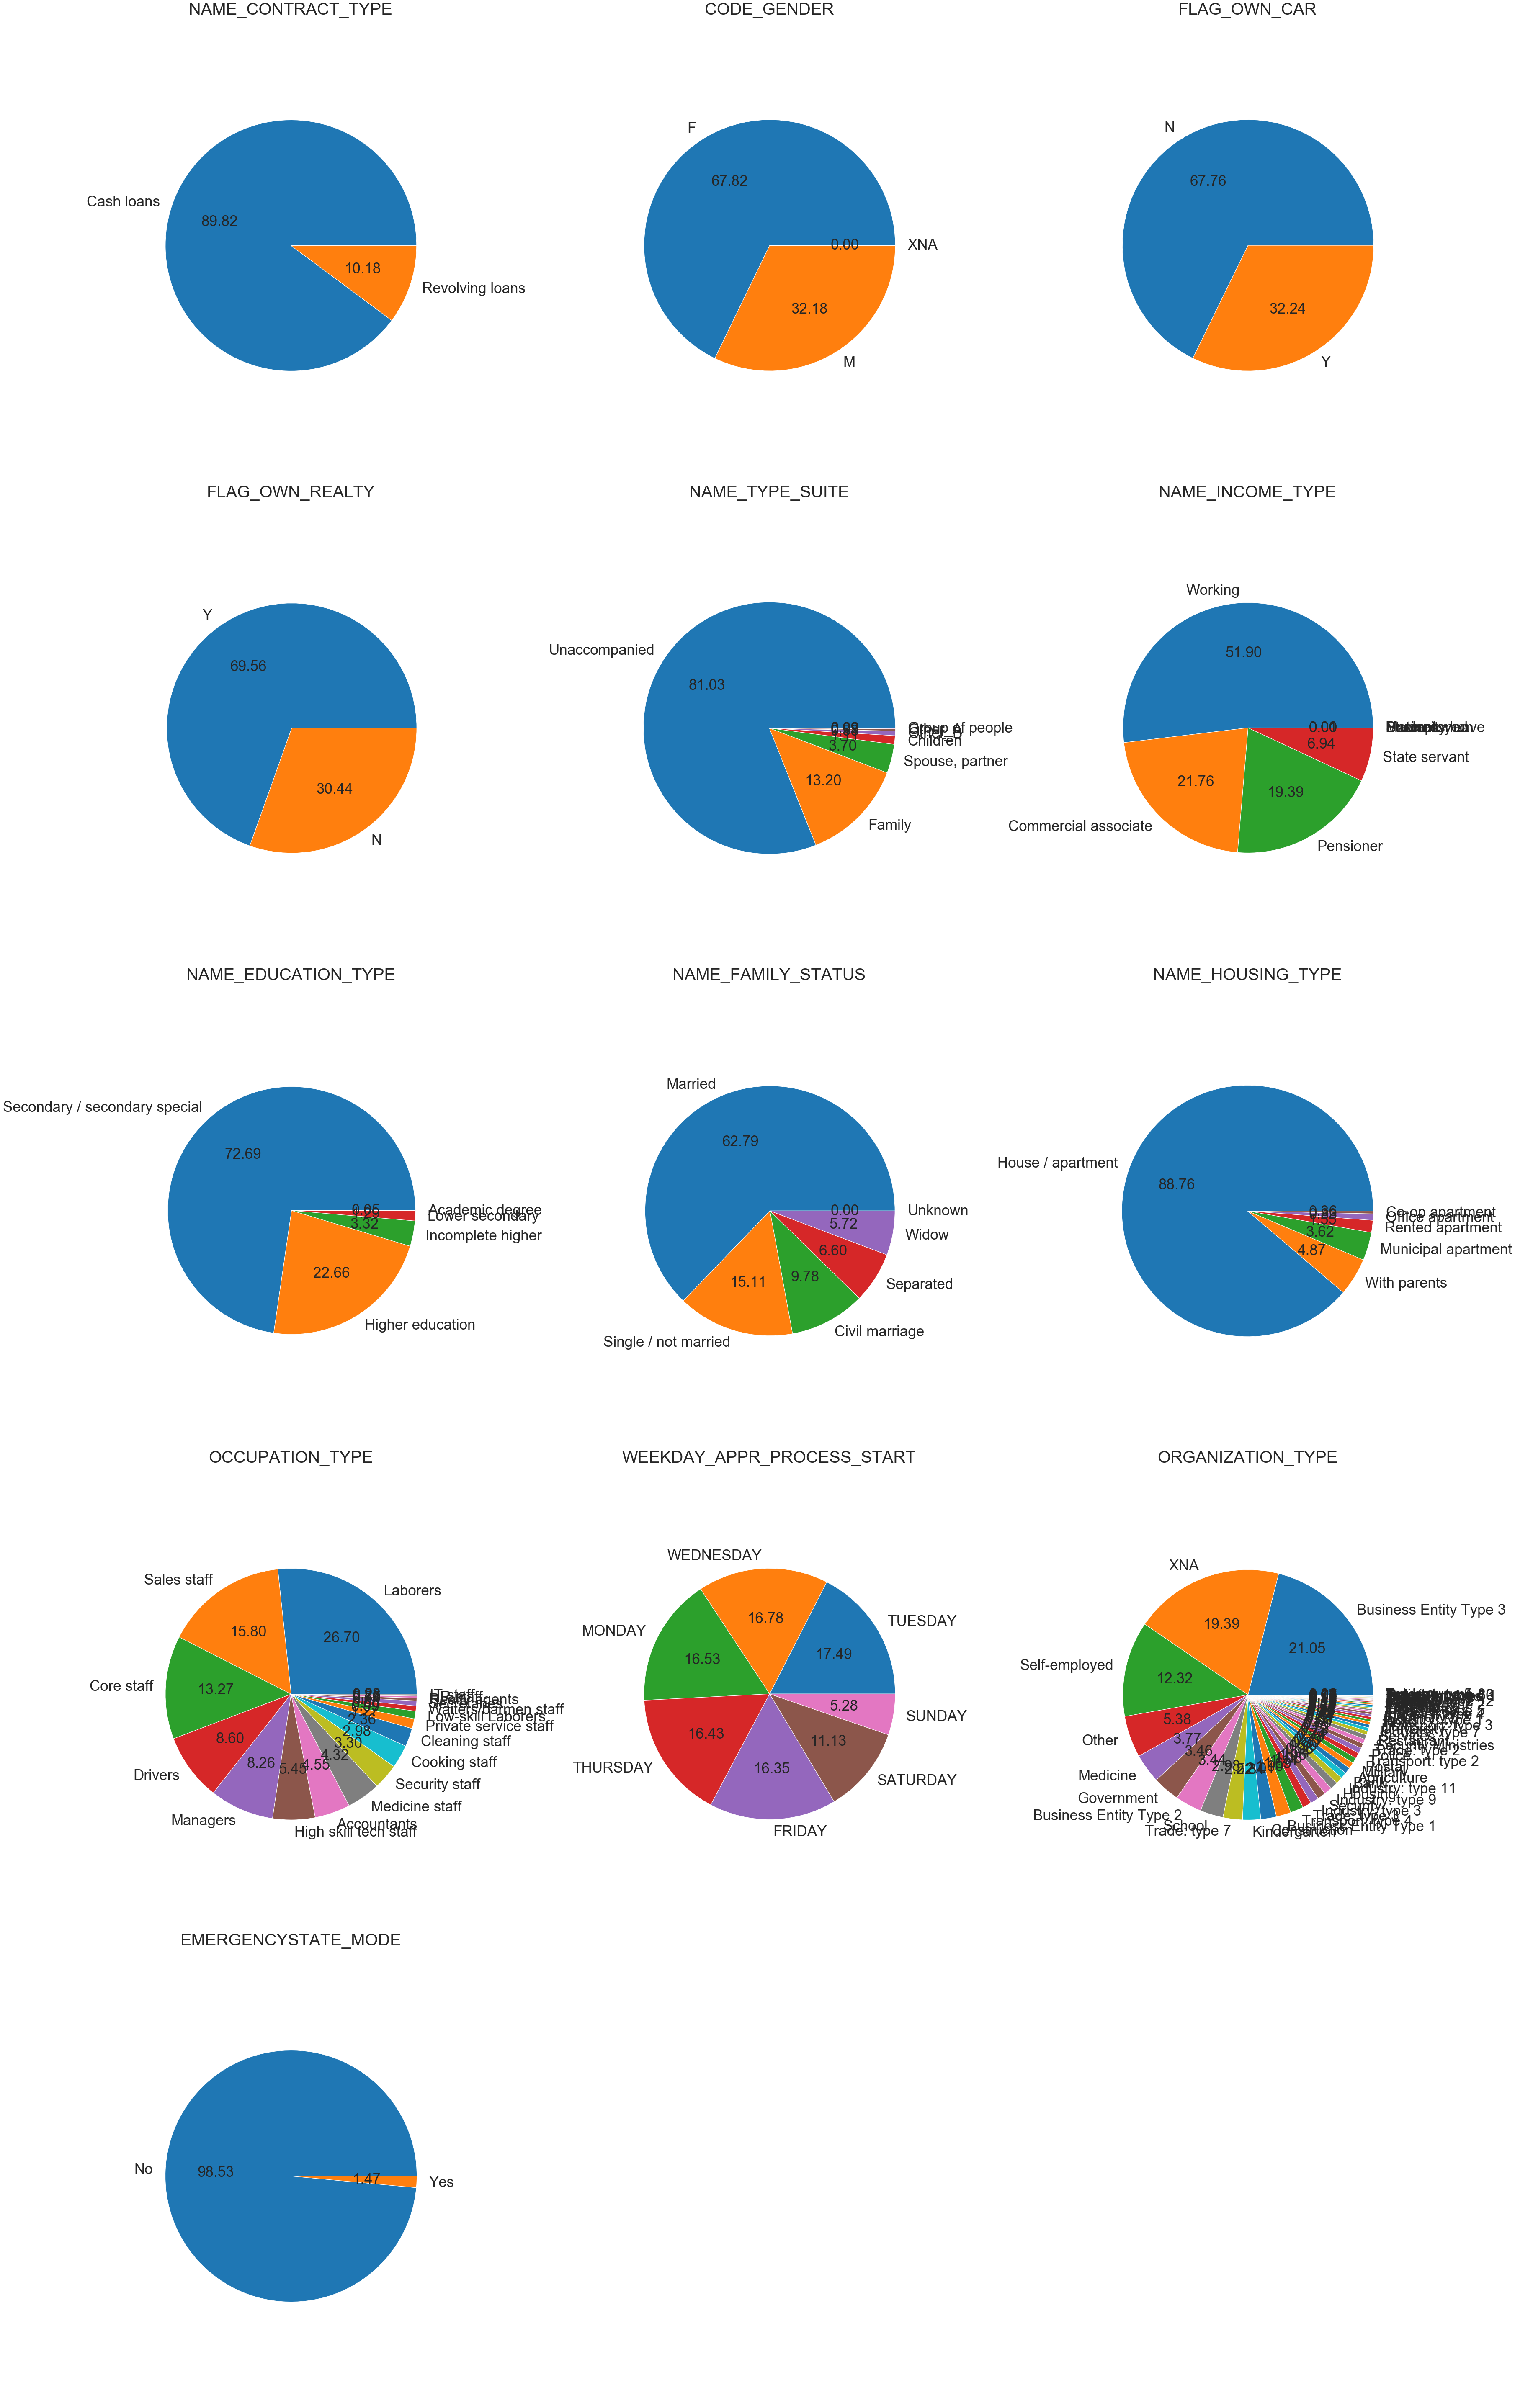

In [44]:
# Imbalance Calculation - Pie Chart for these categorical variables - application_clean

# Number of numerical columns
ln=len(nonnumcols)

# calculation for subplots
n=3
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(4,figsize=(50,80))
# plt.figure(4)

# Running in loop to plot all columns as subplot
for column in nonnumcols:
    plt.subplot(m,n,ct)

    df_t = target0[column].value_counts()
    l=df_t.index.tolist()
    
    plt.pie(df_t,labels=l,radius=2.8,autopct='%.2f',textprops={'fontsize': 35}, )
    plt.title(column,fontdict={'fontsize': 40, 'fontweight': 'medium'})
    plt.axis('equal')
    ct+=1

plt.tight_layout()
plt.show()

####  4.3.1 Categorical Univariate Analysis on Target 0 (Client with no Payment Difficulty) Datasets - Demographic View

In [45]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='deep') 
        
    plt.show()

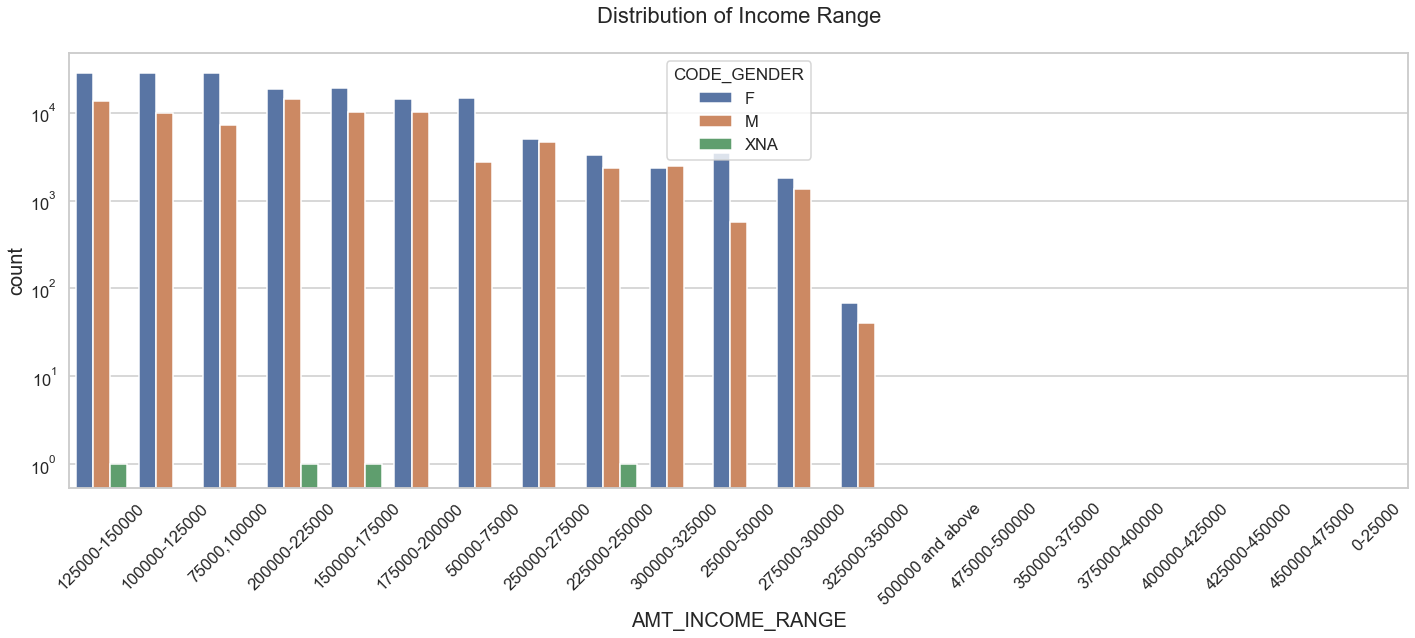

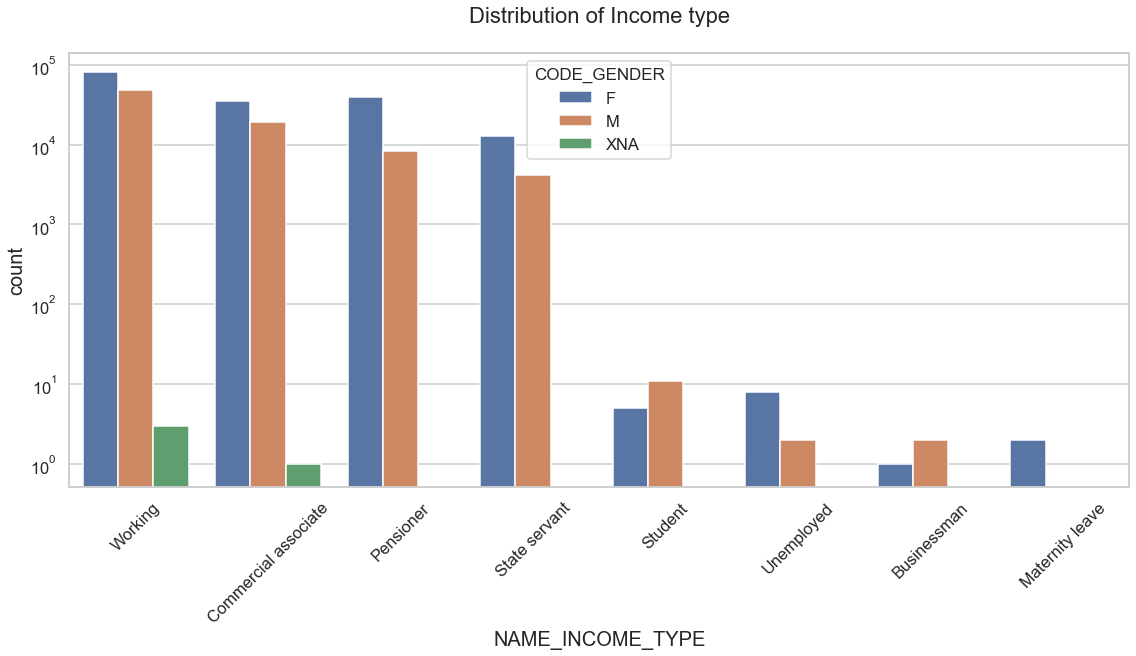

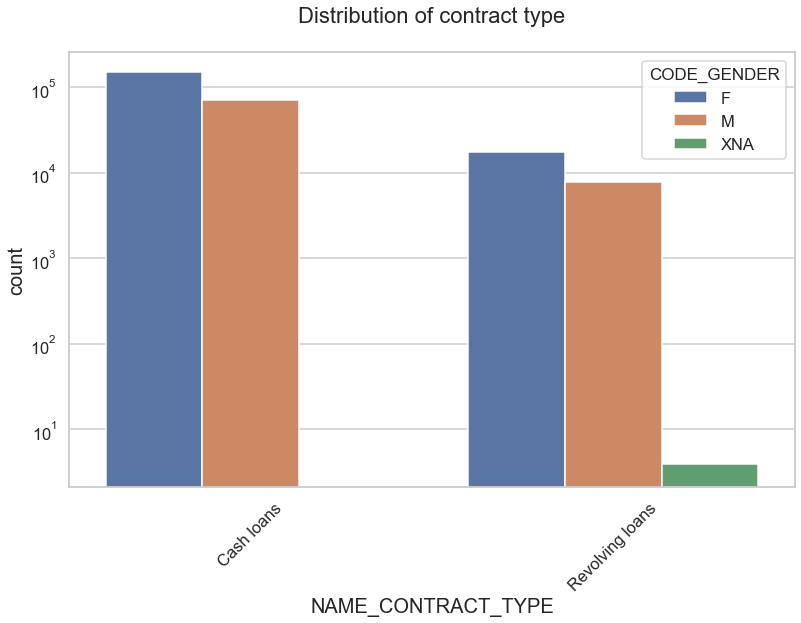

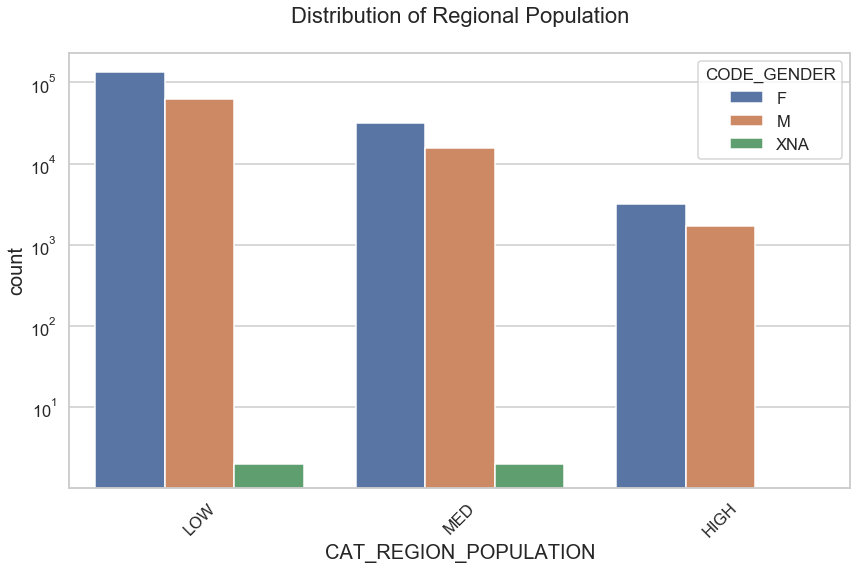

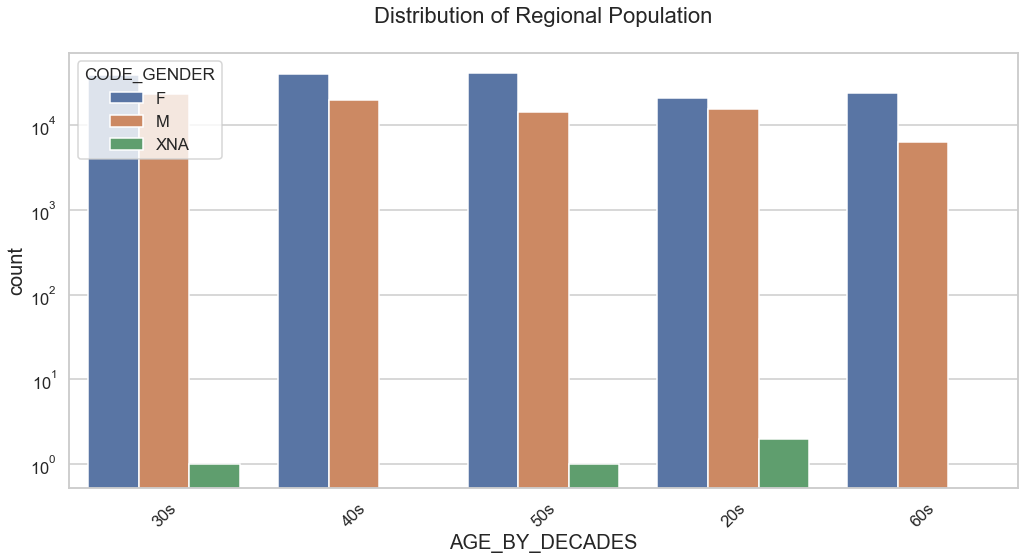

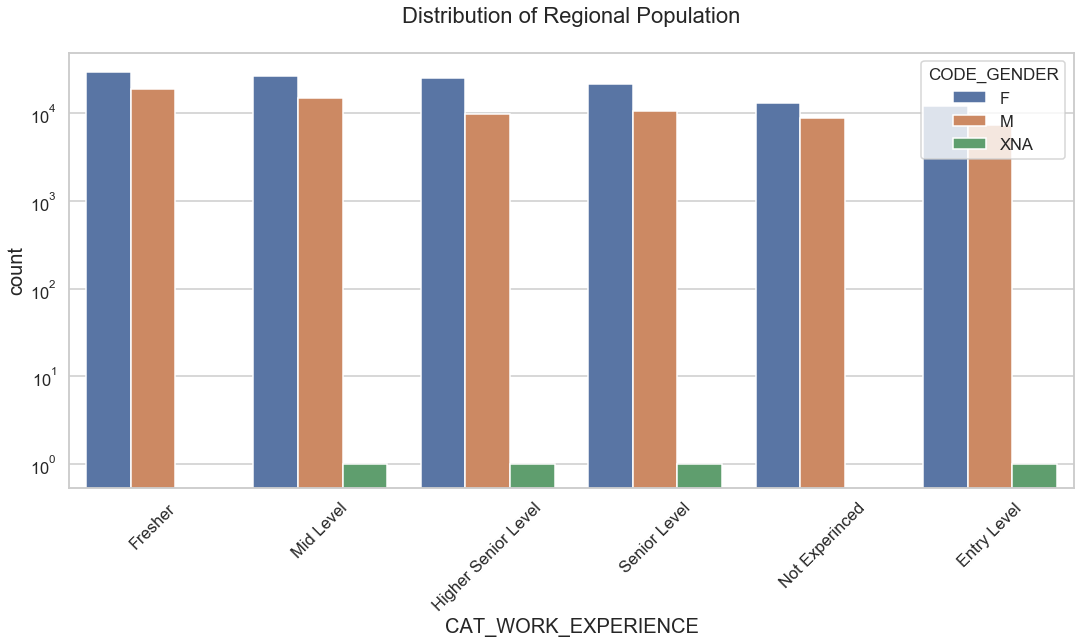

In [46]:
# PLotting for income range

uniplot(target0_df,col='AMT_INCOME_RANGE',title='Distribution of Income Range',hue='CODE_GENDER')

# Plotting for Income type

uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

# Plotting for Contract type

uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

# Plotting for Region Population

uniplot(target0_df,col='CAT_REGION_POPULATION',title='Distribution of Regional Population',hue='CODE_GENDER')

# Plotting for Age Buckets

uniplot(target0_df,col='AGE_BY_DECADES',title='Distribution of Regional Population',hue='CODE_GENDER')

# Plotting for Age Buckets

uniplot(target0_df,col='CAT_WORK_EXPERIENCE',title='Distribution of Regional Population',hue='CODE_GENDER')

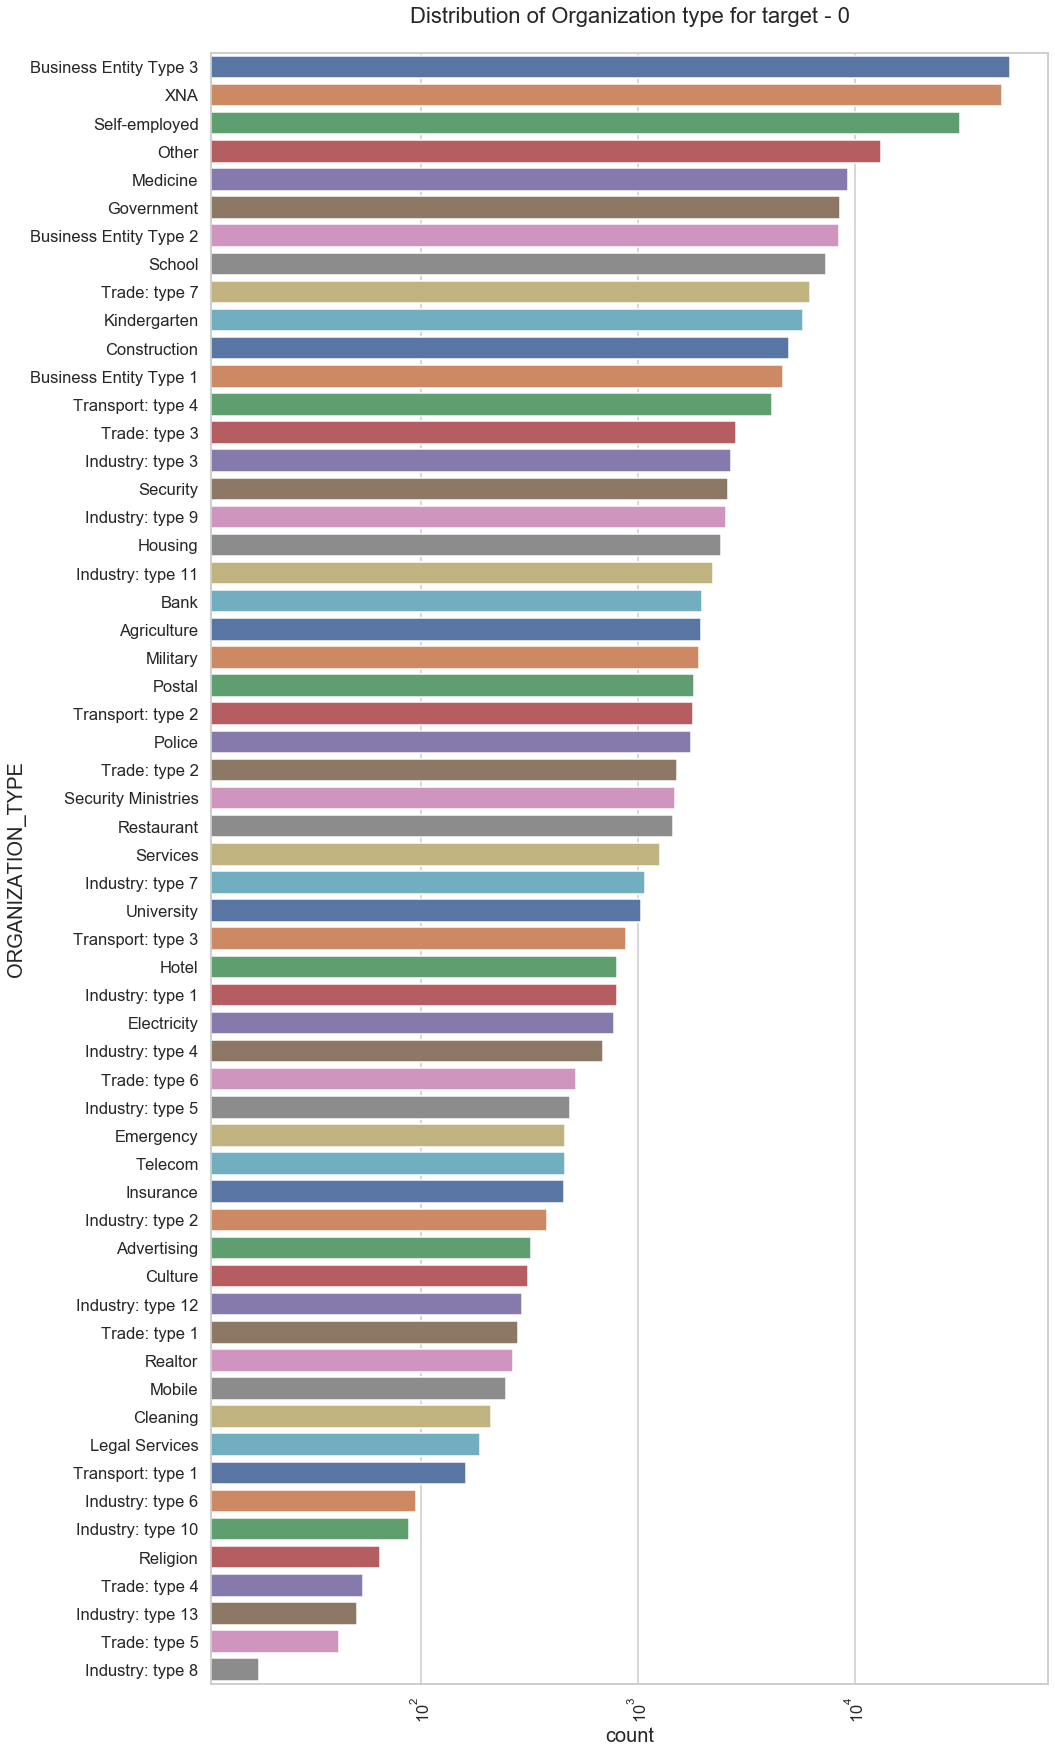

In [47]:

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='deep')

plt.show()

### Conclusion

- Female counts are higher than male.
- Income range from 100000 to 200000 is having more number of credits.
- This graph show that females are more than male in having credits for that range.
- Very less count for income range 400000 and above.

- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
- For this Females are having more number of credits than male.
- Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

- For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
- For this also Female is leading for applying credits.

- Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
- Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

####  4.3.2 Categorical Univariate Analysis on Target 1 (Client with Payment Difficulty) Datasets - Demographic View

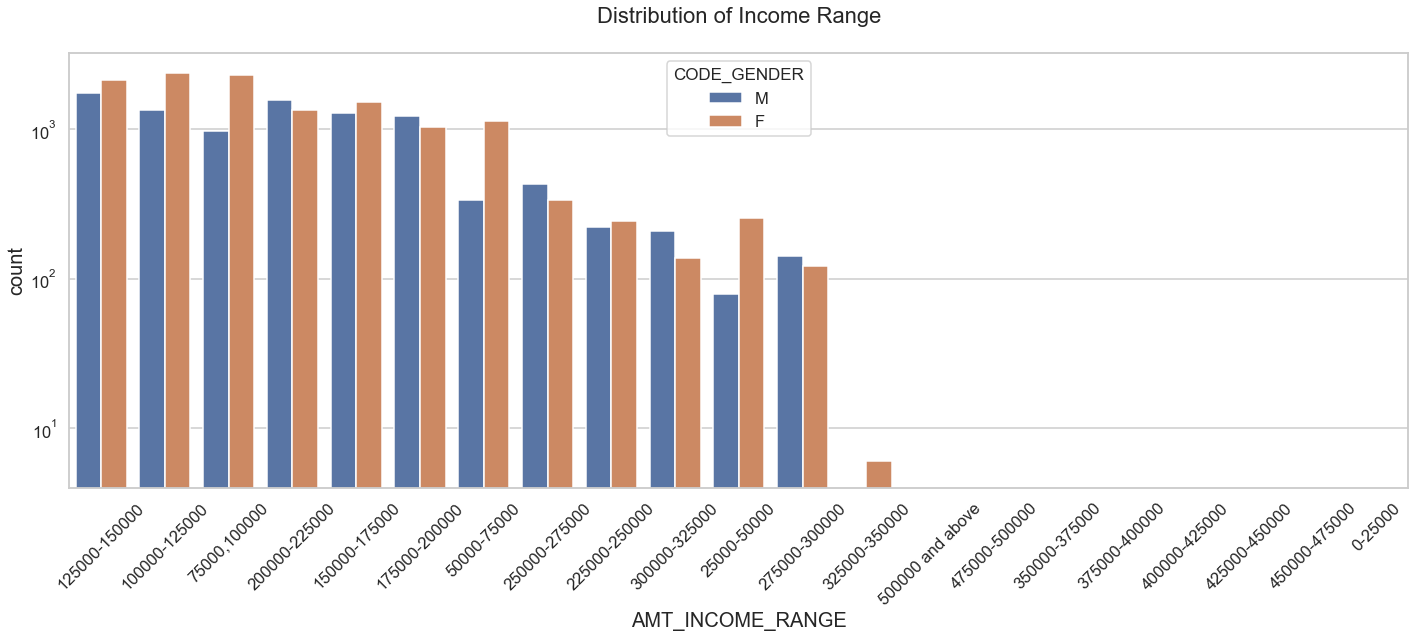

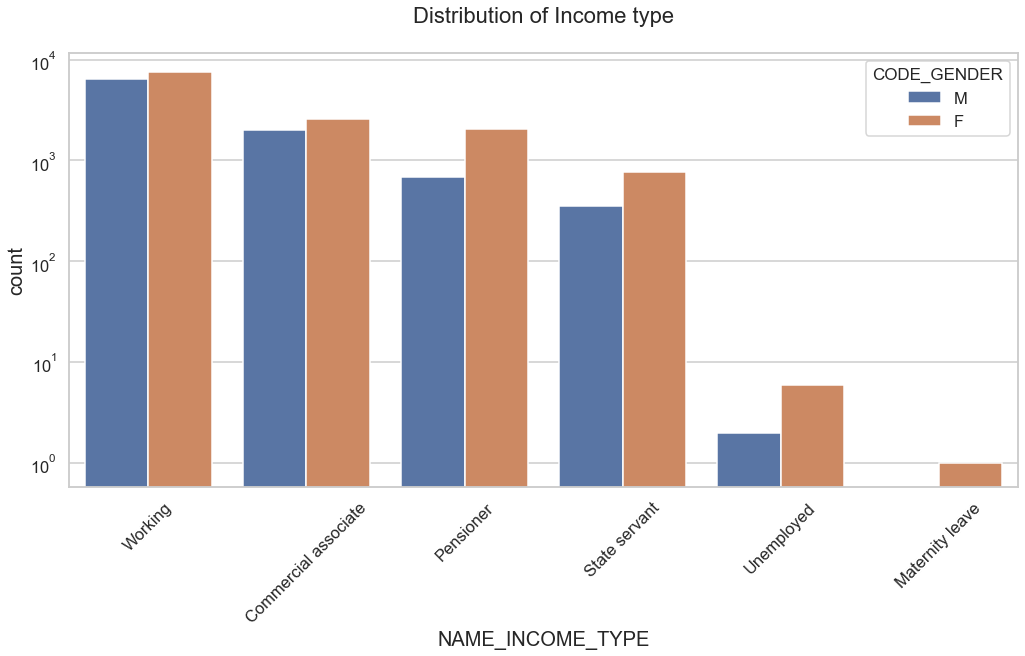

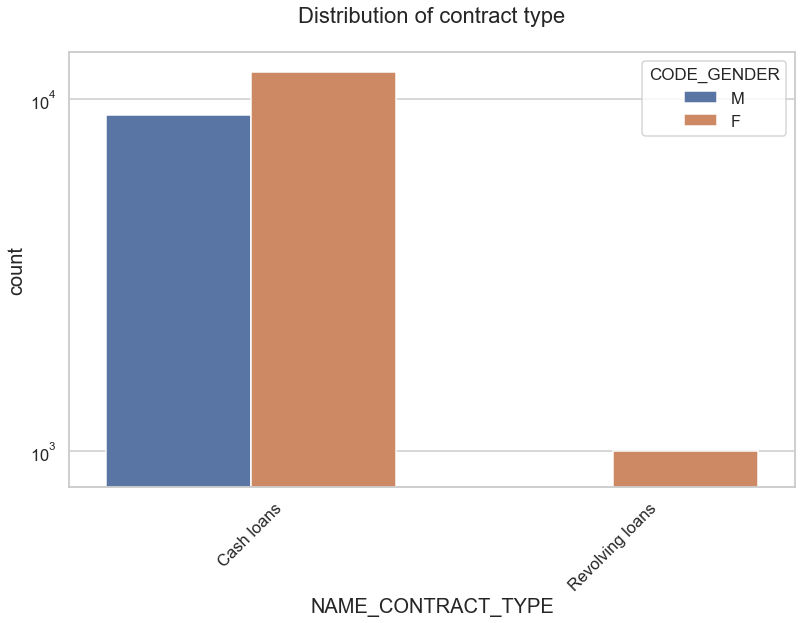

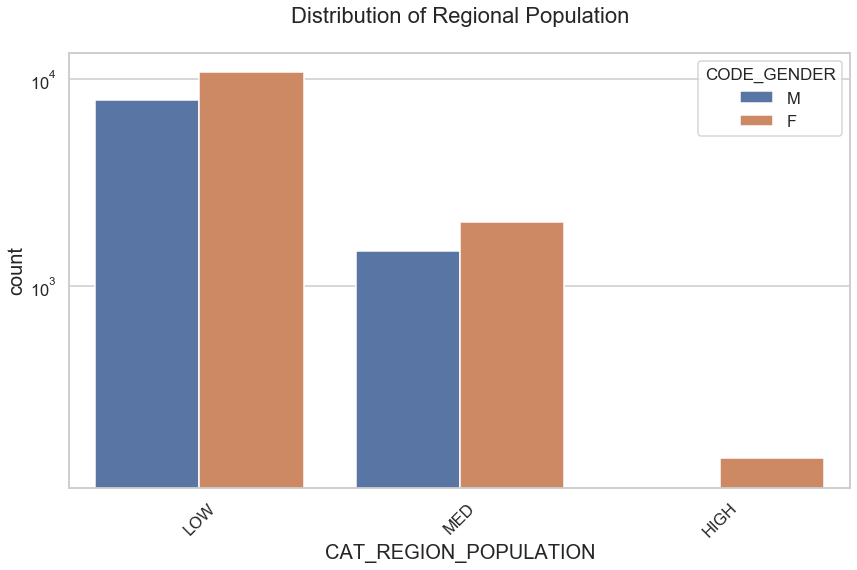

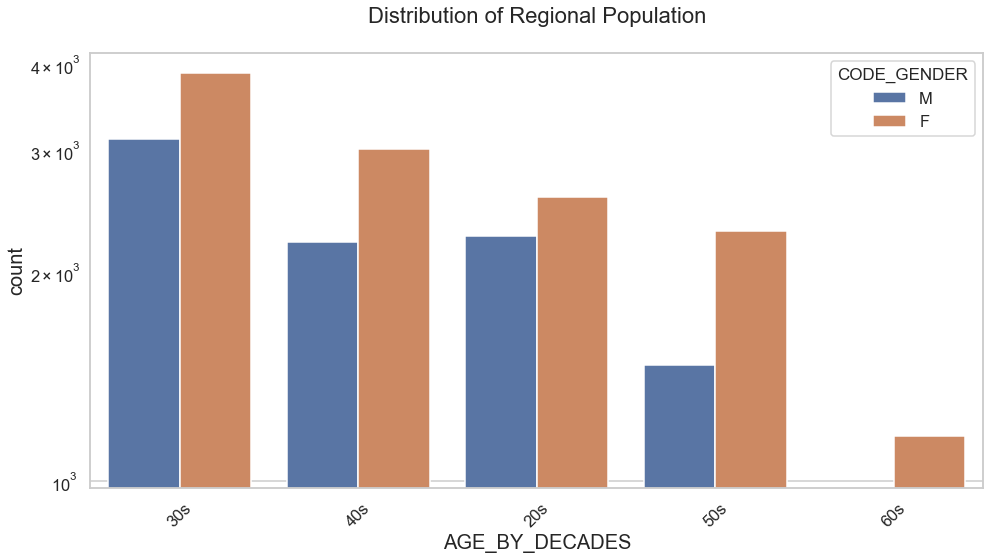

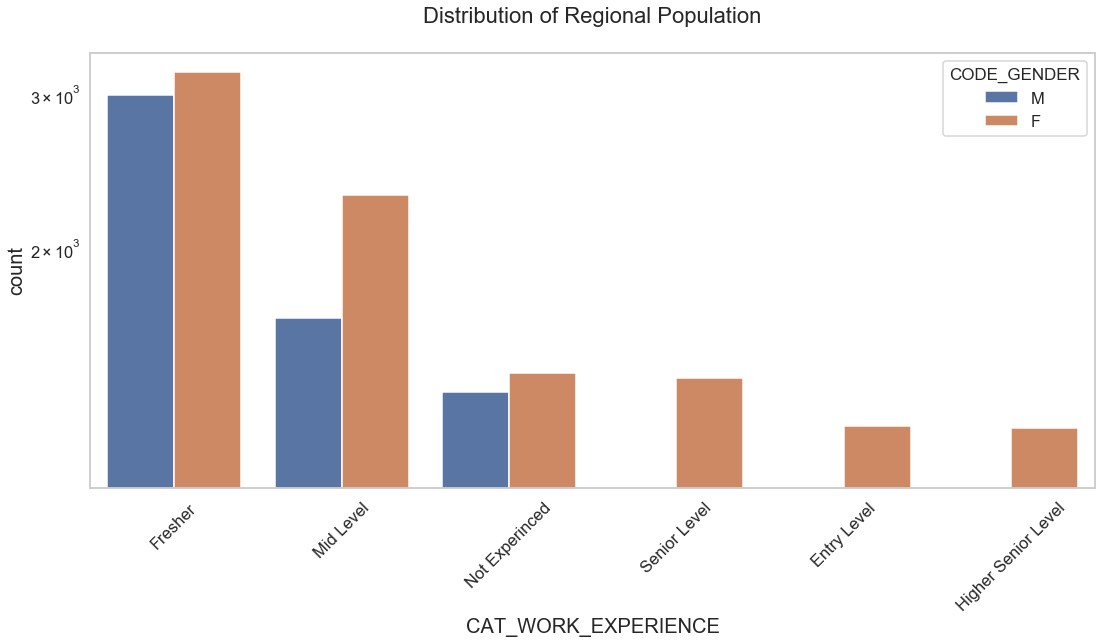

In [48]:
# PLotting for income range

uniplot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of Income Range',hue='CODE_GENDER')

# Plotting for Income type

uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

# Plotting for Contract type

uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

# Plotting for Region Population

uniplot(target1_df,col='CAT_REGION_POPULATION',title='Distribution of Regional Population',hue='CODE_GENDER')

# Plotting for Age Buckets

uniplot(target1_df,col='AGE_BY_DECADES',title='Distribution of Regional Population',hue='CODE_GENDER')

# Plotting for Age Buckets

uniplot(target1_df,col='CAT_WORK_EXPERIENCE',title='Distribution of Regional Population',hue='CODE_GENDER')

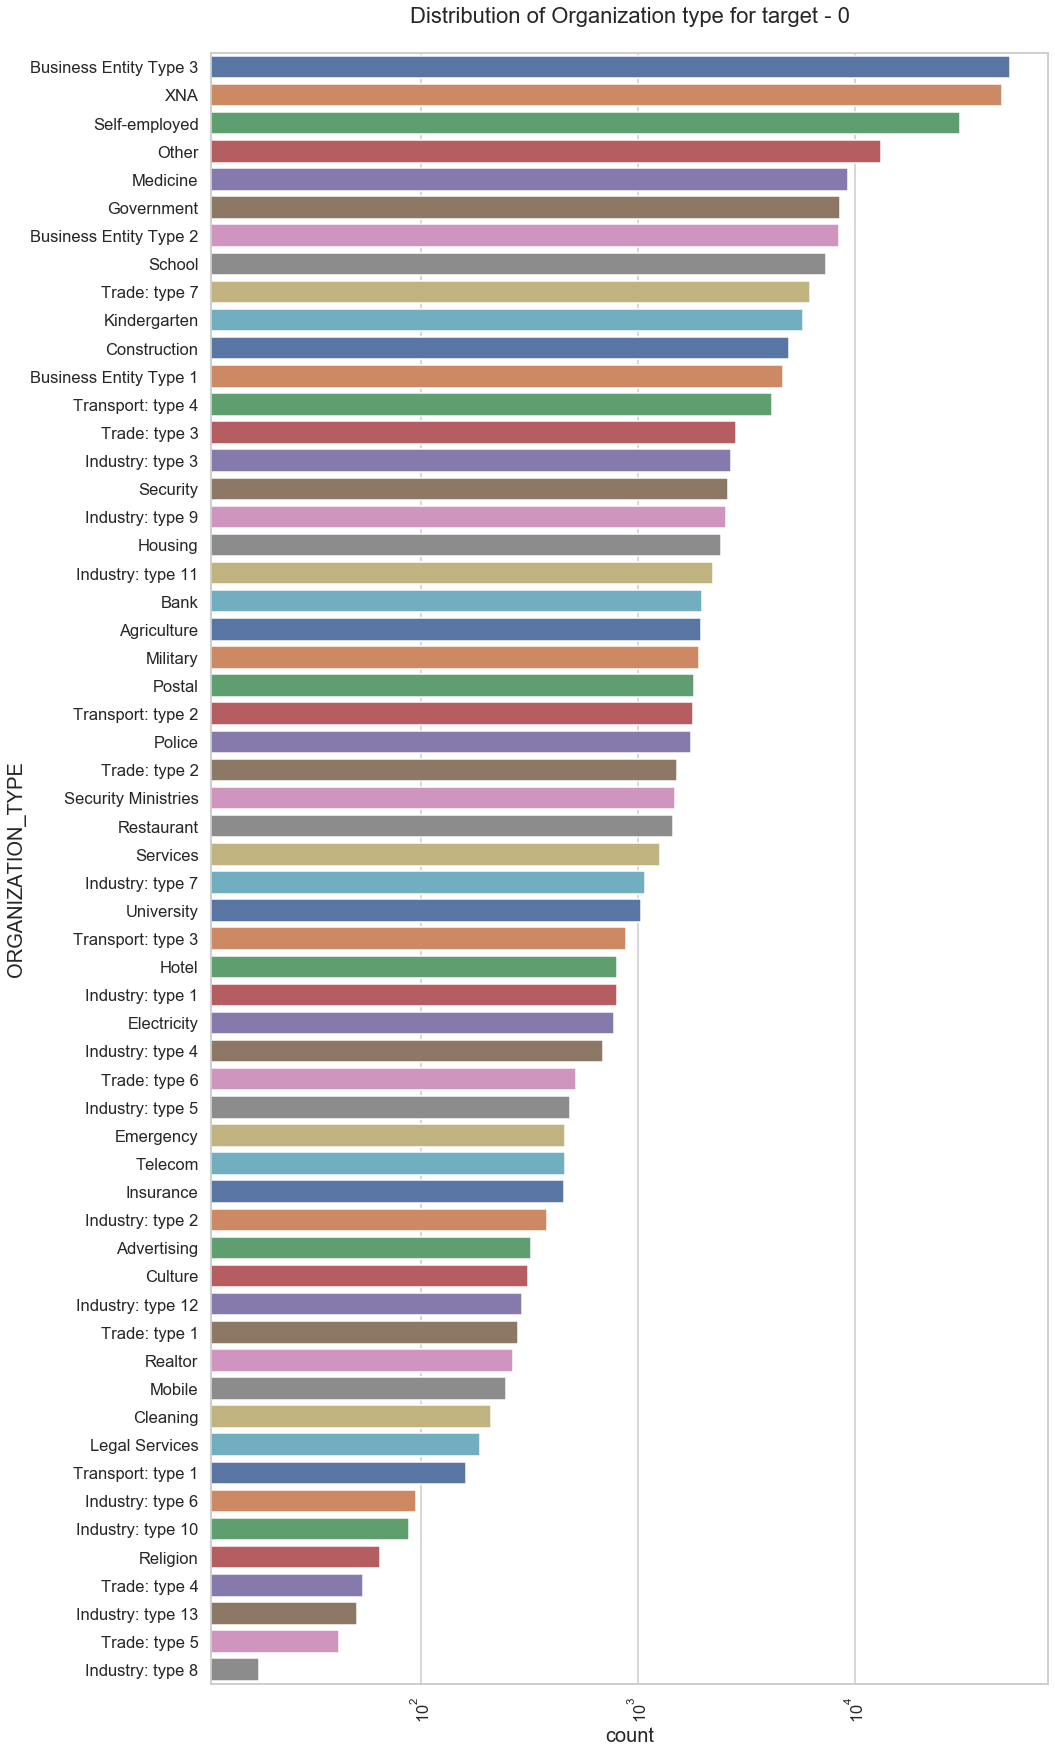

In [49]:

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='deep')

plt.show()

### Conclusion
- Male counts are higher than female.
- Income range from 100000 to 200000 is having more number of credits.
- This graph show that males are more than female in having credits for that range.
- Very less count for income range 400000 and above.
- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
- For this Females are having more number of credits than male.
- Less number of credits for income type ‘Maternity leave’.
- For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.
- For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
- For this also Female is leading for applying credits.
- For type 1 : there is only Female Revolving loans.
- Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
- Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
- Same as type 0 in distribution of organization type.

**DATA IMBALANCE** <br>
For our case study we will consider any data with 80% of population of column for 1 particular value as Data Imbalance. <br>
Quick review of countplot and pie plot indicate imbalance for below columns. <br>
1. CONTRACT_TYPE - Over 90% of the population is for 'Cash loans'<br>
2. NAME_TYPE_SUITE -  Over 80% of the population is for 'Unaccompanied'<br>
3. NAME_HOUSING TYPE -  Over 80% of the population is for 'House / apartment'

**How will we deal with it?** <br>
1. All analysis on these categorical variables will be using percentage instead of absolute value. <br>
2. Value for which contribution is significantly less will not be used to derive any conclusion.</font>

### 4.4 **Finding Correlation for Numerical columns in Target 1 and 0**

In [50]:
target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0cor=target0_corr.corr(method='spearman')
target1cor=target1_corr.corr(method='spearman')

In [51]:
#Correlation for Target = 0

target0cor

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                      1.000000          0.037784   -0.000050   
AMT_INCOME_TOTAL                  0.037784          1.000000    0.346881   
AMT_CREDIT                       -0.000050          0.346881    1.000000   
AMT_ANNUITY                       0.022857          0.416594    0.809580   
AMT_GOODS_PRICE                  -0.003950          0.349820    0.982749   
REGION_POPULATION_RELATIVE       -0.022485          0.063865    0.025644   
DAYS_BIRTH                       -0.373093         -0.107978    0.057023   
DAYS_EMPLOYED                    -0.211710         -0.107856    0.016278   
DAYS_REGISTRATION                -0.176001         -0.069567    0.001233   
DAYS_ID_PUBLISH                   0.011923         -0.039891    0.001535   
FLAG_MOBIL                        0.001261          0.000743    0.001442   
FLAG_EMP_PHONE                    0.274914          0.198507    0.065628   
FLAG_WORK_PHONE                   0.052515         -0.058248   -0.036547   
FLAG_CONT_MOBILE                 -0.002337         -0.003564    0.033594   
FLAG_PHONE                       -0.034552         -0.027485    0.003276   
FLAG_EMAIL                        0.024167          0.081403   -0.001155   
CNT_FAM_MEMBERS                   0.796432          0.035415    0.072242   
REGION_RATING_CLIENT              0.018790         -0.165420   -0.044976   
REGION_RATING_CLIENT_W_CITY       0.017308         -0.183434   -0.051532   
HOUR_APPR_PROCESS_START           0.006230          0.090580    0.035203   
REG_REGION_NOT_LIVE_REGION       -0.011035          0.068639    0.005459   
REG_REGION_NOT_WORK_REGION        0.015554          0.144235    0.023043   
LIVE_REGION_NOT_WORK_REGION       0.021840          0.132347    0.027340   
REG_CITY_NOT_LIVE_CITY            0.029050          0.025949   -0.026699   
REG_CITY_NOT_WORK_CITY            0.076816          0.053145   -0.006321   
LIVE_CITY_NOT_WORK_CITY           0.070545          0.049819    0.012989   
YEARS_BEGINEXPLUATATION_AVG       0.014859          0.035244    0.019271   
FLOORSMAX_AVG                    -0.014040          0.130673    0.044405   
YEARS_BEGINEXPLUATATION_MODE      0.014638          0.031576    0.017742   
FLOORSMAX_MODE                   -0.013159          0.125136    0.043580   
YEARS_BEGINEXPLUATATION_MEDI      0.015062          0.034527    0.019206   
FLOORSMAX_MEDI                   -0.013433          0.129008    0.044347   
TOTALAREA_MODE                   -0.010775          0.107013    0.037457   
OBS_30_CNT_SOCIAL_CIRCLE          0.024617         -0.016126    0.012753   
DEF_30_CNT_SOCIAL_CIRCLE         -0.000292         -0.024288   -0.005443   
OBS_60_CNT_SOCIAL_CIRCLE          0.024231         -0.015897    0.012770   
DEF_60_CNT_SOCIAL_CIRCLE         -0.001006         -0.026069   -0.008661   
DAYS_LAST_PHONE_CHANGE            0.010984          0.059670    0.075451   
AMT_REQ_CREDIT_BUREAU_HOUR        0.001173          0.003779   -0.002687   
AMT_REQ_CREDIT_BUREAU_DAY         0.000922          0.007887    0.000602   
AMT_REQ_CREDIT_BUREAU_WEEK       -0.001704          0.009430   -0.006425   
AMT_REQ_CREDIT_BUREAU_MON        -0.000941          0.063017    0.031112   
AMT_REQ_CREDIT_BUREAU_QRT        -0.007201          0.028368    0.020249   
AMT_REQ_CREDIT_BUREAU_YEAR       -0.043667          0.079902   -0.018062   
AGE_YEAR                         -0.373111         -0.107889    0.056996   
EMPLOYED_YEAR                    -0.211900         -0.109011    0.015754   
INCOME_CREDIT_RT                  0.026779          0.252648   -0.794817   
LTV_RT                           -0.016199          0.000474   -0.150839   

                              AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                     0.022857        -0.003950   
AMT_INCOME_TOTAL                 0.416594         0.349820   
AMT_CREDIT                       0.809580         0.982749   
AMT_ANNUITY                      1.000000         0.80587

In [52]:
#Correlation for Target = 0

target1cor

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                      1.000000         -0.001216    0.002777   
AMT_INCOME_TOTAL                 -0.001216          1.000000    0.318964   
AMT_CREDIT                        0.002777          0.318964    1.000000   
AMT_ANNUITY                       0.035477          0.389422    0.797897   
AMT_GOODS_PRICE                  -0.005074          0.321972    0.974784   
REGION_POPULATION_RELATIVE       -0.029459          0.035940    0.028273   
DAYS_BIRTH                       -0.263681         -0.008328    0.150771   
DAYS_EMPLOYED                    -0.127251         -0.042474    0.080470   
DAYS_REGISTRATION                -0.126602         -0.031026    0.020672   
DAYS_ID_PUBLISH                   0.019721          0.003877    0.053277   
FLAG_MOBIL                             NaN               NaN         NaN   
FLAG_EMP_PHONE                    0.215559          0.138693   -0.000669   
FLAG_WORK_PHONE                   0.040587         -0.093654   -0.076356   
FLAG_CONT_MOBILE                  0.002272          0.005672    0.039068   
FLAG_PHONE                       -0.025656         -0.034178   -0.012034   
FLAG_EMAIL                        0.017334          0.077054   -0.004098   
CNT_FAM_MEMBERS                   0.810505          0.003544    0.070711   
REGION_RATING_CLIENT              0.037438         -0.136465   -0.027757   
REGION_RATING_CLIENT_W_CITY       0.038590         -0.150082   -0.036640   
HOUR_APPR_PROCESS_START          -0.017894          0.079739    0.019177   
REG_REGION_NOT_LIVE_REGION       -0.027395          0.064430   -0.000293   
REG_REGION_NOT_WORK_REGION       -0.022665          0.141864    0.016650   
LIVE_REGION_NOT_WORK_REGION      -0.013293          0.134240    0.022951   
REG_CITY_NOT_LIVE_CITY            0.005875          0.012575   -0.028641   
REG_CITY_NOT_WORK_CITY            0.043350          0.036209   -0.026161   
LIVE_CITY_NOT_WORK_CITY           0.045251          0.034296   -0.009060   
YEARS_BEGINEXPLUATATION_AVG      -0.002530          0.027794    0.003945   
FLOORSMAX_AVG                    -0.024573          0.099099    0.049559   
YEARS_BEGINEXPLUATATION_MODE     -0.000273          0.023231    0.000450   
FLOORSMAX_MODE                   -0.023408          0.096535    0.050075   
YEARS_BEGINEXPLUATATION_MEDI     -0.003100          0.026955    0.004177   
FLOORSMAX_MEDI                   -0.024149          0.099515    0.050573   
TOTALAREA_MODE                   -0.024890          0.080424    0.038969   
OBS_30_CNT_SOCIAL_CIRCLE          0.031807          0.005993    0.017843   
DEF_30_CNT_SOCIAL_CIRCLE         -0.006518         -0.010068   -0.019196   
OBS_60_CNT_SOCIAL_CIRCLE          0.031222          0.005807    0.017605   
DEF_60_CNT_SOCIAL_CIRCLE         -0.005902         -0.017234   -0.026290   
DAYS_LAST_PHONE_CHANGE           -0.009590          0.070658    0.090186   
AMT_REQ_CREDIT_BUREAU_HOUR       -0.000530          0.007219    0.004189   
AMT_REQ_CREDIT_BUREAU_DAY        -0.012531         -0.006126   -0.006769   
AMT_REQ_CREDIT_BUREAU_WEEK       -0.008740          0.020100    0.002965   
AMT_REQ_CREDIT_BUREAU_MON        -0.009877          0.068338    0.031377   
AMT_REQ_CREDIT_BUREAU_QRT        -0.016464          0.024612   -0.022418   
AMT_REQ_CREDIT_BUREAU_YEAR       -0.032294          0.090898   -0.019125   
AGE_YEAR                         -0.263511         -0.008357    0.150538   
EMPLOYED_YEAR                    -0.127185         -0.044043    0.081156   
INCOME_CREDIT_RT                 -0.000994          0.316710   -0.767135   
LTV_RT                           -0.035618          0.001163   -0.150129   

                              AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                     0.035477        -0.005074   
AMT_INCOME_TOTAL                 0.389422         0.321972   
AMT_CREDIT                       0.797897         0.974784   
AMT_ANNUITY                      1.000000         0.78914

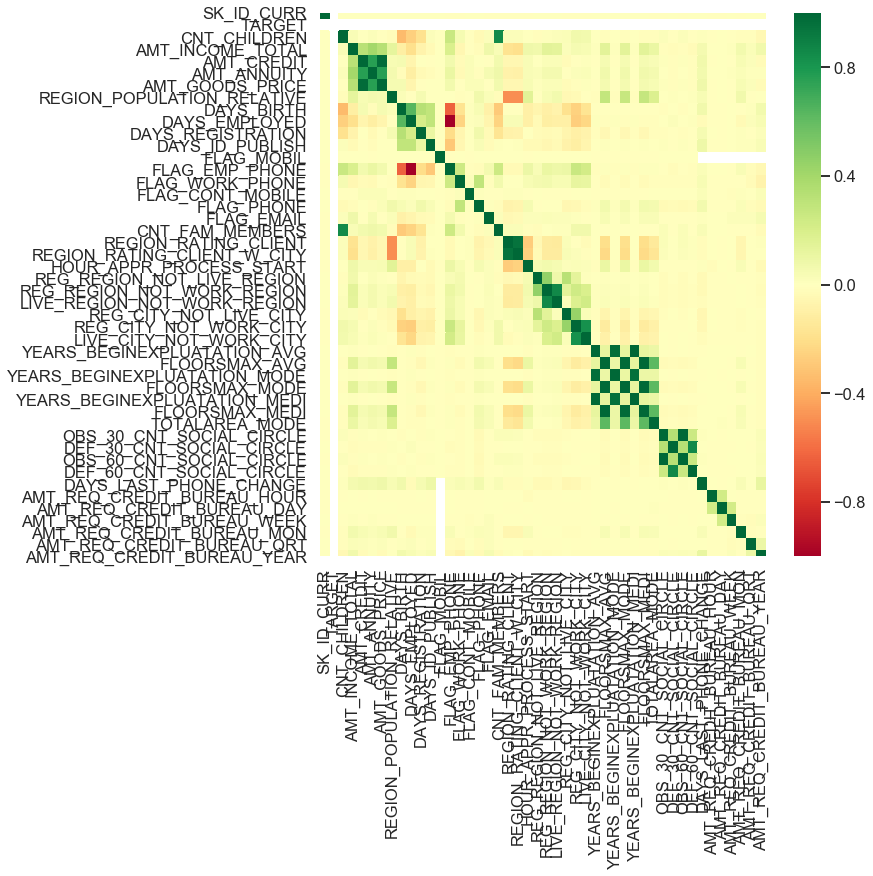

In [53]:
# Correlation for key quantitative variables from application_clean with TARGET=0

plt.figure(6,figsize=(10,10))

cols2anz_corr=target0[numcols].corr()

sns.heatmap(cols2anz_corr,xticklabels=True, yticklabels=True,cmap="RdYlGn")

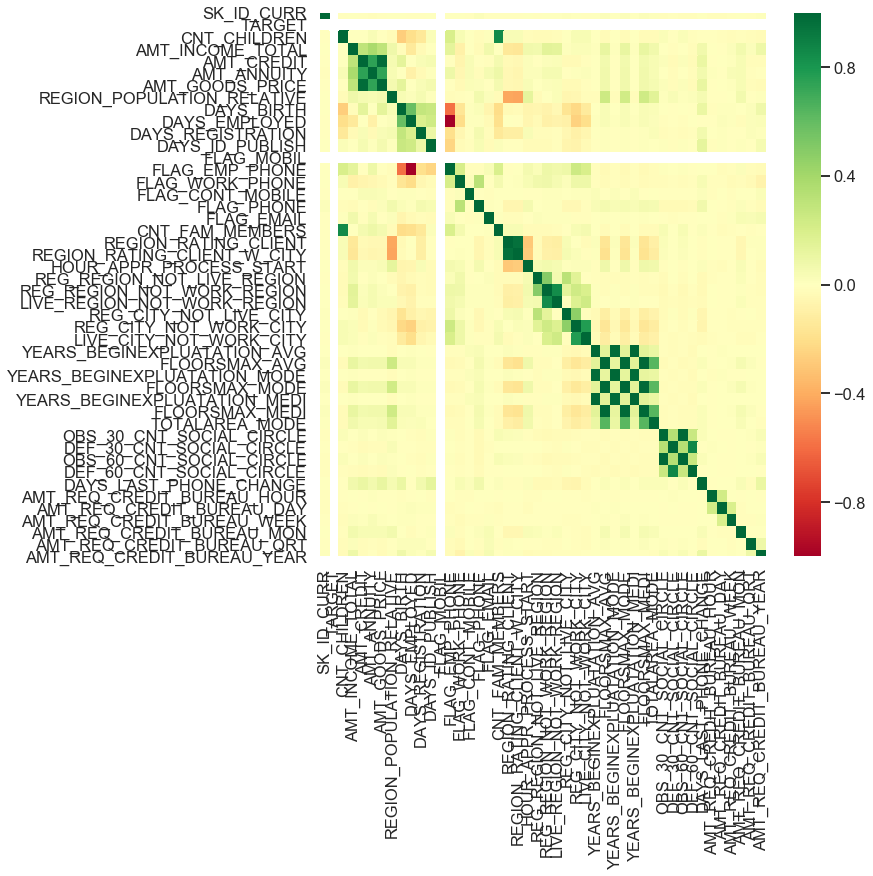

In [54]:
# Correlation for key quantitative variables from application_clean with TARGET=1

plt.figure(6,figsize=(10,10))

cols2anz_corr1=target1[numcols].corr()

sns.heatmap(cols2anz_corr1,xticklabels=True, yticklabels=True,cmap="RdYlGn")

In [55]:
target1_corr = target1.corr()
target1_corr_df = target1_corr.where(np.triu(np.ones(target1_corr.shape), k=1).astype(np.bool))
target1_corr_df = target1_corr_df.unstack().reset_index()
target1_corr_df.columns = ['Var1', 'Var2', 'Correlation']
target1_corr_df.dropna(subset = ['Correlation'],inplace=True)
target1_corr_df['Correlation'] = abs(round(target1_corr_df['Correlation'],2))
target1_corr_df.sort_values(by='Correlation', ascending = False).head(10)



Var1                         Var2  Correlation
1885      OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE         1.00
1628  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG         1.00
2359                 EMPLOYED_YEAR                DAYS_EMPLOYED         1.00
2363                 EMPLOYED_YEAR               FLAG_EMP_PHONE         1.00
1679                FLOORSMAX_MEDI                FLOORSMAX_AVG         1.00
659                 FLAG_EMP_PHONE                DAYS_EMPLOYED         1.00
2308                      AGE_YEAR                   DAYS_BIRTH         1.00
1579                FLOORSMAX_MODE                FLOORSMAX_AVG         0.99
1681                FLOORSMAX_MEDI               FLOORSMAX_MODE         0.99
1528  YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG         0.98

In [56]:
target0_corr = target0.corr()
target0_corr_df = target0_corr.where(np.triu(np.ones(target0_corr.shape), k=1).astype(np.bool))
target0_corr_df = target0_corr_df.unstack().reset_index()
target0_corr_df.columns = ['Var1', 'Var2', 'Correlation']
target0_corr_df.dropna(subset = ['Correlation'],inplace=True)
target0_corr_df['Correlation'] = abs(round(target0_corr_df['Correlation'],2))
target0_corr_df.sort_values(by='Correlation', ascending = False).head(10)


Var1                         Var2  Correlation
2359                 EMPLOYED_YEAR                DAYS_EMPLOYED         1.00
2308                      AGE_YEAR                   DAYS_BIRTH         1.00
2363                 EMPLOYED_YEAR               FLAG_EMP_PHONE         1.00
1679                FLOORSMAX_MEDI                FLOORSMAX_AVG         1.00
659                 FLAG_EMP_PHONE                DAYS_EMPLOYED         1.00
1885      OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE         1.00
1579                FLOORSMAX_MODE                FLOORSMAX_AVG         0.99
1681                FLOORSMAX_MEDI               FLOORSMAX_MODE         0.99
1628  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG         0.99
304                AMT_GOODS_PRICE                   AMT_CREDIT         0.98

### 4.5 **Checking and Comparing correlation of both Target 1 and 0.**

In [57]:
corr_df = pd.merge(target0_corr_df,target1_corr_df,how='inner',on=['Var1','Var2'],suffixes=('_0','_1'))
corr_df[corr_df.Correlation_0 == corr_df.Correlation_1].head(10)
# corr_df[corr_df.Correlation_0 > corr_df.Correlation_1]
# corr_df[corr_df.Correlation_0 < corr_df.Correlation_1]

Var1                        Var2  Correlation_0  \
0                 CNT_CHILDREN                  SK_ID_CURR           0.00   
3                   AMT_CREDIT                  SK_ID_CURR           0.00   
4                   AMT_CREDIT                CNT_CHILDREN           0.00   
10             AMT_GOODS_PRICE                  SK_ID_CURR           0.00   
13             AMT_GOODS_PRICE                  AMT_CREDIT           0.98   
15  REGION_POPULATION_RELATIVE                  SK_ID_CURR           0.00   
21                  DAYS_BIRTH                  SK_ID_CURR           0.00   
28               DAYS_EMPLOYED                  SK_ID_CURR           0.00   
36           DAYS_REGISTRATION                  SK_ID_CURR           0.00   
42           DAYS_REGISTRATION  REGION_POPULATION_RELATIVE           0.05   

    Correlation_1  
0            0.00  
3            0.00  
4            0.00  
10           0.00  
13           0.98  
15           0.00  
21           0.00  
28           0.00  
36           0.00  
42           0.05

### 4.6 **Segmented Univariate Analysis of `Application Clean`**

#### Check for Outliers by Boxplots

In [58]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_df, x=col,orient='v')
    plt.show()

### 4.6.1 Boxplot Analysis for Target = 0

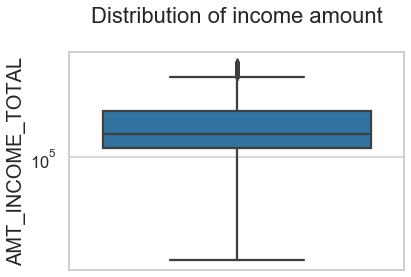

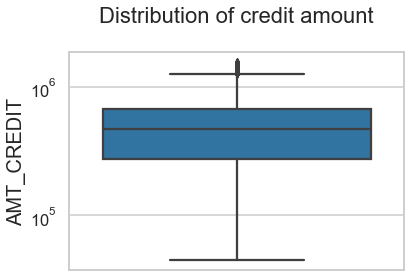

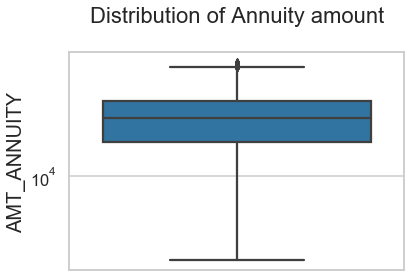

In [59]:
# Distribution of income amount

univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

# Disrtibution of credit amount

univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount')

# Distribution of anuuity amount

univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

#### Observations

- Some outliers are noticed in income amount.
- The third quartiles is very slim for income amount.
- Some outliers are noticed in credit amount.
- The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.
- Some outliers are noticed in annuity amount.
- The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

### 4.6.2 Boxplot Analysis for Target = 1

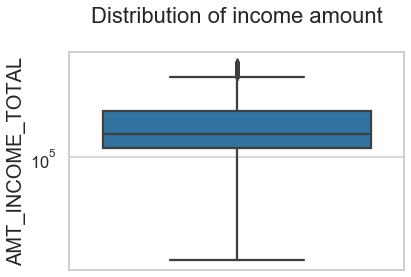

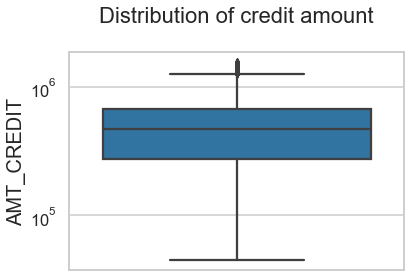

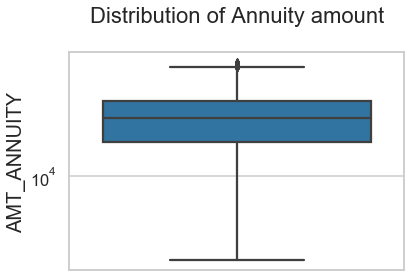

In [60]:
# Distribution of income amount

univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

# Disrtibution of credit amount

univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of credit amount')

# Distribution of anuuity amount

univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

#### Observations

- Some outliers are noticed in income amount.
- The third quartiles is very slim for income amount.
- Most of the clients of income are present in first quartile.
- Some outliers are noticed in credit amount.
- The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.
- Some outliers are noticed in annuity amount.
- The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

### 4.6.3 Segmented Univariate Analysis overall

length:  13


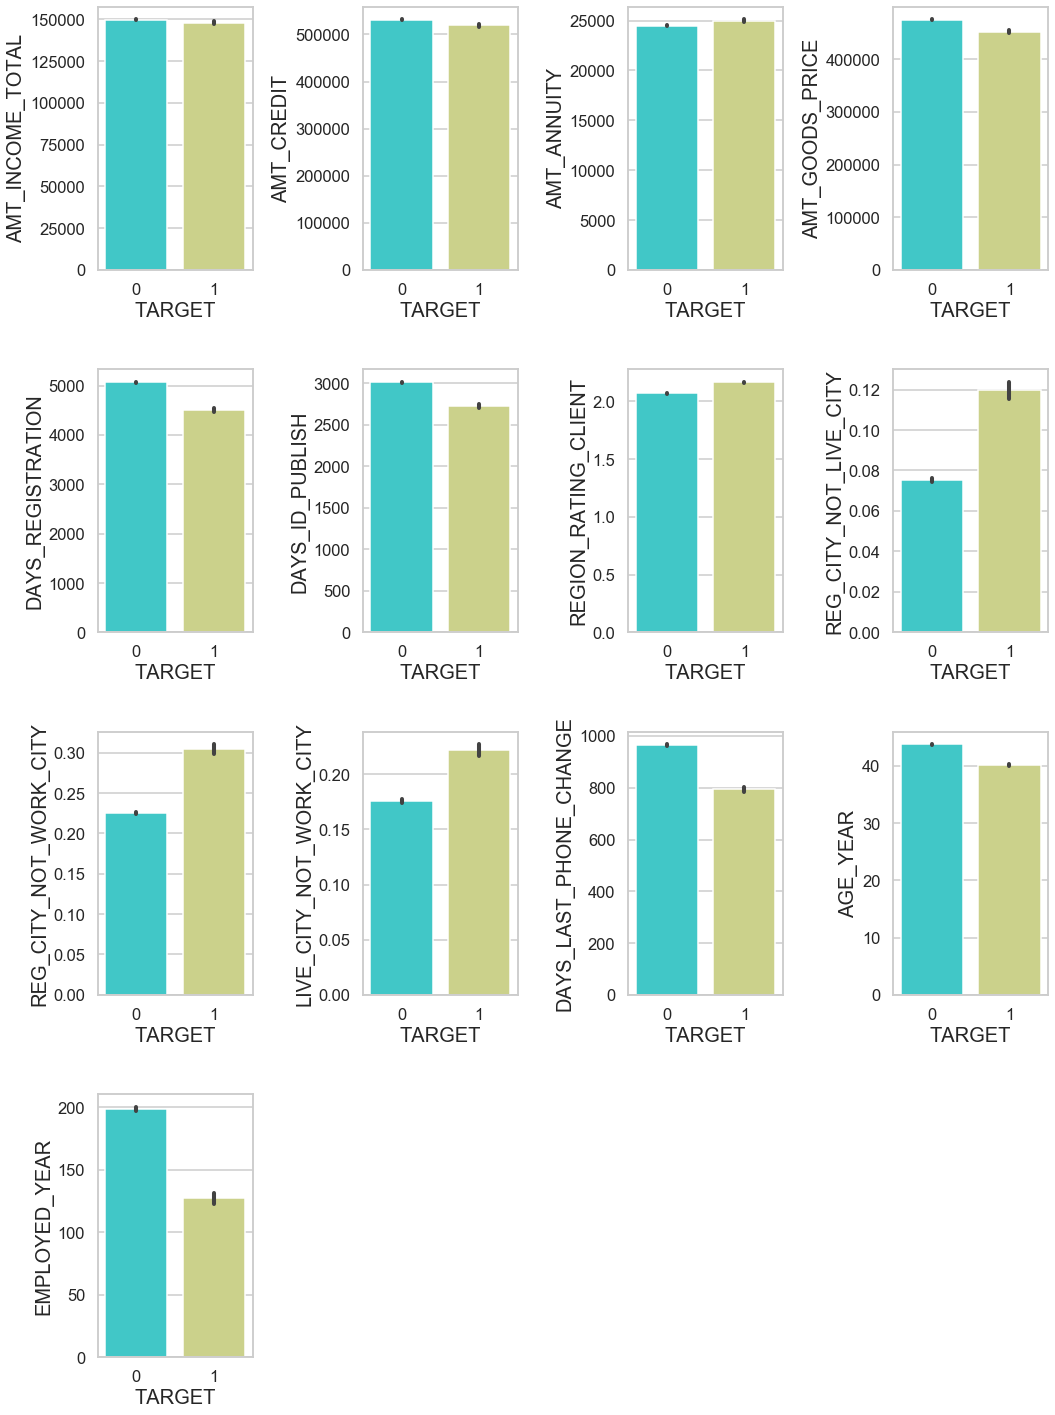

In [61]:

# Segmented Univariate Analysis - Application Clean
# Analyze impact of target on other quantitative variables.

# Running analysis on selected relevant columns for segmented analysis

segnumcols = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE", "DAYS_REGISTRATION", 
              "DAYS_ID_PUBLISH", "REGION_RATING_CLIENT","REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", 
              "LIVE_CITY_NOT_WORK_CITY", "DAYS_LAST_PHONE_CHANGE", "AGE_YEAR", "EMPLOYED_YEAR"]

# Number of numerical columns
ln=len(segnumcols)
print("length: ",ln)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(5,figsize=(15,20))

# Running in loop to plot all columns as subplot
for column in segnumcols:
#     print("ct: ",ct)
    plt.subplot(m,n,ct)

    #     plt.yscale("log")
    sns.barplot(y=column,x="TARGET",data=application_clean,palette='rainbow')
    ct+=1

# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<Figure size 1440x360 with 0 Axes>

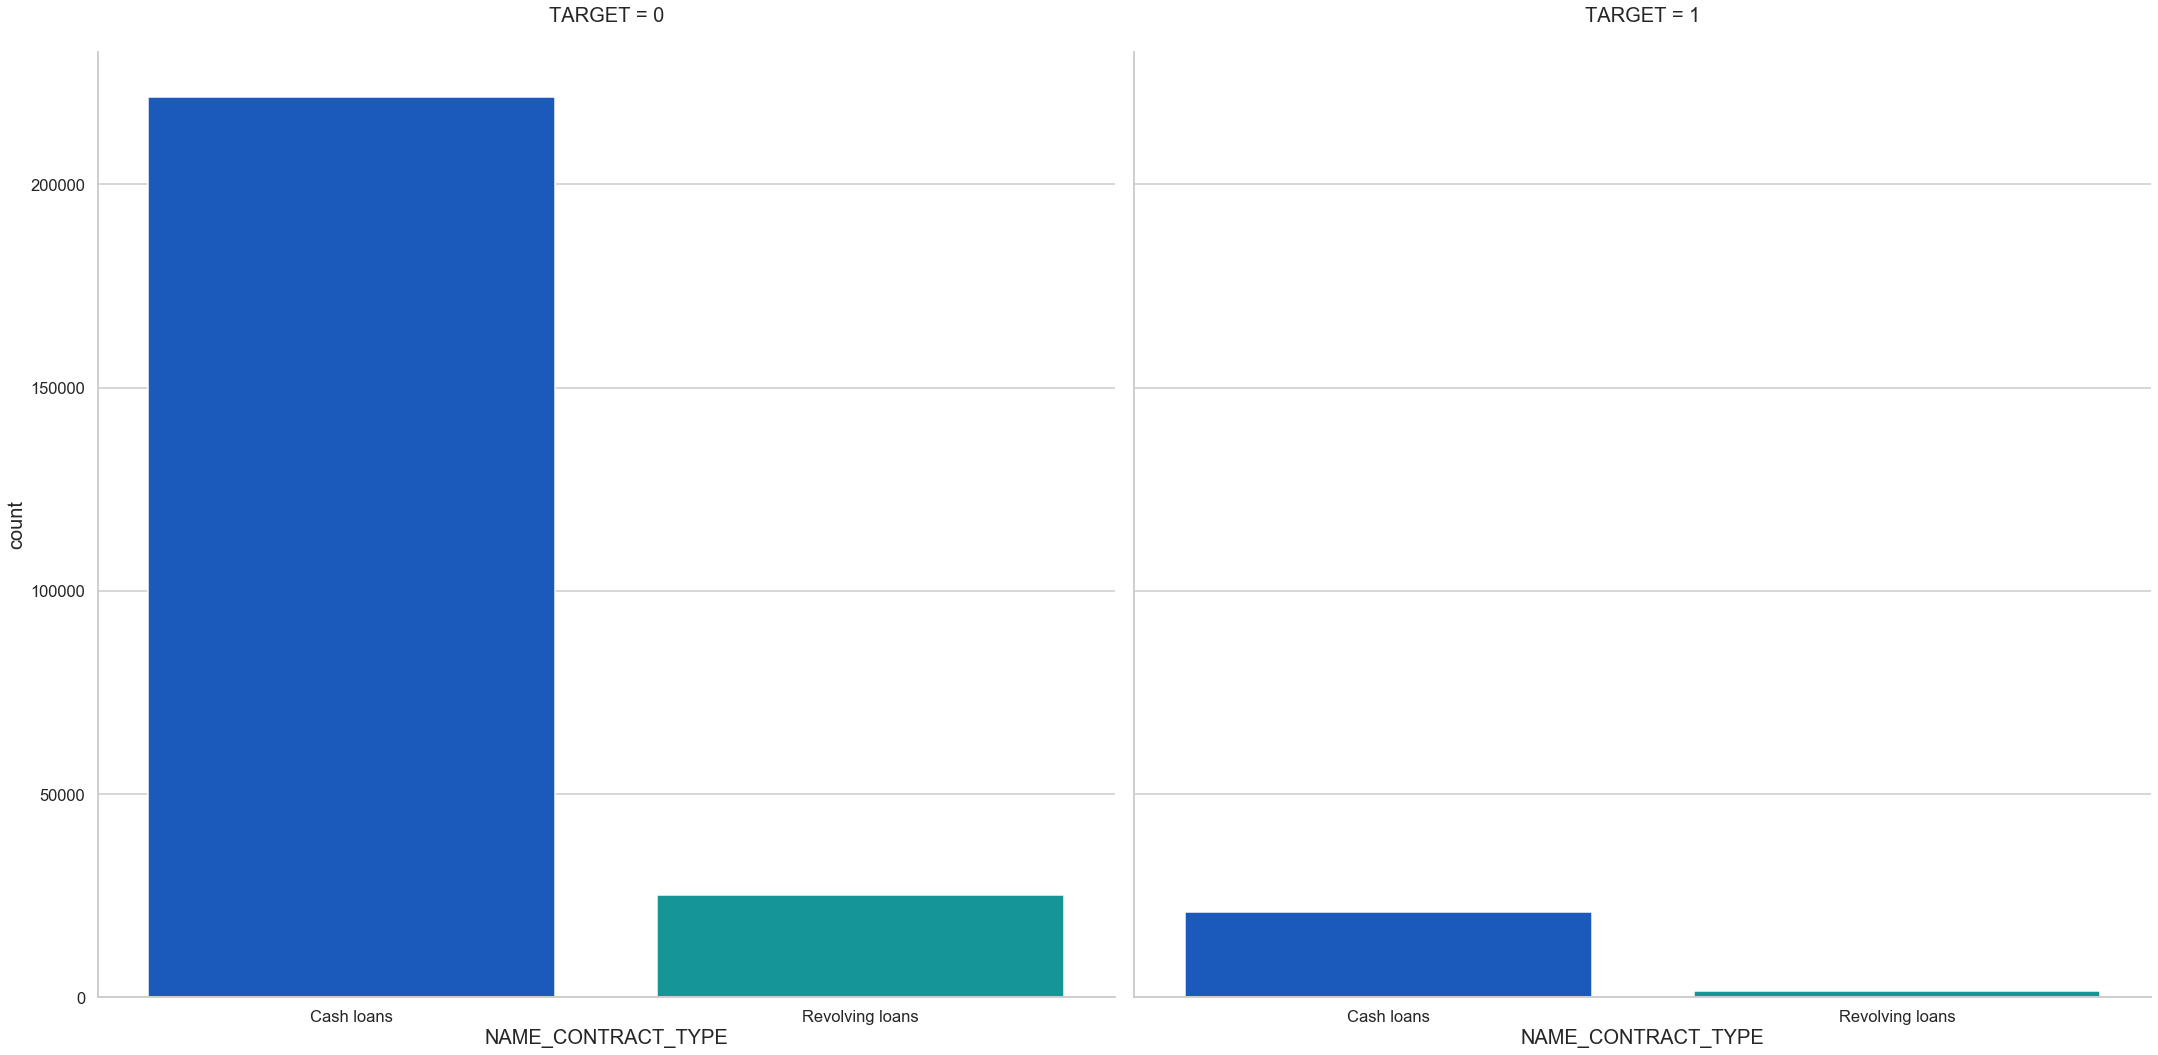

<Figure size 1440x360 with 0 Axes>

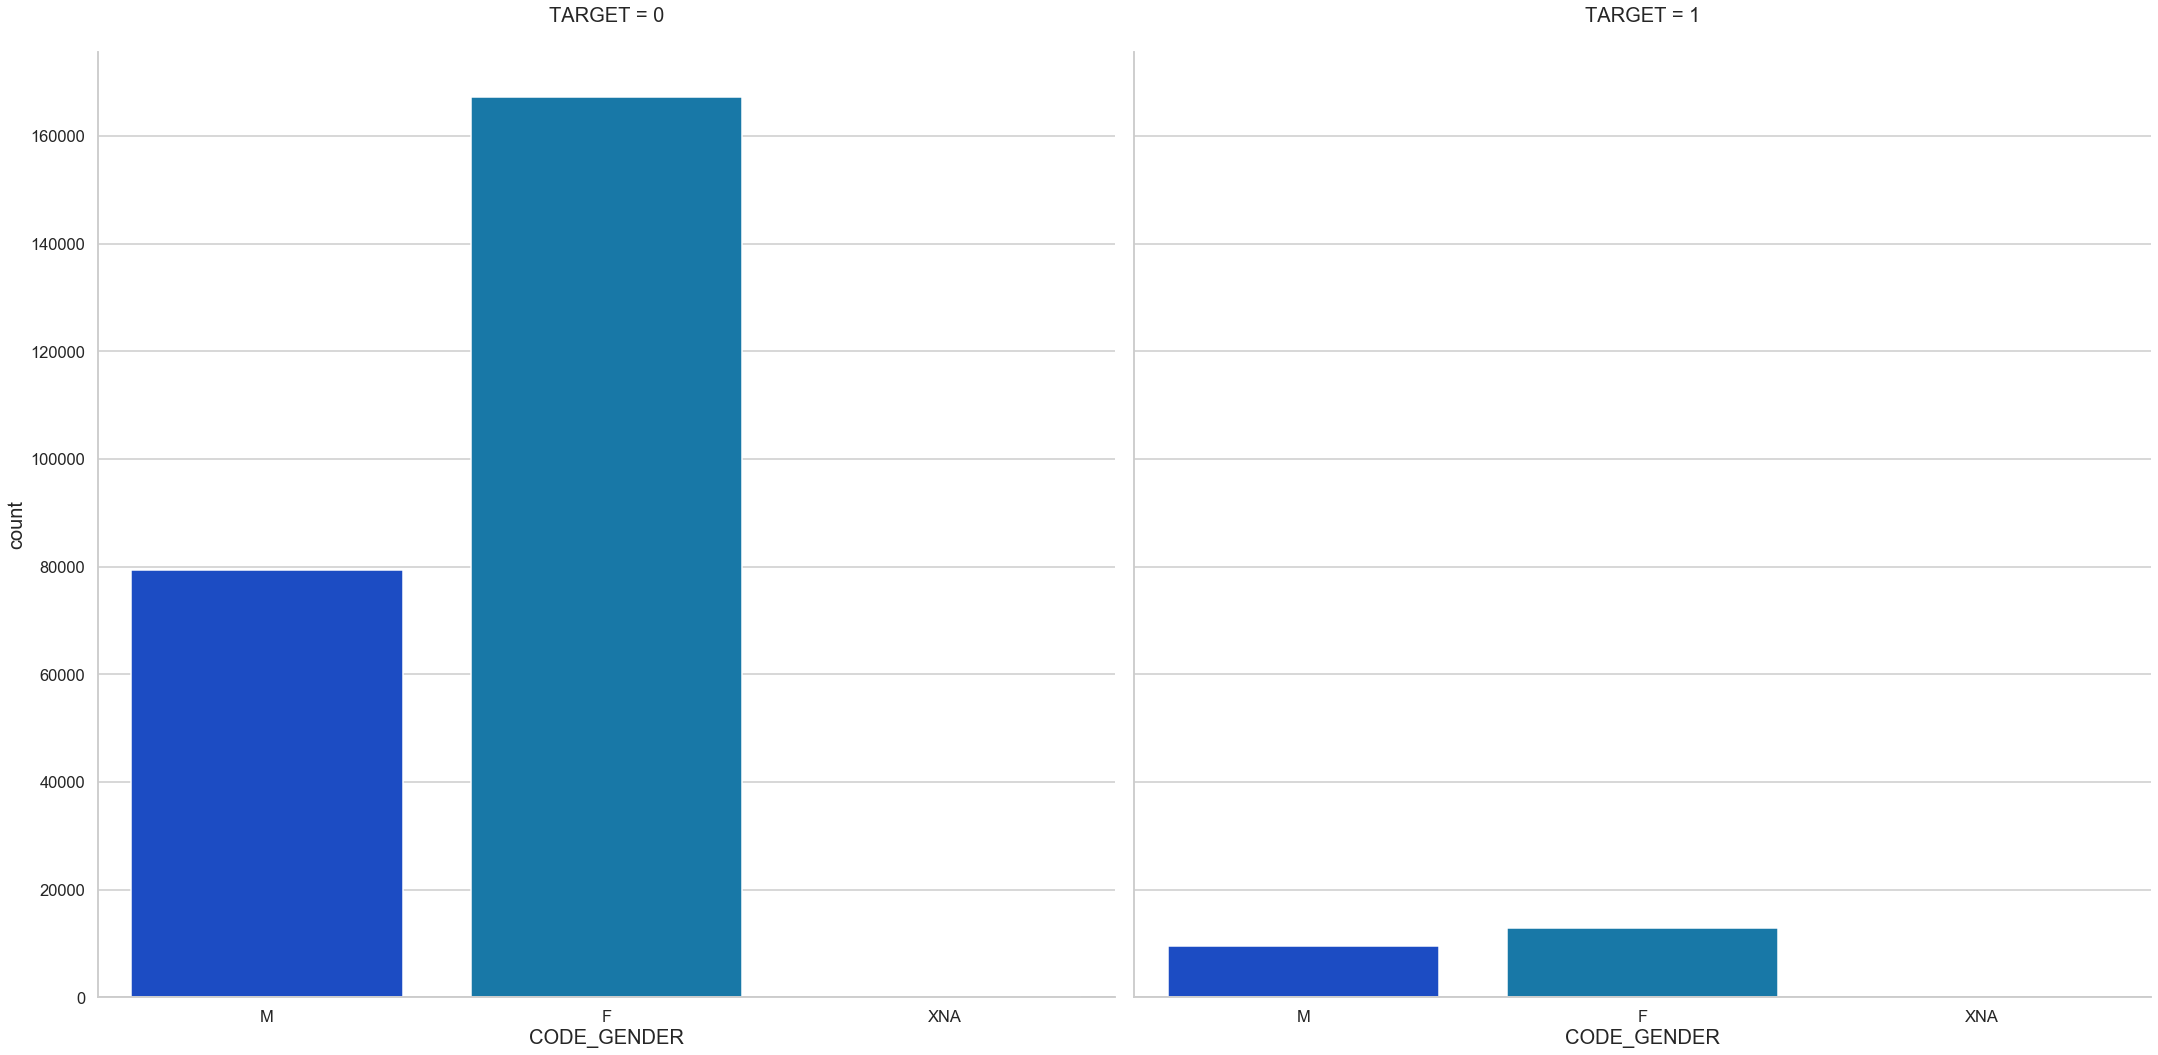

<Figure size 1440x360 with 0 Axes>

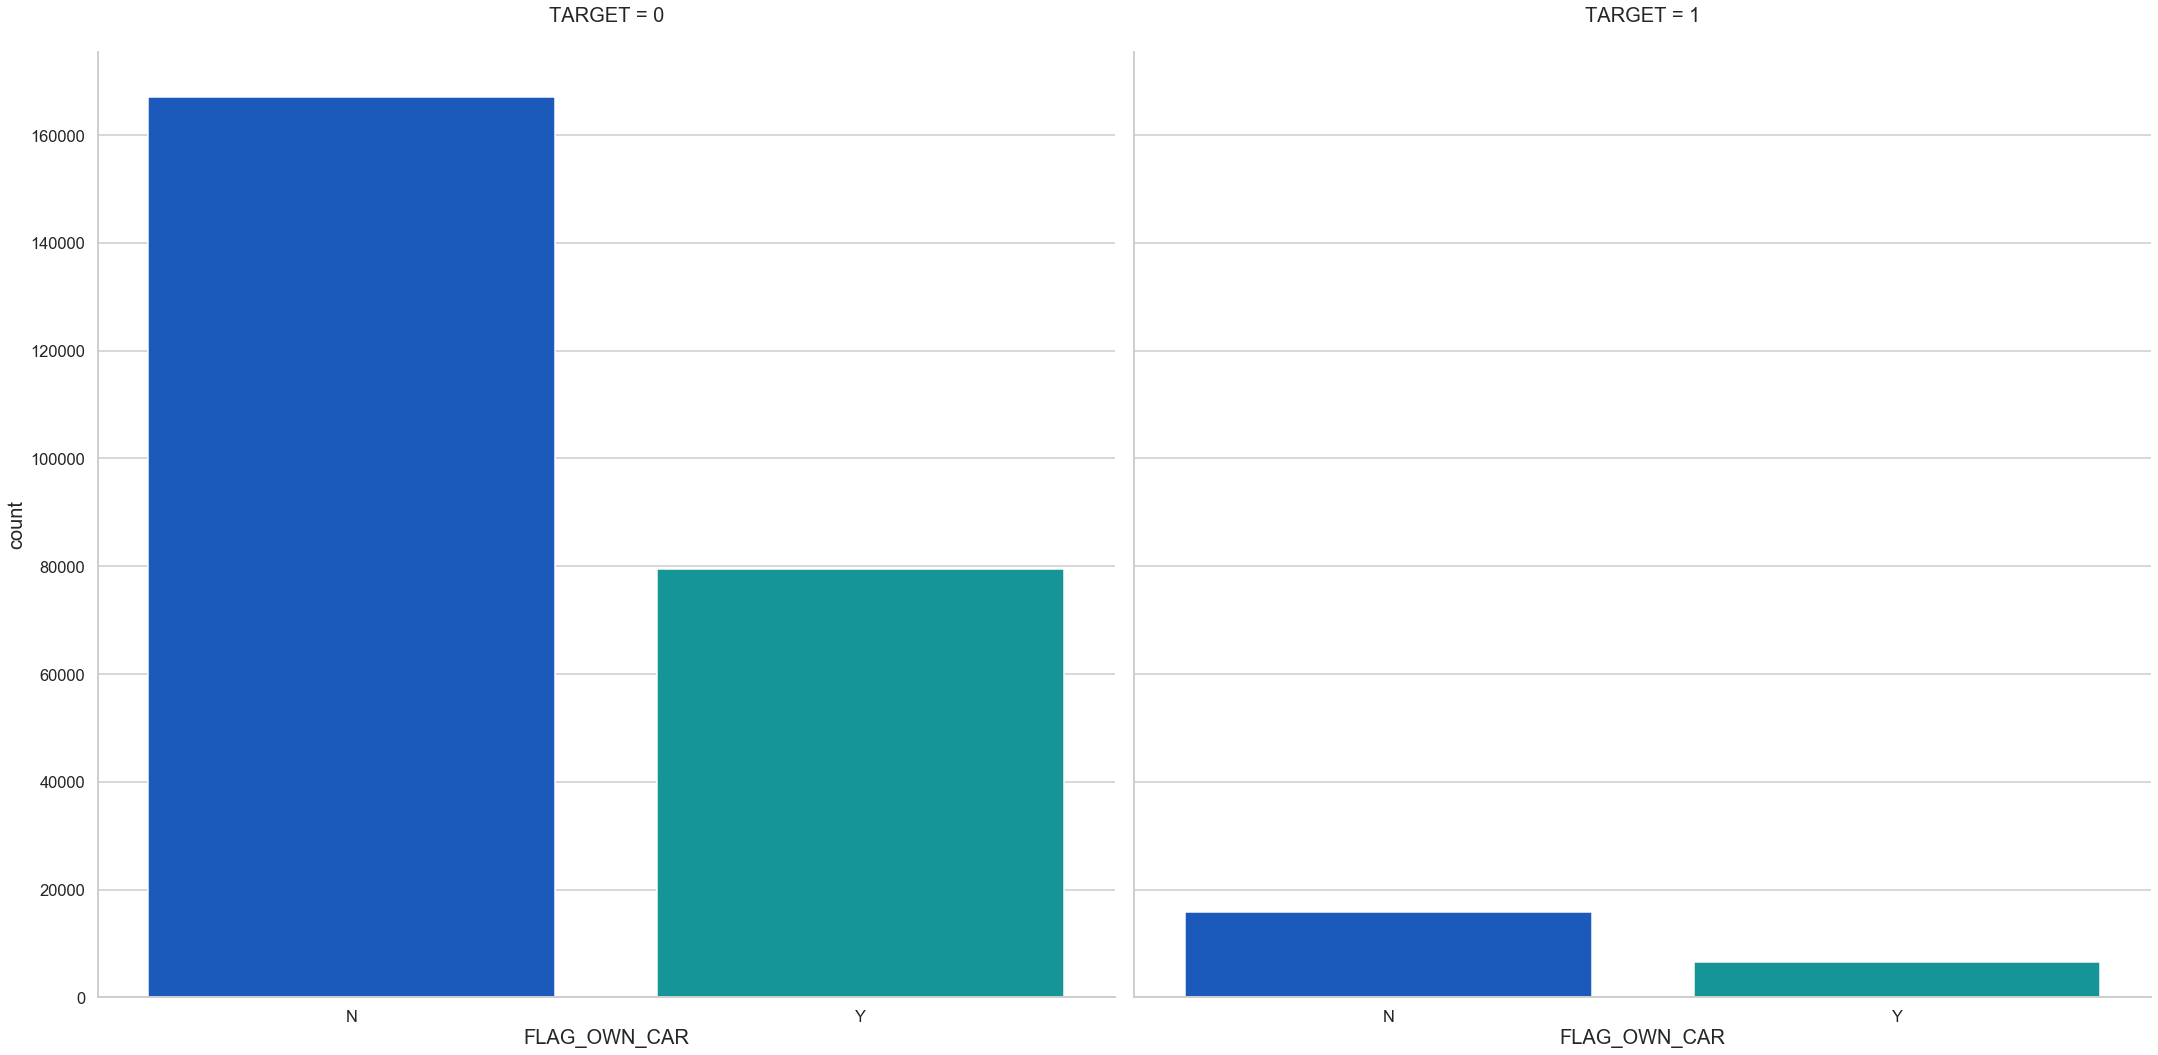

<Figure size 1440x360 with 0 Axes>

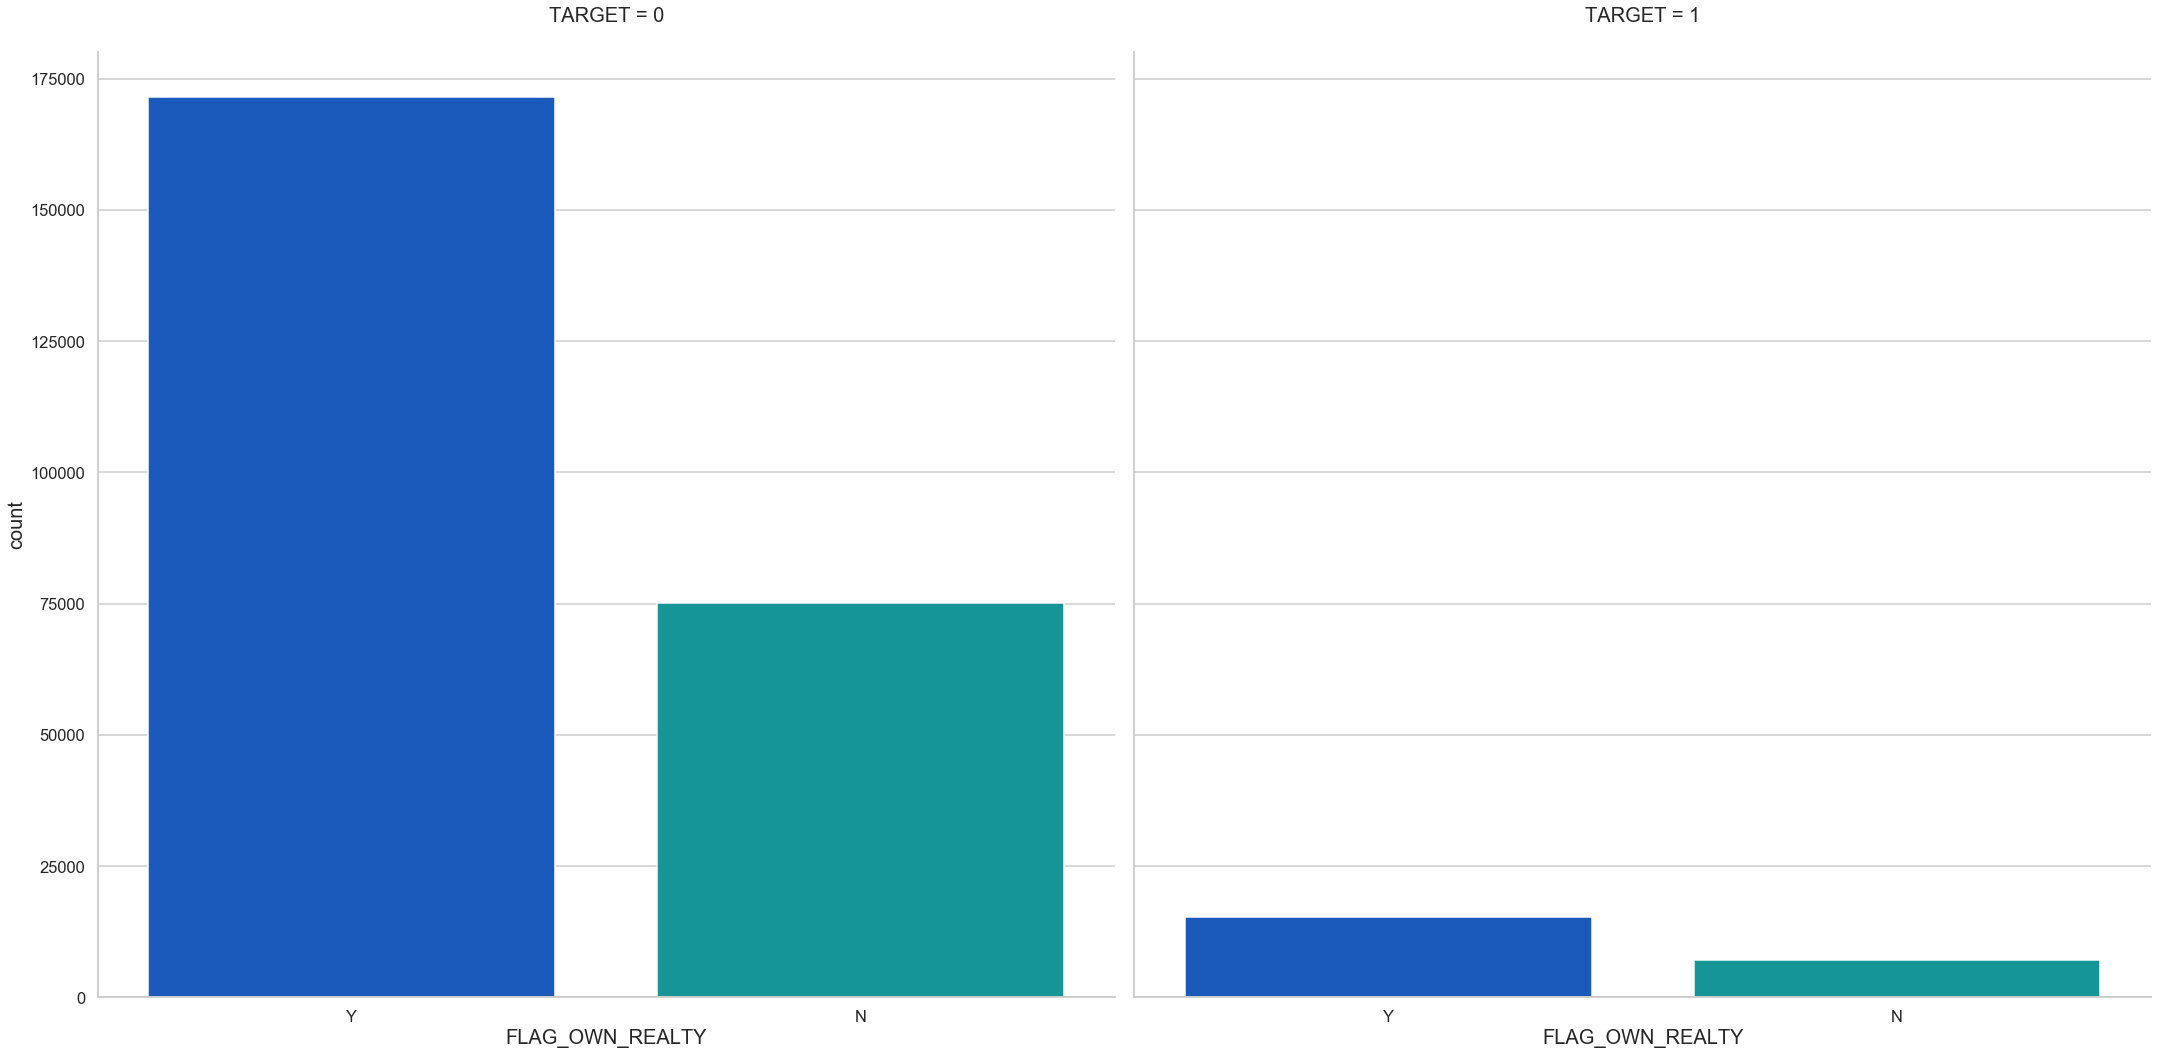

<Figure size 1440x360 with 0 Axes>

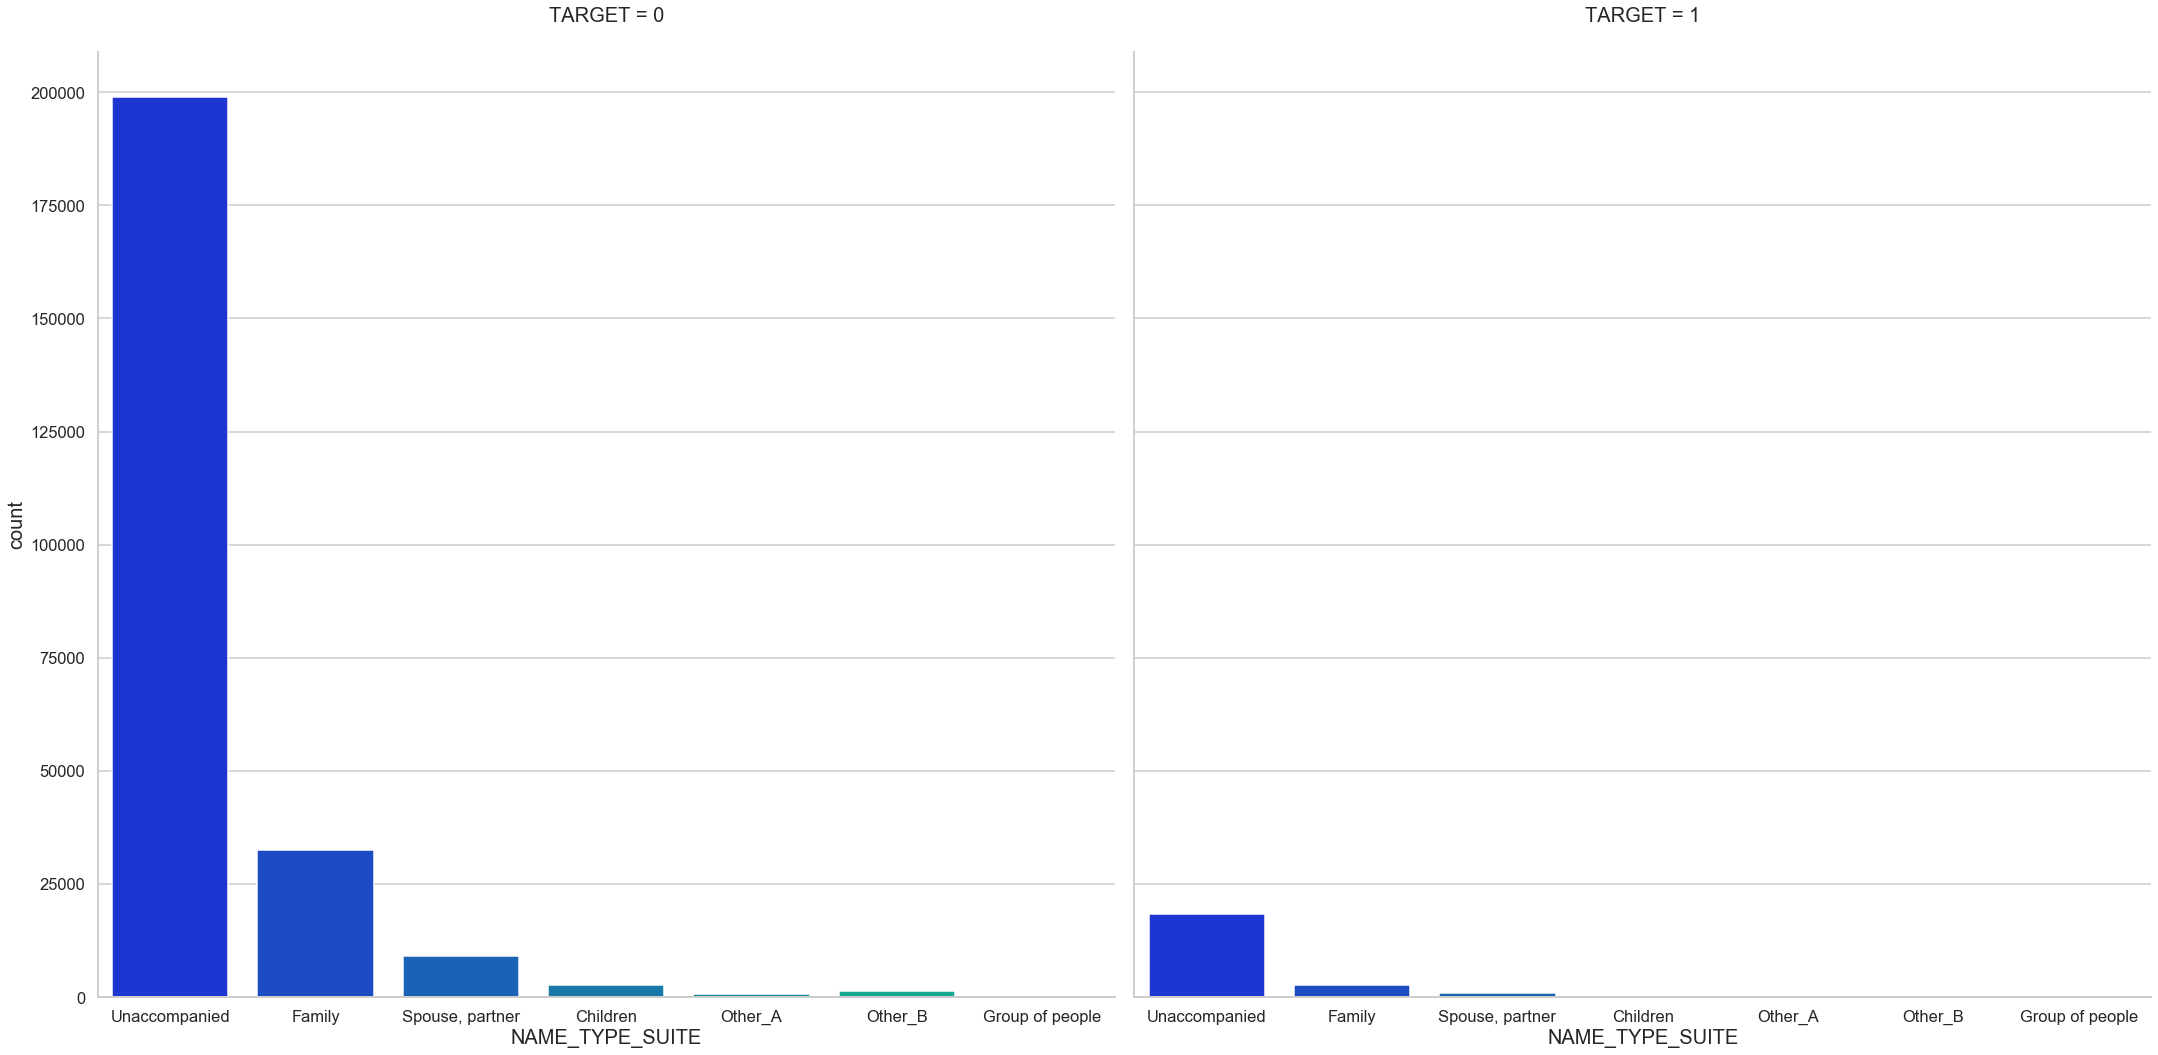

<Figure size 1440x360 with 0 Axes>

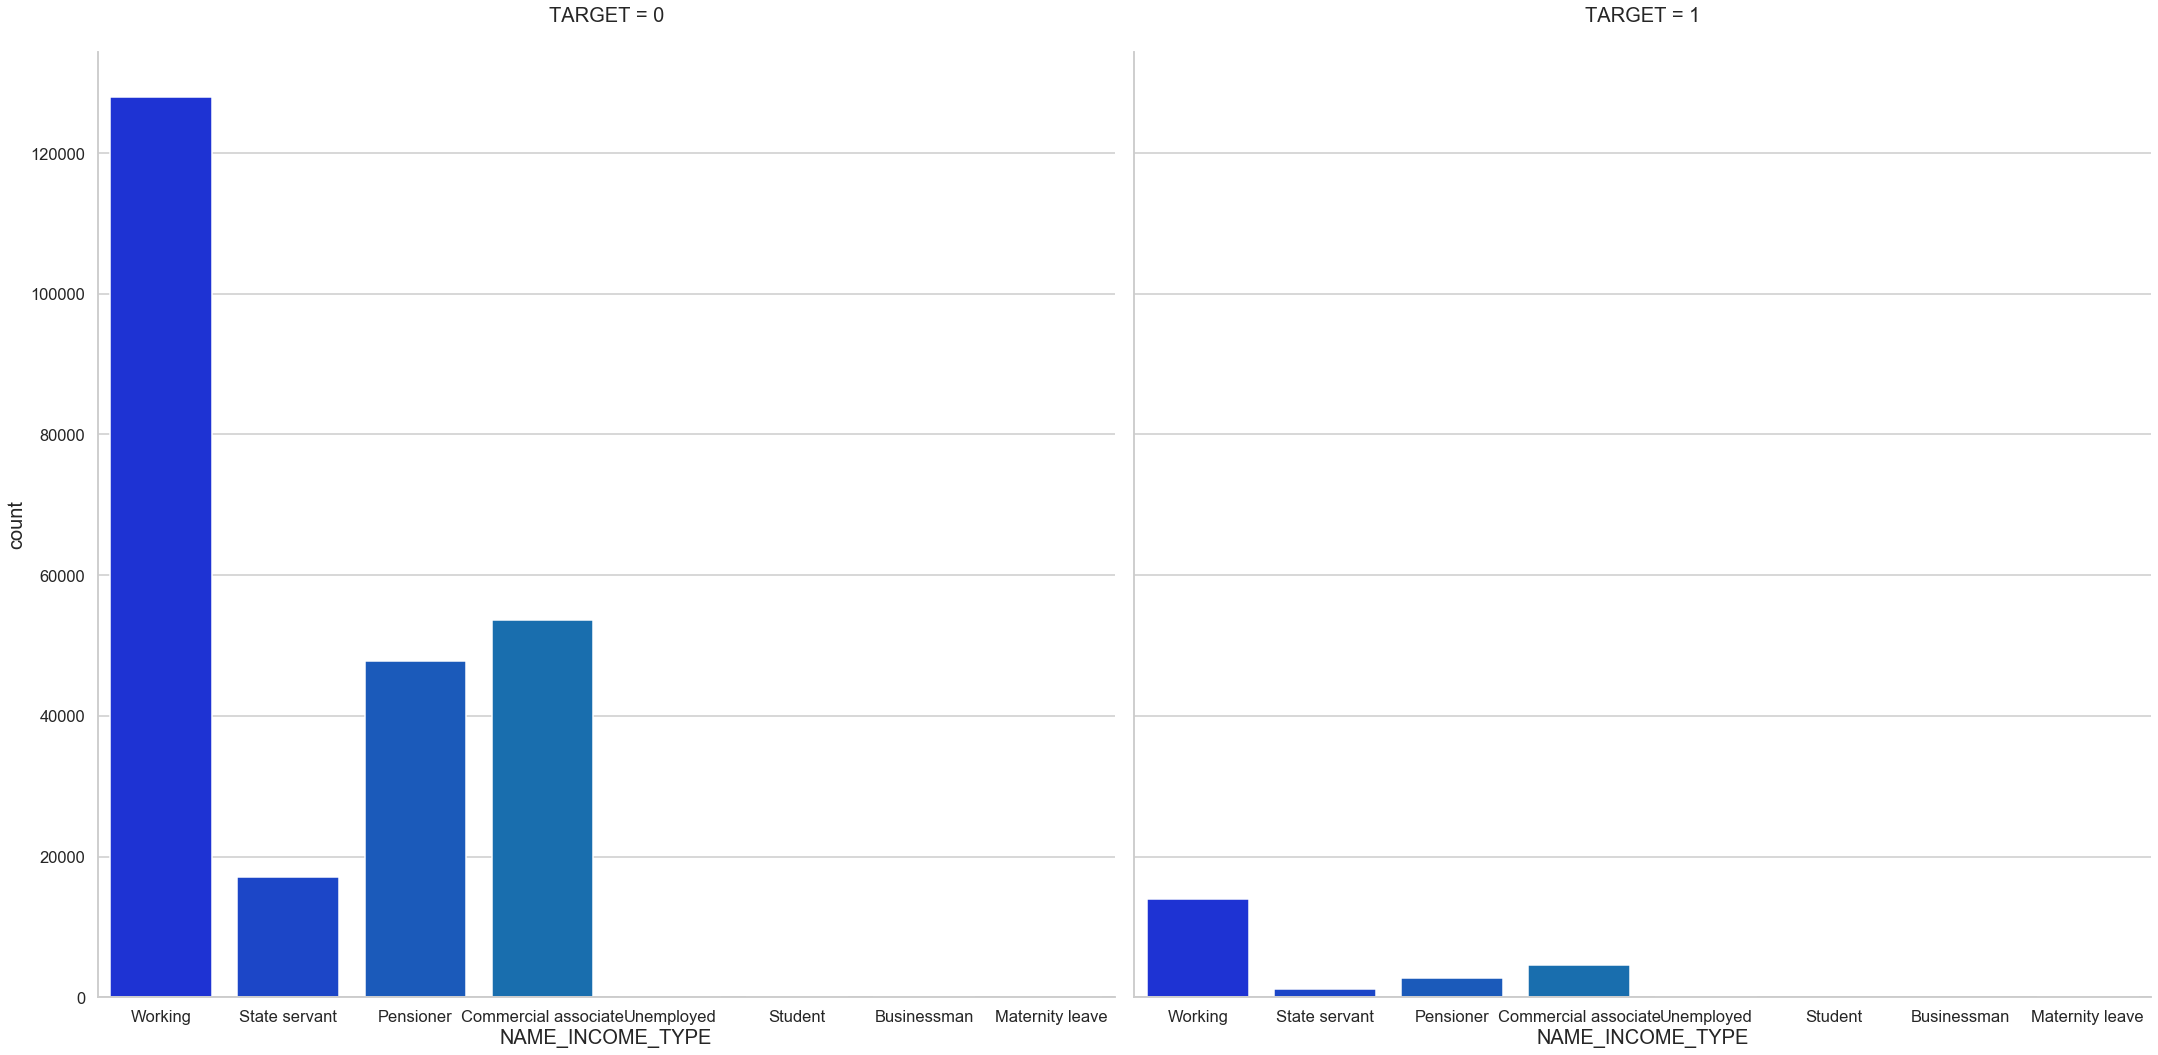

<Figure size 1440x360 with 0 Axes>

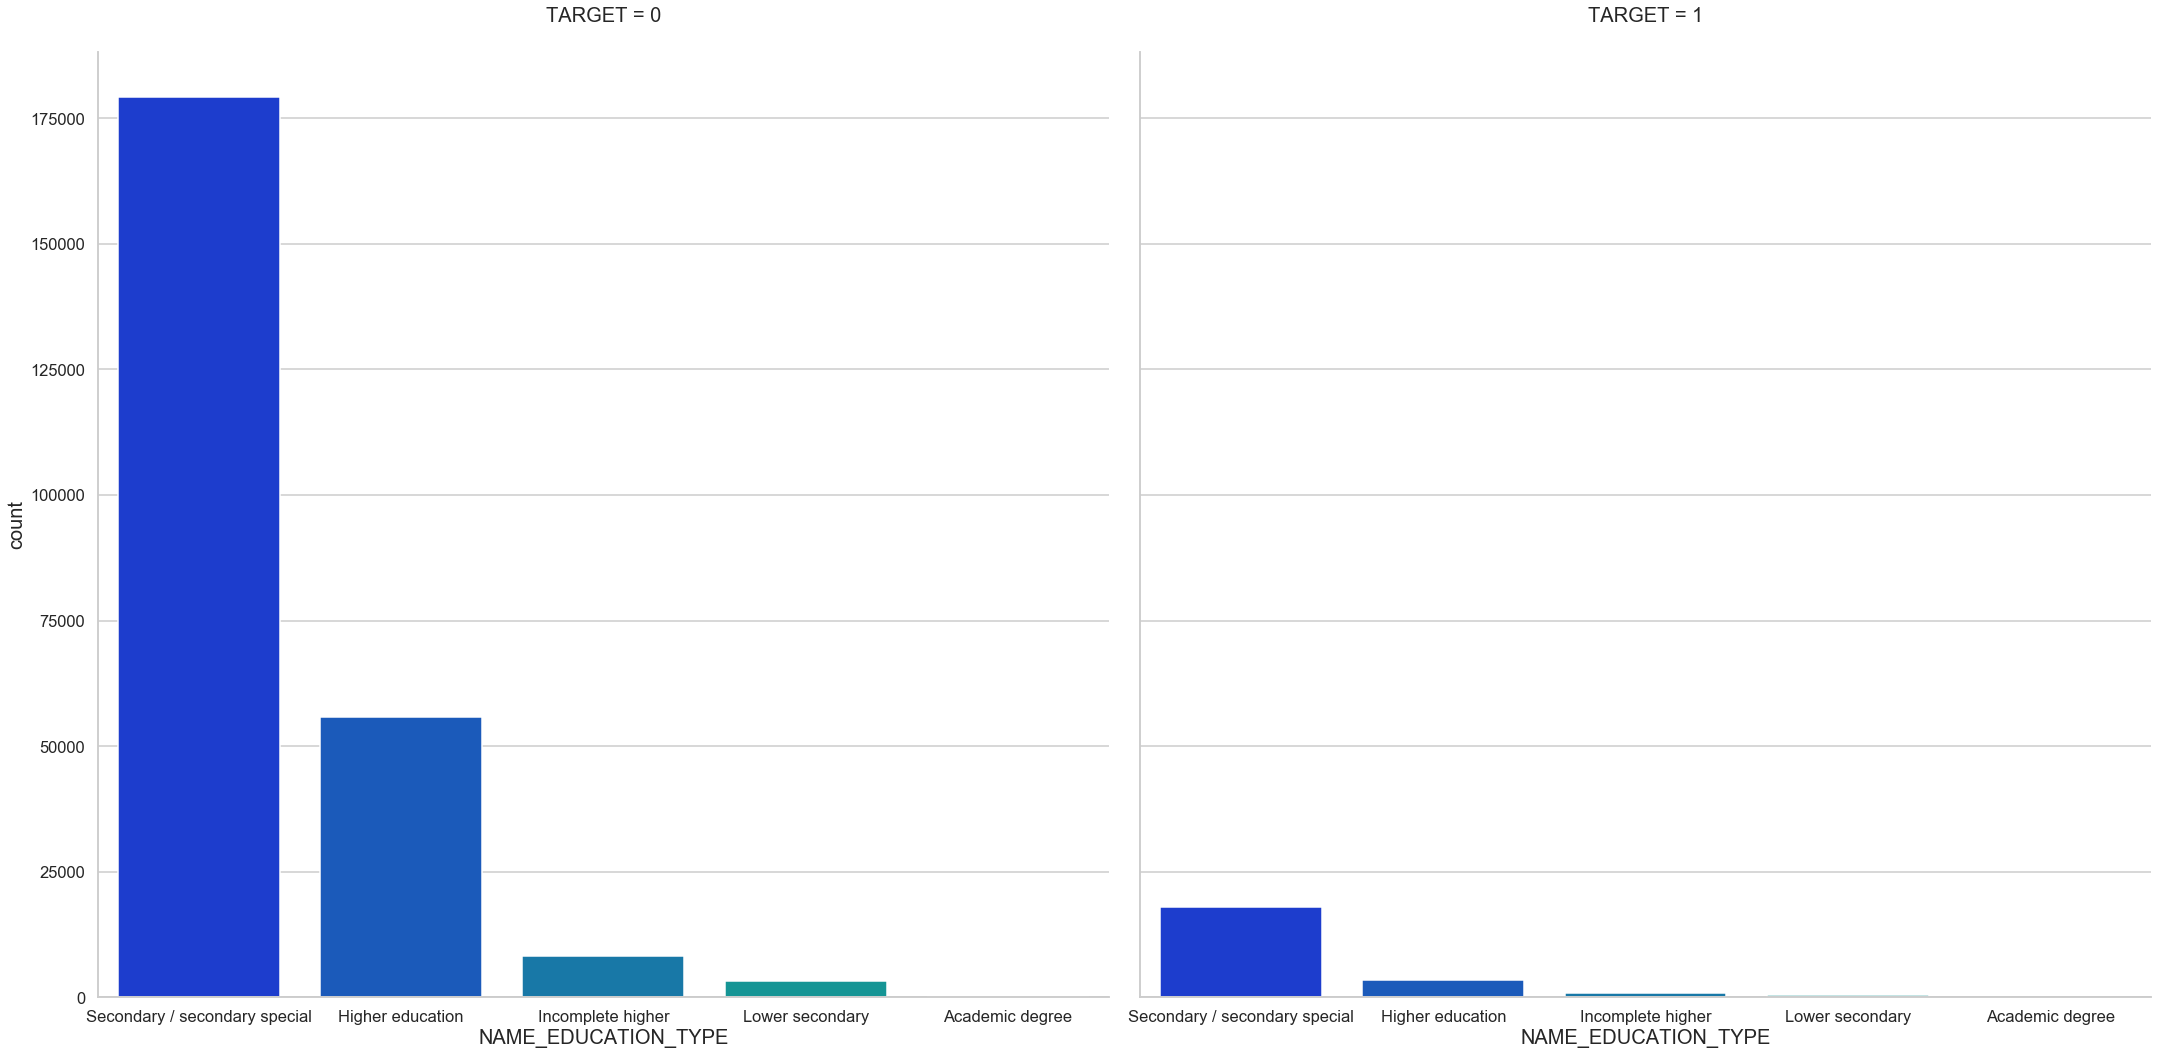

<Figure size 1440x360 with 0 Axes>

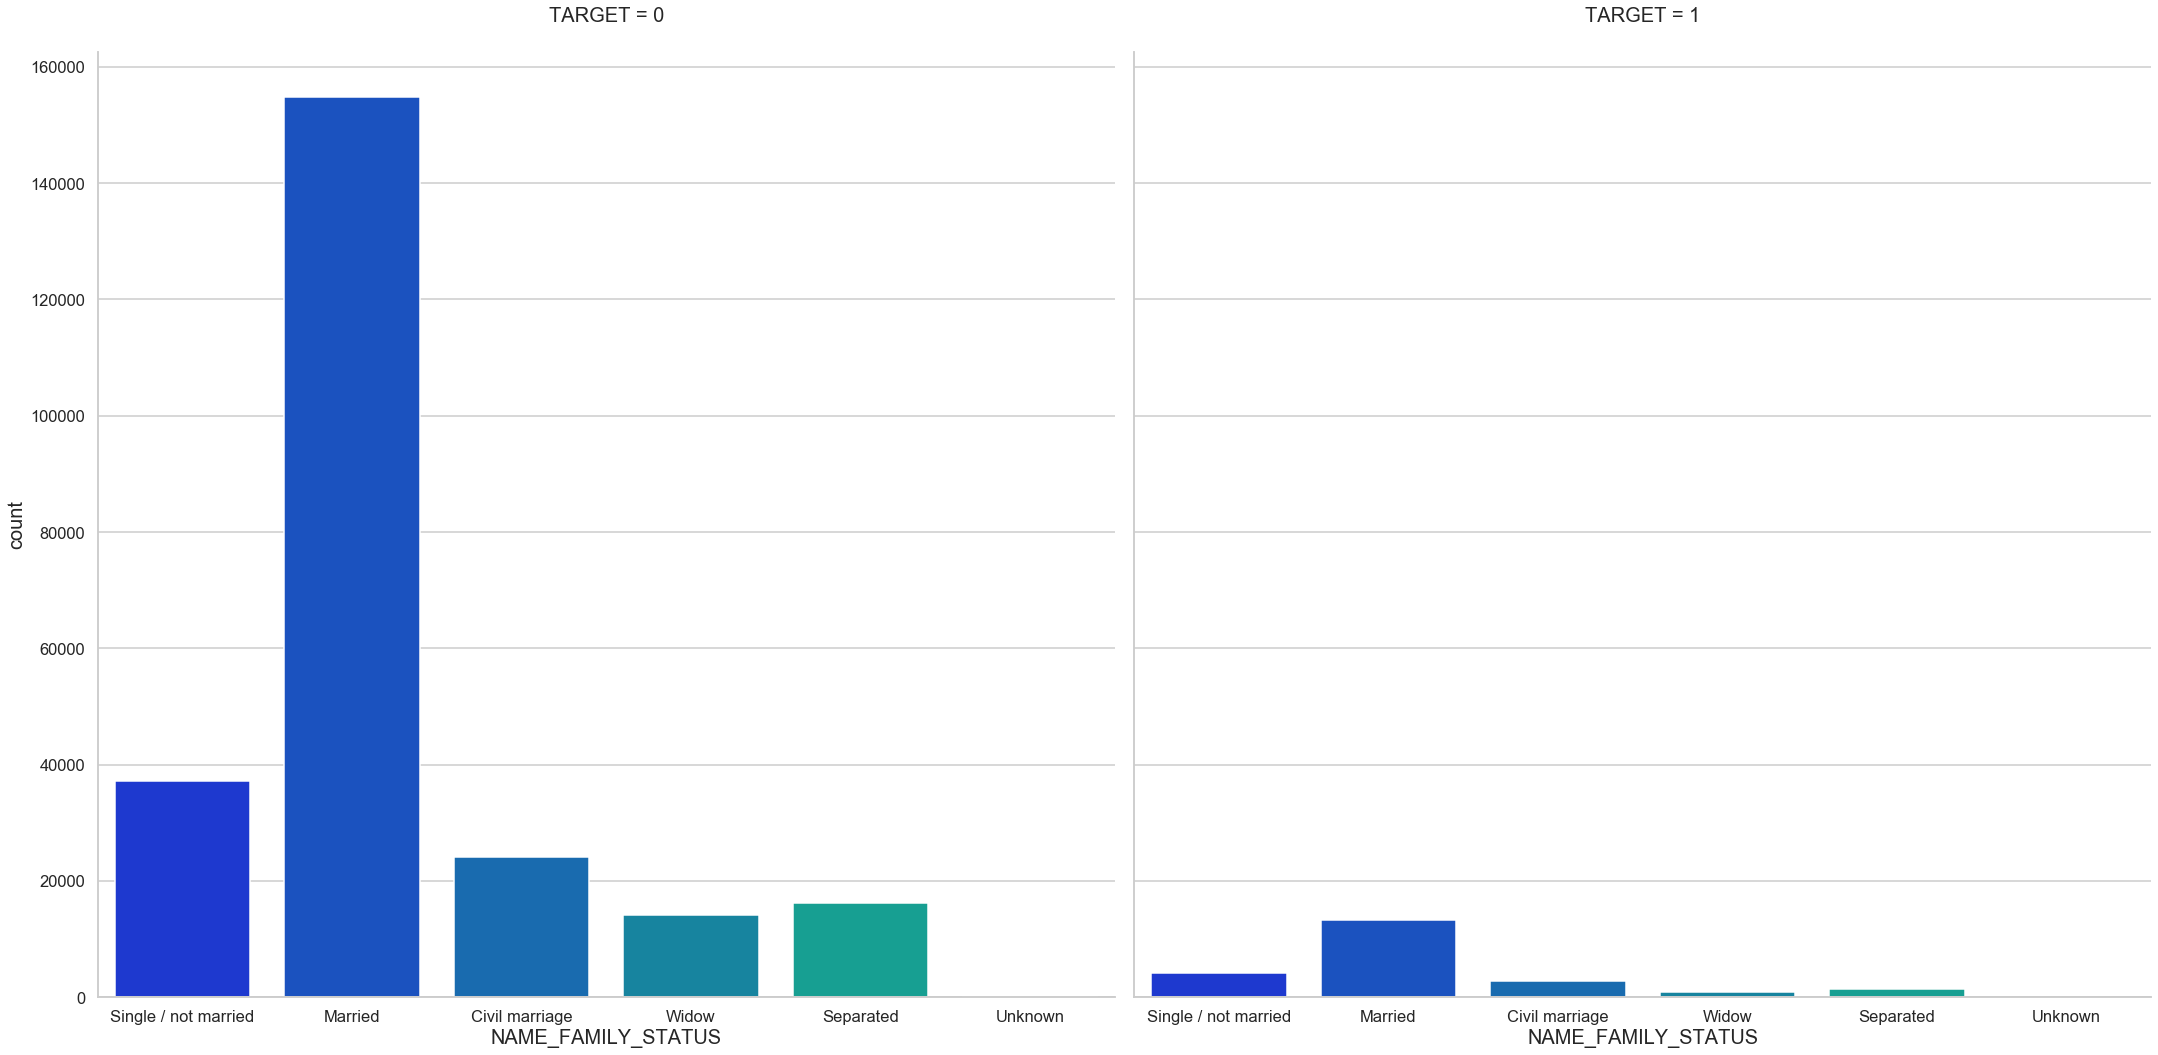

<Figure size 1440x360 with 0 Axes>

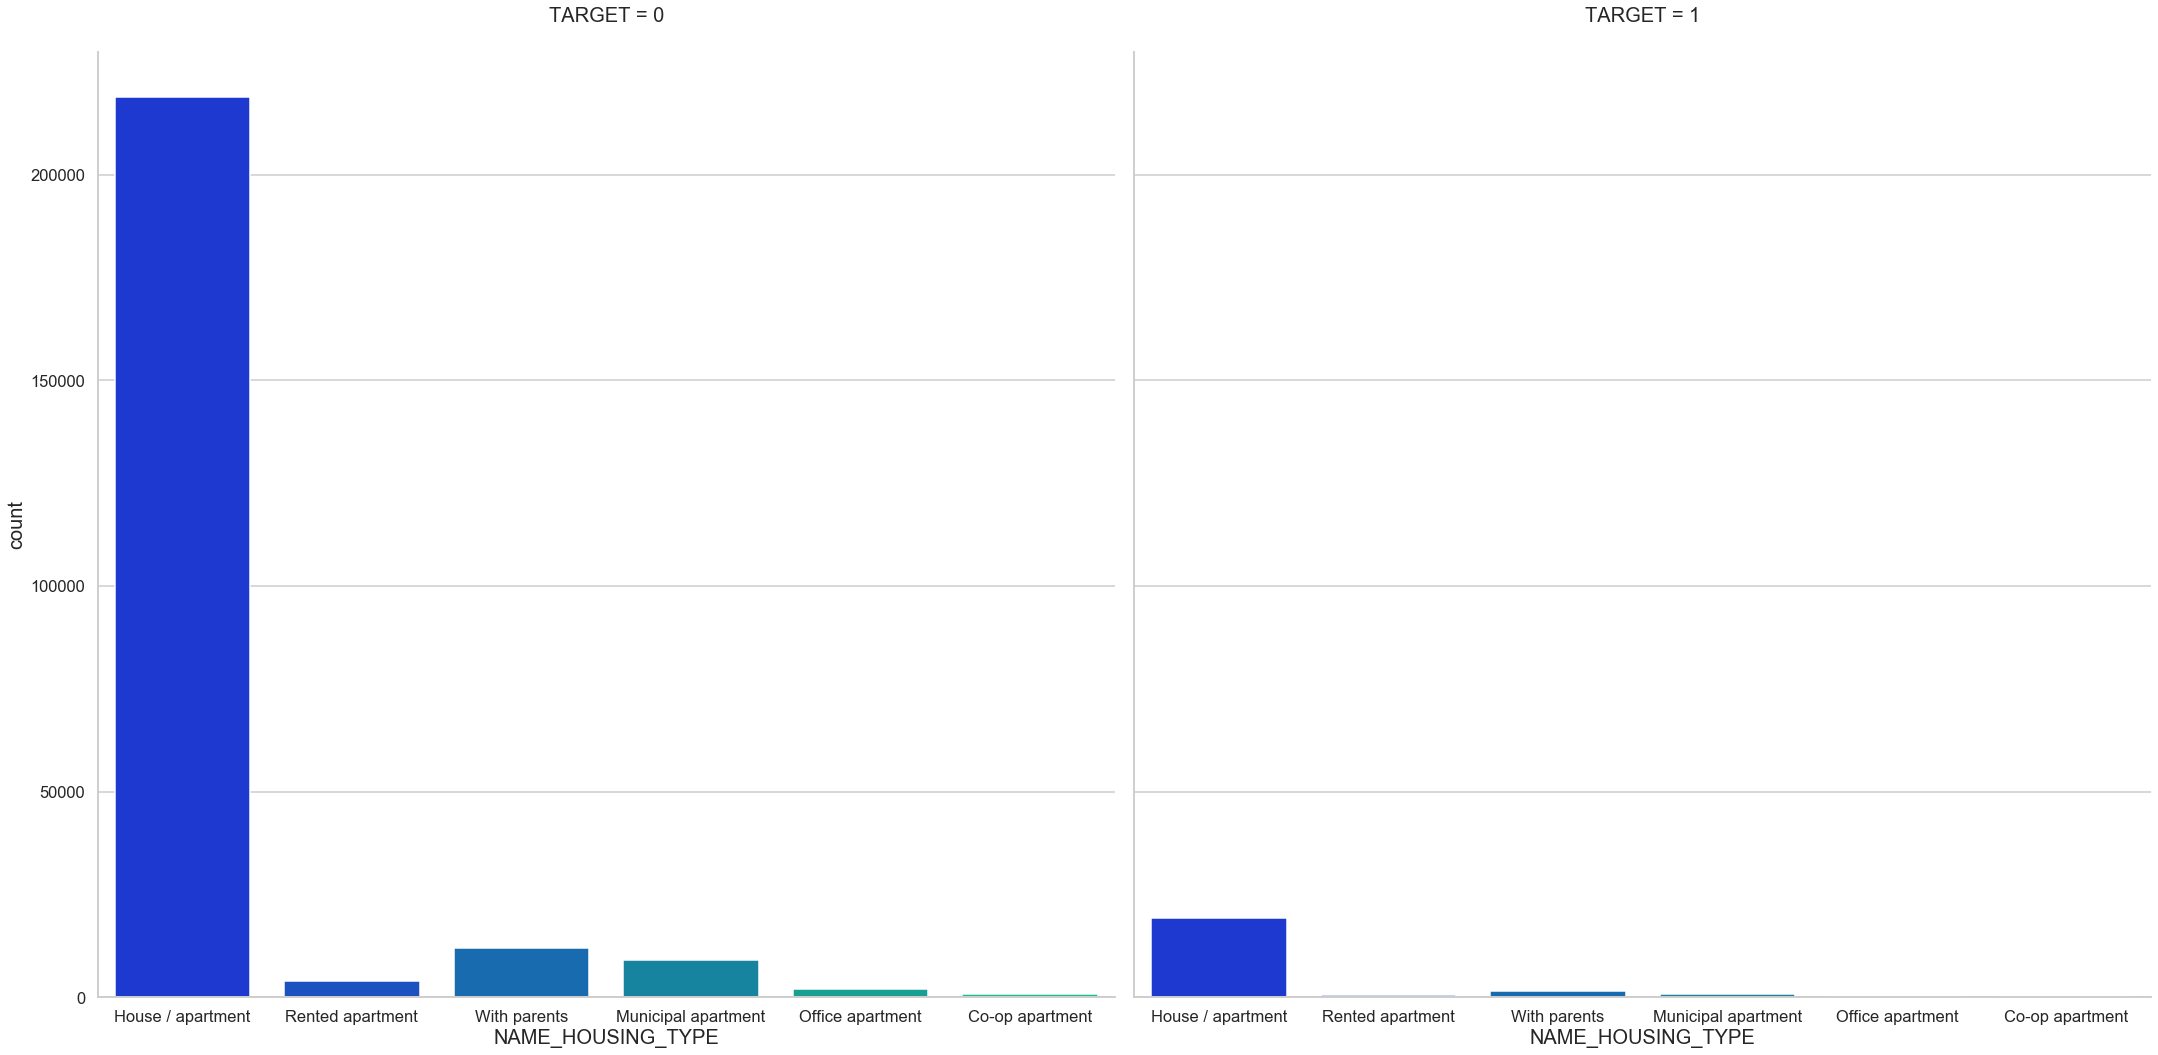

In [62]:
# Segmented Univariate Analysis - Application Clean
# Analyze impact of target on other categorical variables.

segnonnumcols = ["NAME_CONTRACT_TYPE", "CODE_GENDER",
 "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_TYPE_SUITE", "NAME_INCOME_TYPE",
 "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]

# Running in loop to plot all columns
for column in segnonnumcols:
    plt.figure(5,figsize=(20,5))
    sns.catplot(x=column, col= 'TARGET',
                data=application_clean, kind="count", height = 15, aspect = 1, palette='winter')
    plt.show()

### 5. **Bivariate Analysis on `Application Clean`**

<Figure size 1440x360 with 0 Axes>

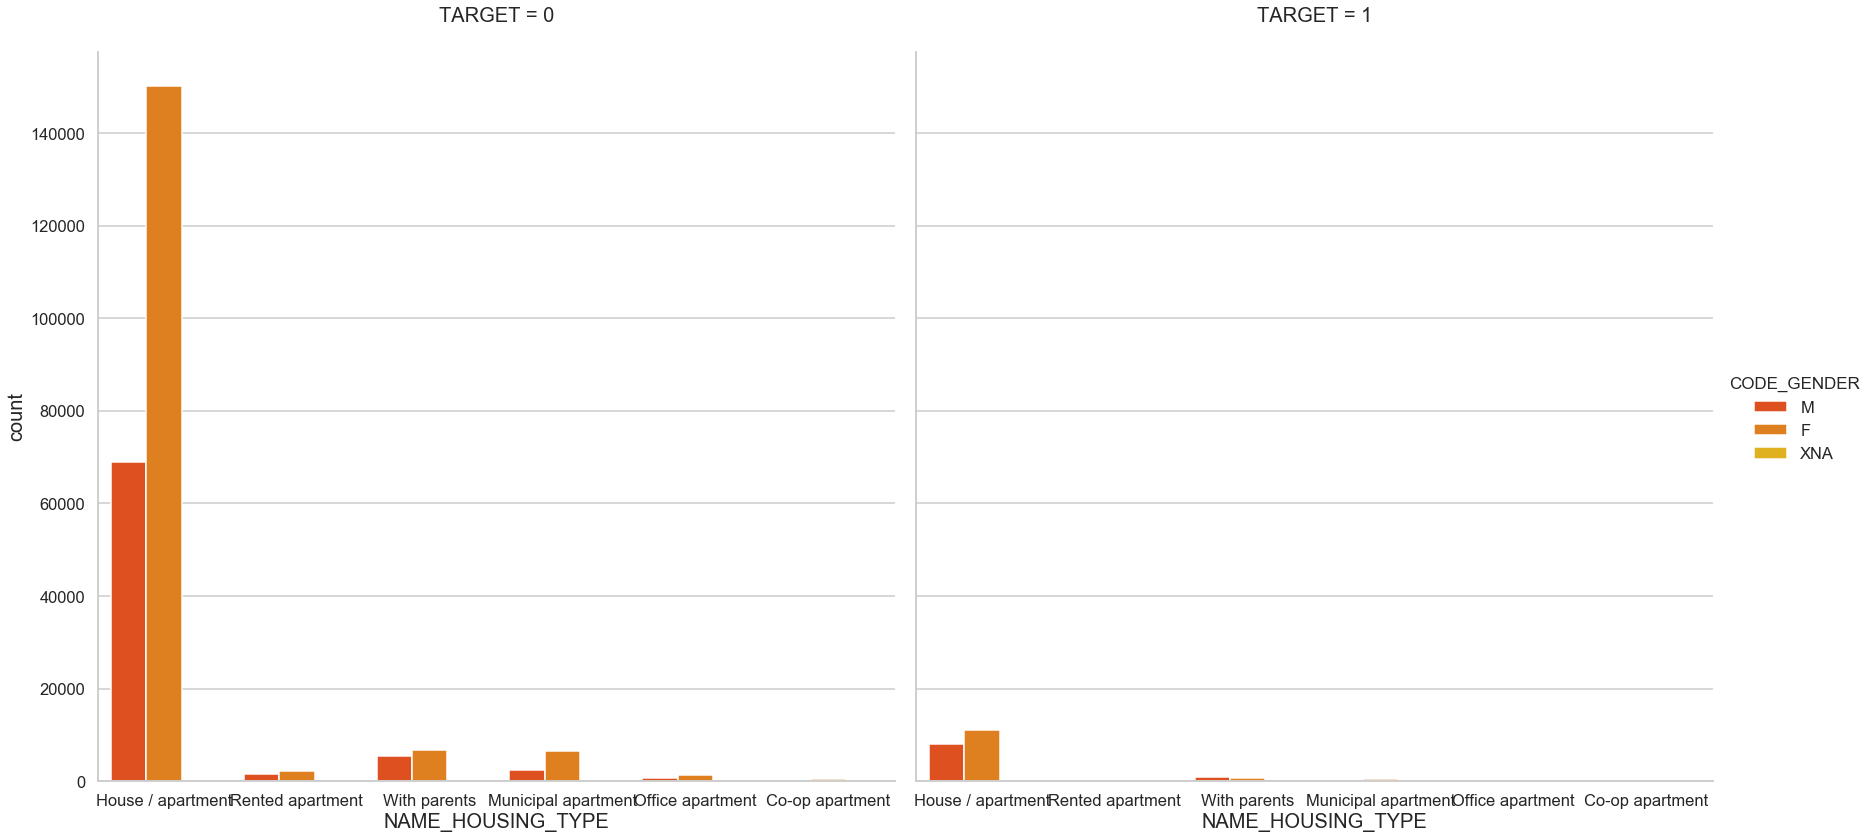

In [74]:

# Analyze impact of Gender and Housing Type on "Target" variable

plt.figure(6,figsize=(20,5))

column = "NAME_HOUSING_TYPE"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=application_clean, kind="count", height = 12, aspect = 1, palette = 'autumn')
# plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.show()

<Figure size 1440x360 with 0 Axes>

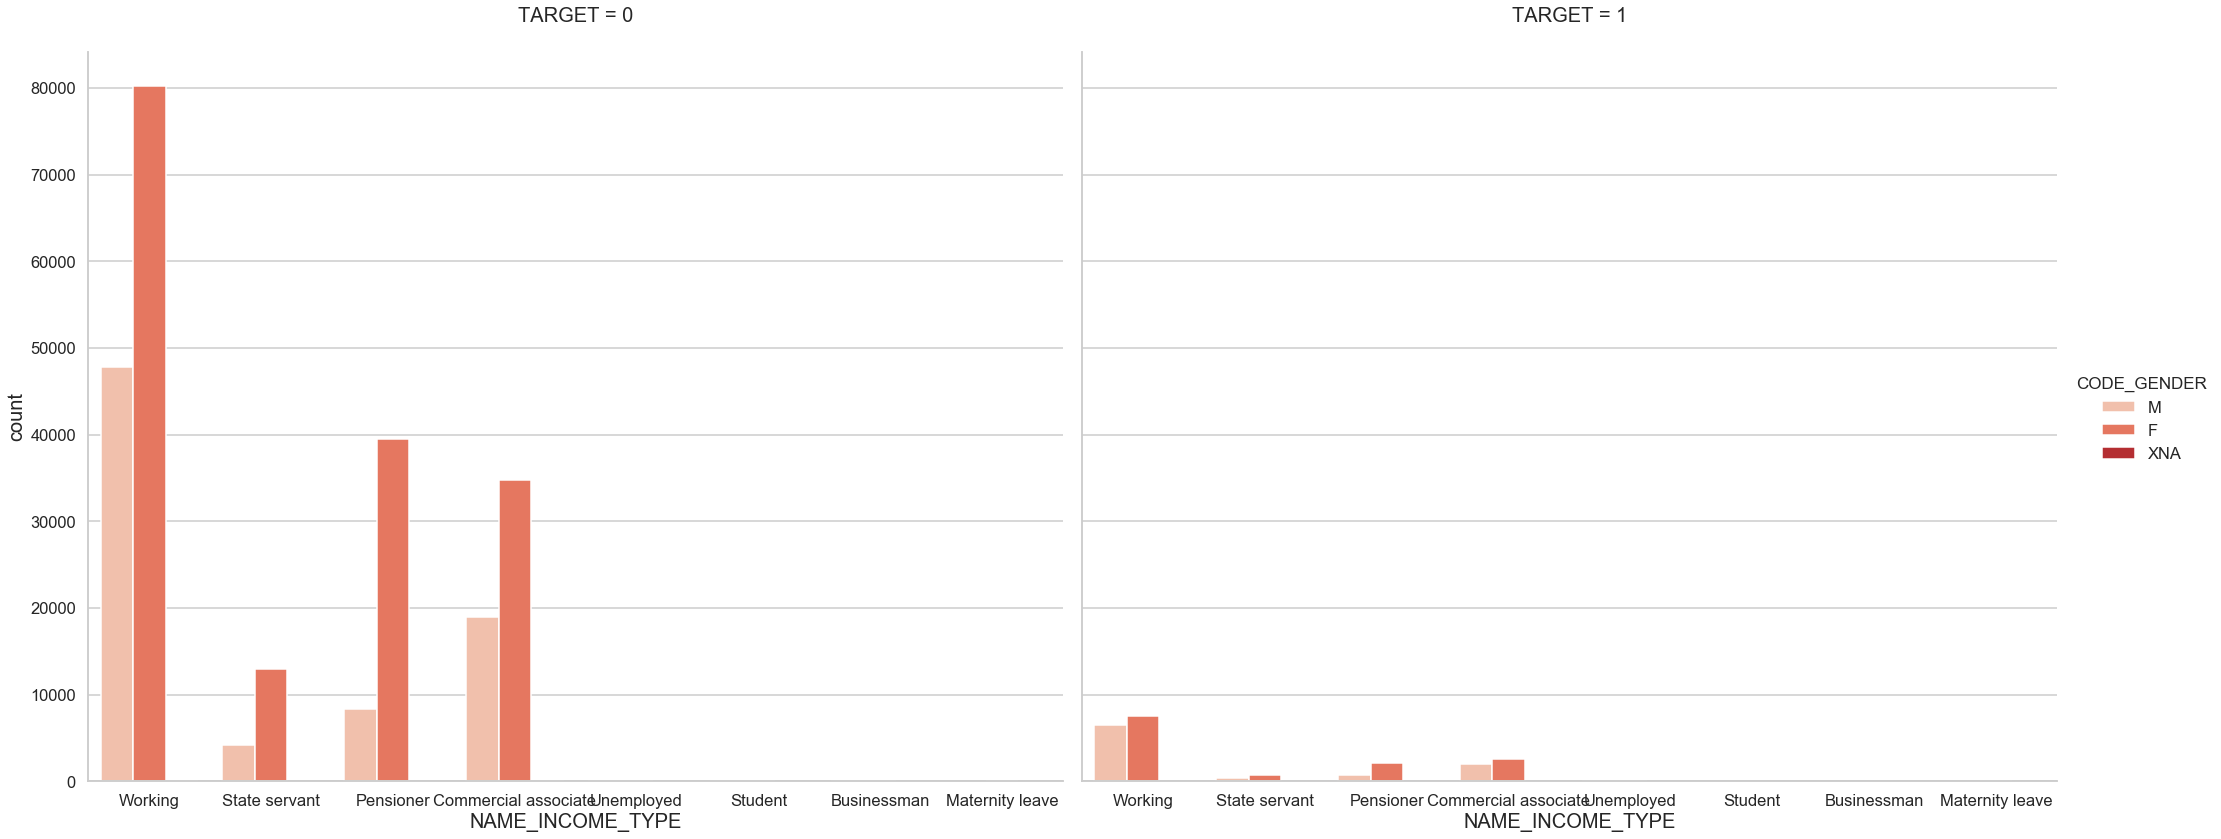

In [75]:
# Analyze impact of Gender and Income Type on "Target" variable

plt.figure(6,figsize=(20,5))

column = "NAME_INCOME_TYPE"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=application_clean, kind="count", height = 12, aspect = 1.2, palette ='Reds')
# plt.legend(loc="best")
plt.xticks(rotation=0)
plt.show()

<Figure size 1440x360 with 0 Axes>

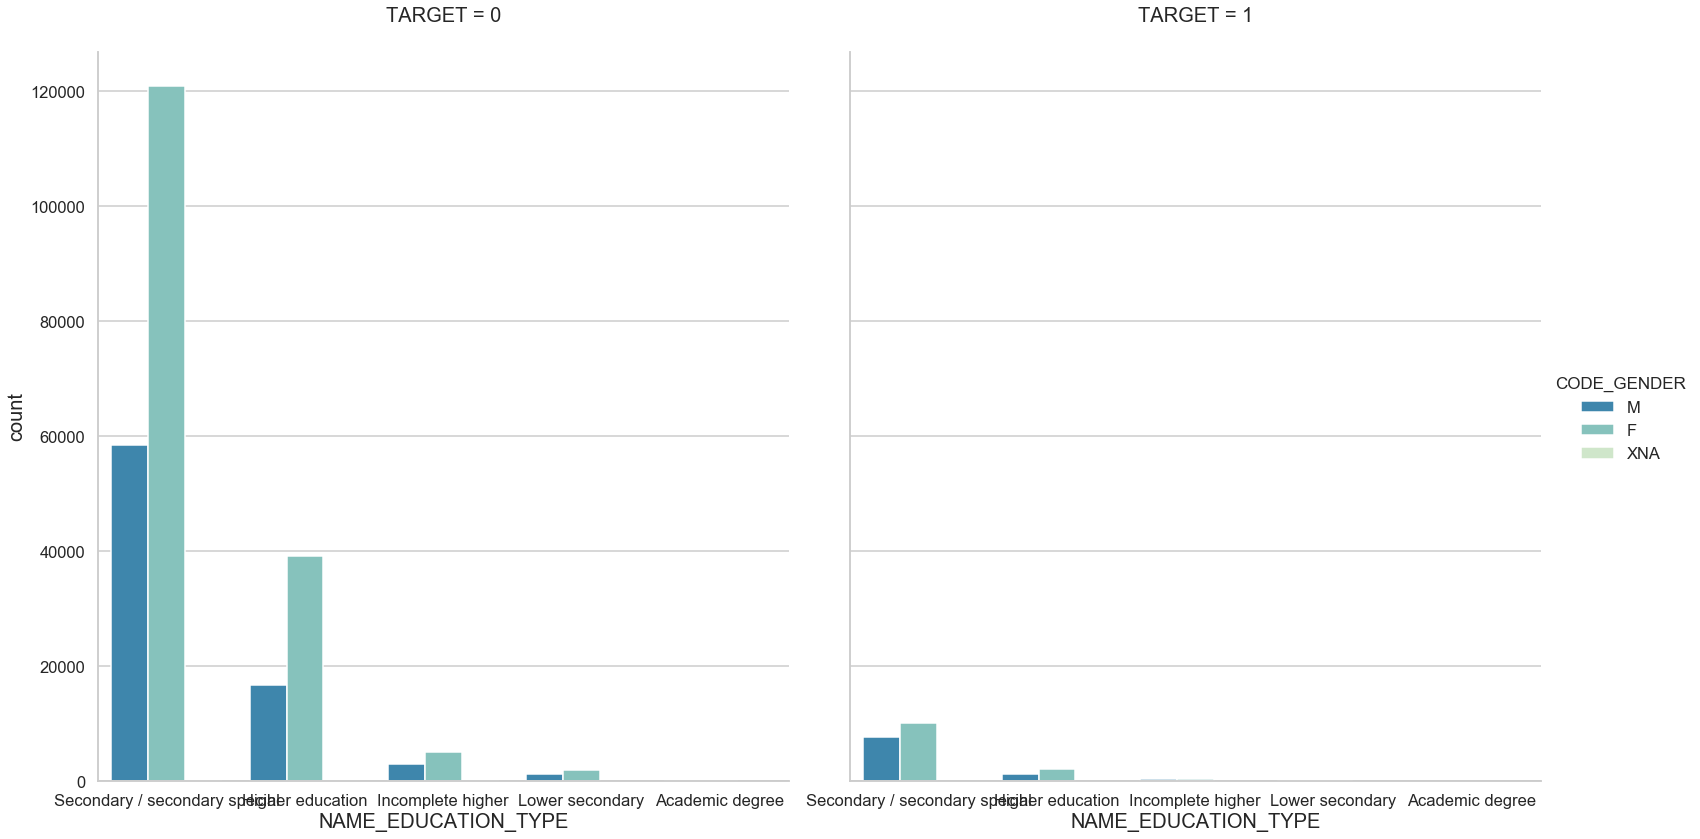

In [76]:
# Analyze impact of Gender and Education Type on "Target" variable

plt.figure(6,figsize=(20,5))

column = "NAME_EDUCATION_TYPE"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=application_clean, kind="count", height = 12, aspect = 0.9, palette = 'GnBu_r')
# plt.legend(loc="best")
plt.xticks(rotation=0)
plt.show()

<Figure size 1440x360 with 0 Axes>

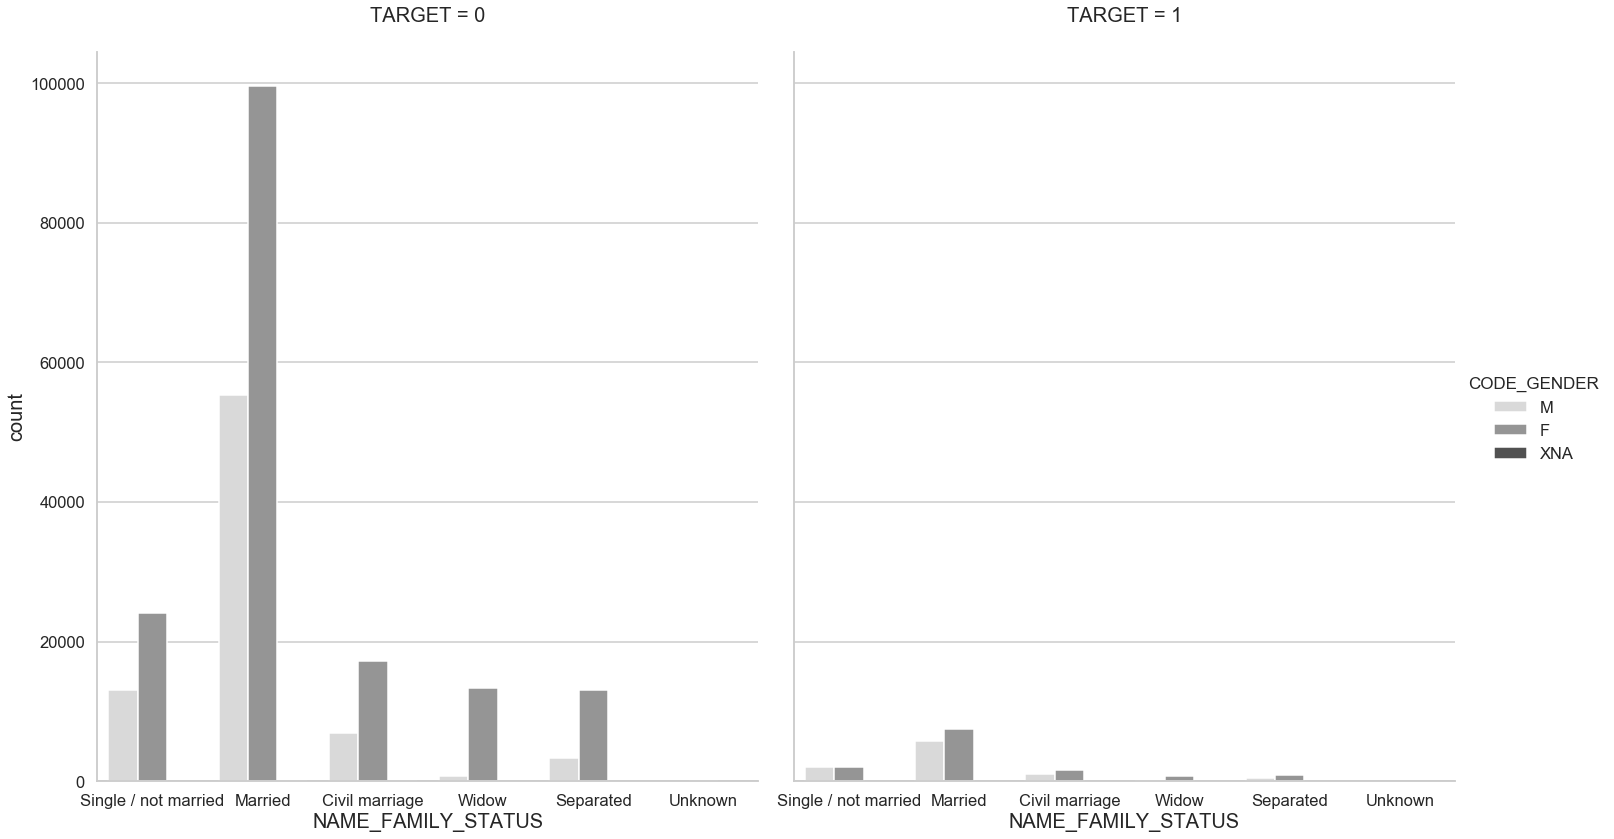

In [77]:
# Analyze impact of Gender and Family Status on "Target" variable

plt.figure(6,figsize=(20,5))

column = "NAME_FAMILY_STATUS"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=application_clean, kind="count", height = 12, aspect = 0.85, palette = 'Greys')
# plt.legend(loc="best")
plt.xticks(rotation=0)
plt.show()

<Figure size 1440x360 with 0 Axes>

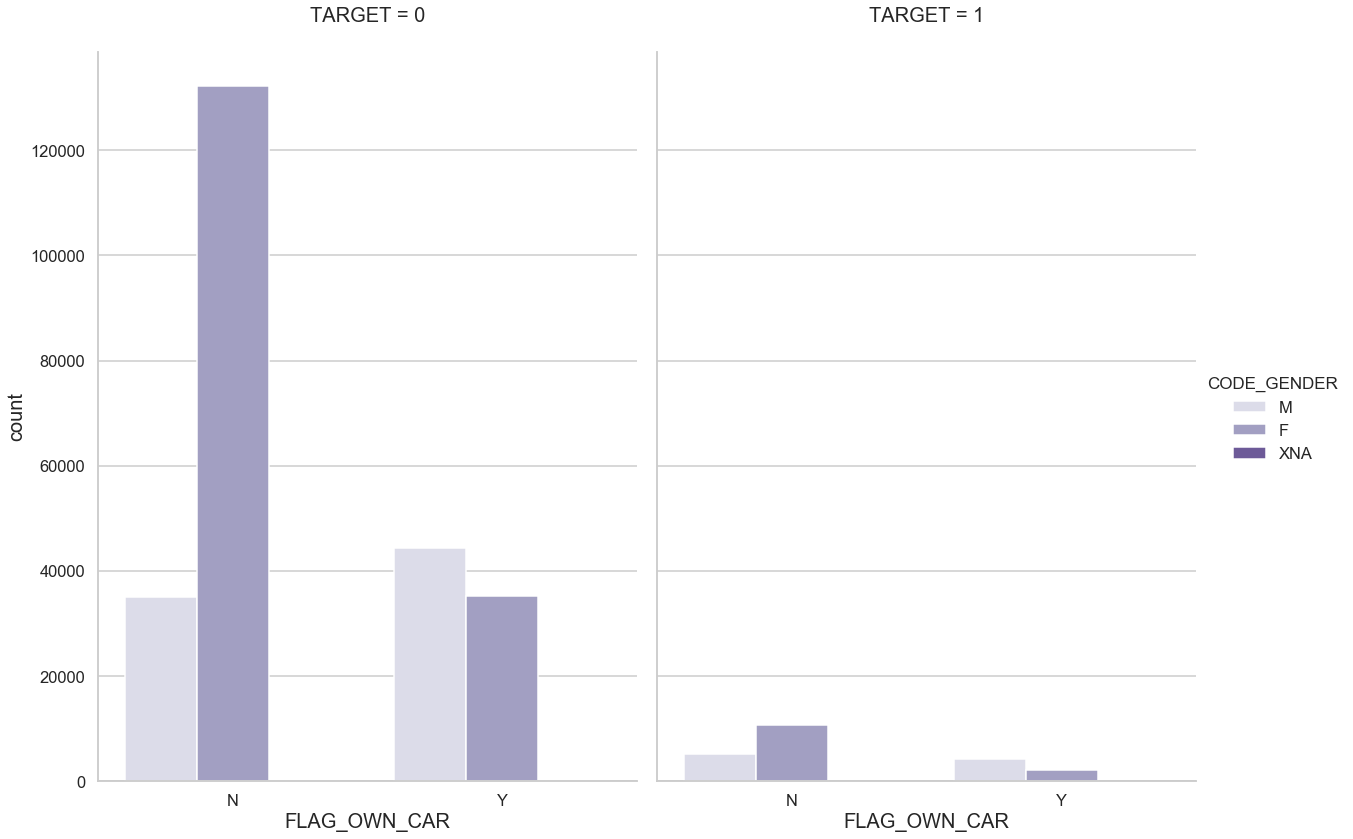

In [79]:

# Analyze impact of Gender and Own Car on "Target" variable

plt.figure(6,figsize=(20,5))

column = "FLAG_OWN_CAR"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=application_clean, kind="count", height = 12, aspect = 0.7, palette = 'Purples')
# plt.legend(loc="best")
plt.xticks(rotation=0)
plt.show()

<Figure size 1440x360 with 0 Axes>

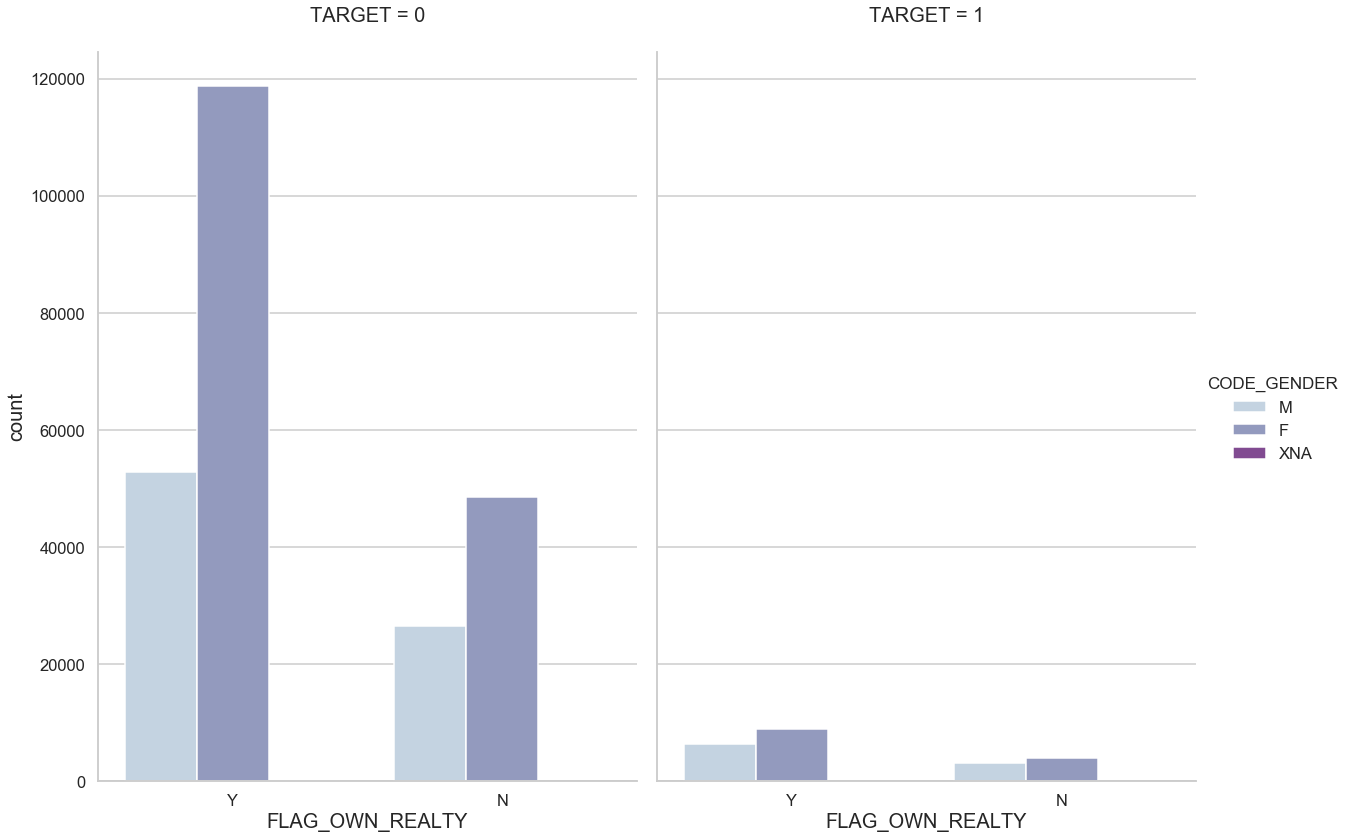

In [80]:

# Analyze impact of Gender and Own Realty on "Target" variable

plt.figure(6,figsize=(20,5))

column = "FLAG_OWN_REALTY"
h = "CODE_GENDER"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=application_clean, kind="count", height = 12, aspect = 0.7, palette = 'BuPu')
# plt.legend(loc="upper right")
plt.xticks(rotation=0)
plt.show()

<Figure size 1440x360 with 0 Axes>

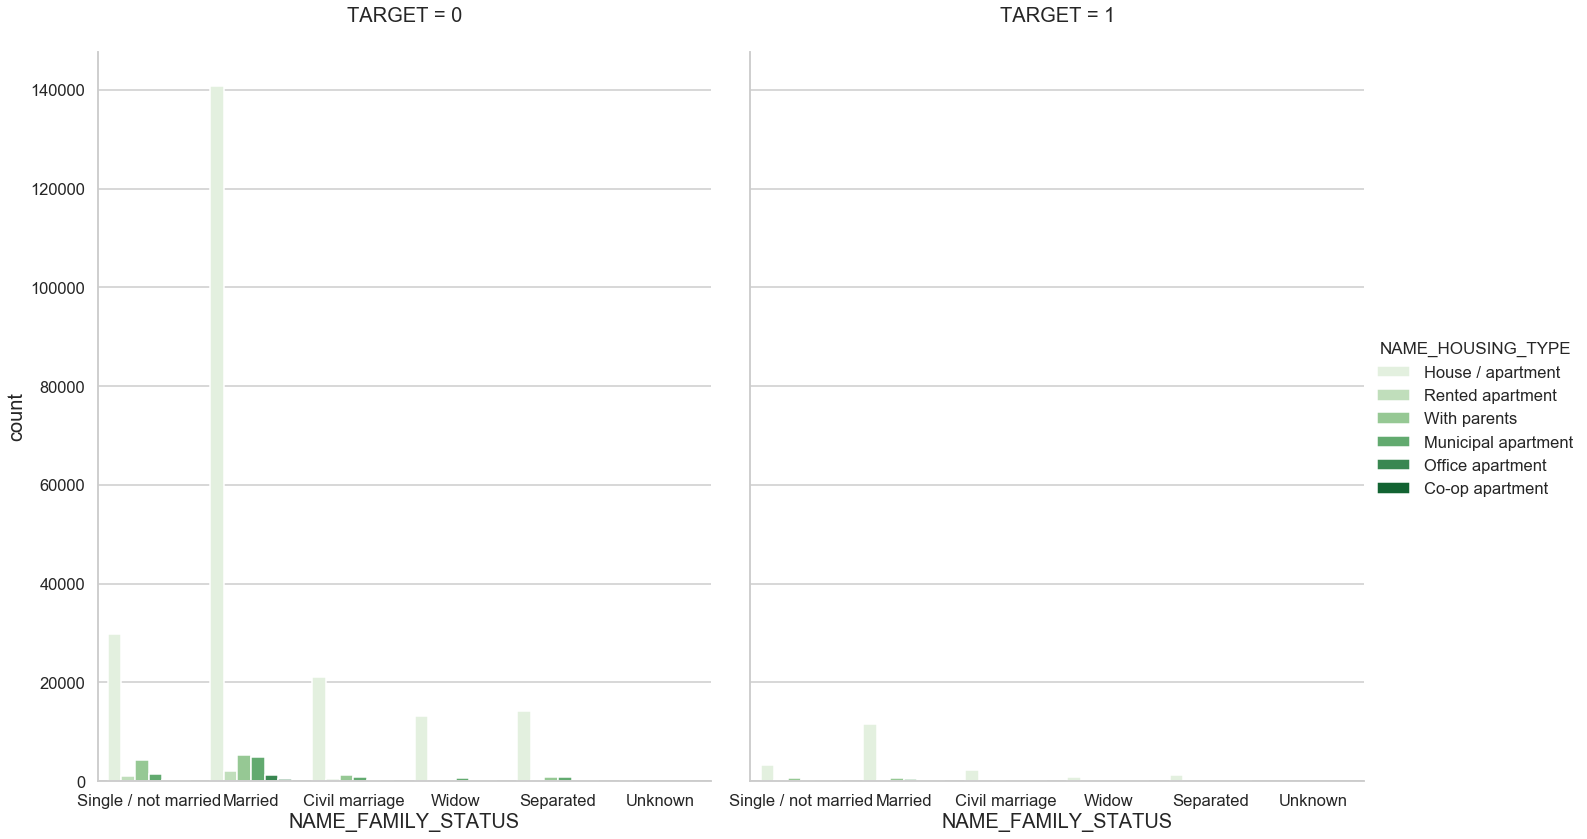

In [81]:
# Analyze impact of Family Status and Housing Type on "Target" variable

plt.figure(6,figsize=(20,5))

column = "NAME_FAMILY_STATUS"
h = "NAME_HOUSING_TYPE"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=application_clean, kind="count", height = 12, aspect = 0.8, palette ='Greens')

plt.xticks(rotation=0)
# plt.legend(loc="upper right")
plt.show()

<Figure size 1440x360 with 0 Axes>

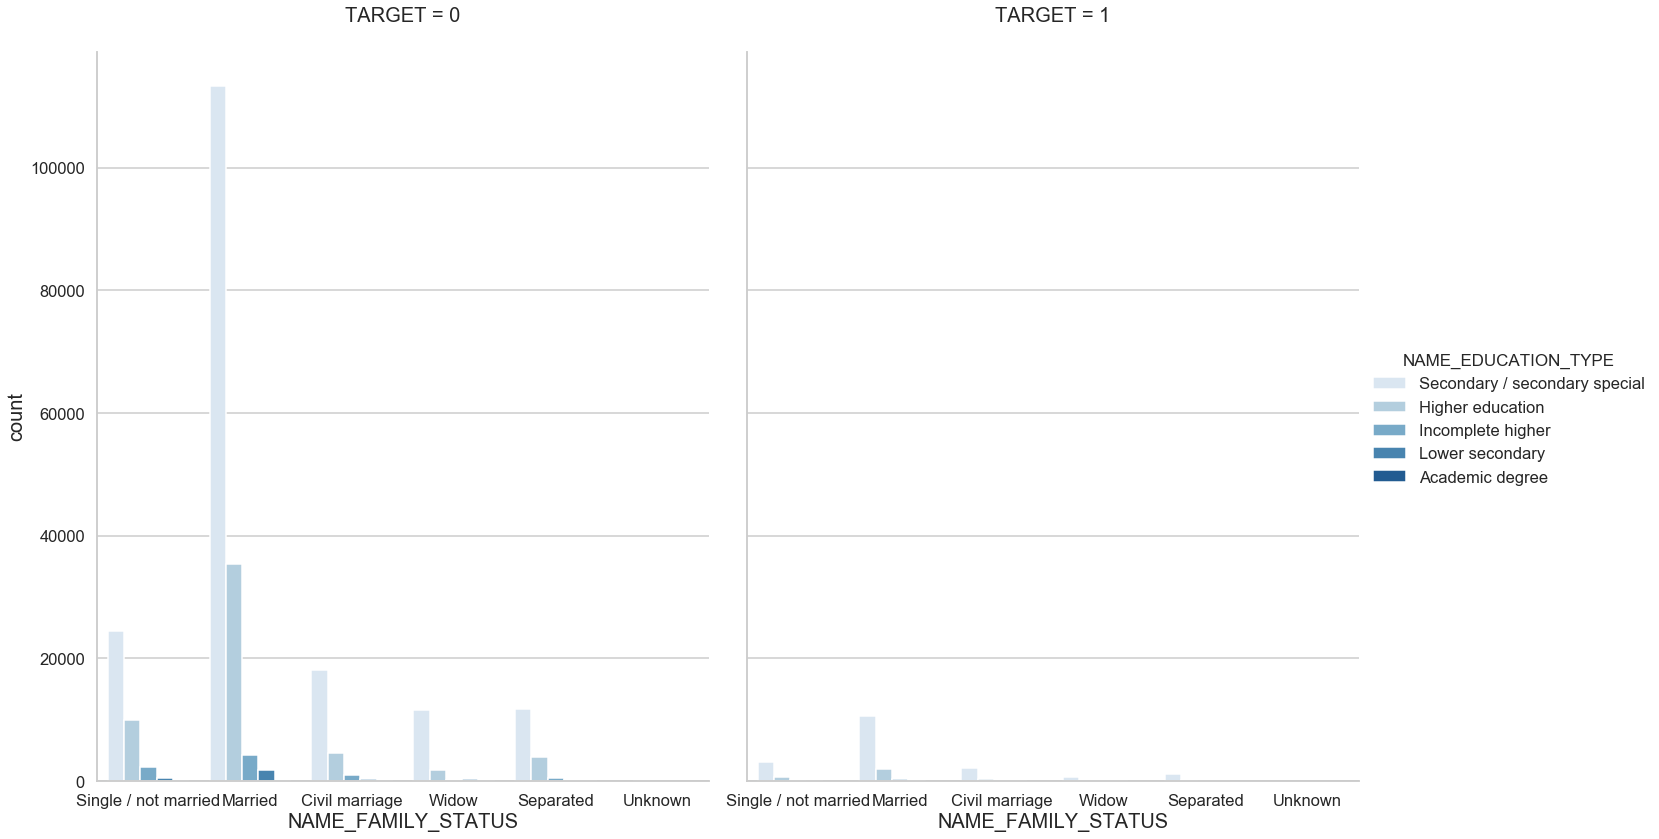

In [82]:
# Analyze impact of Family Status and Education Type on "Target" variable

plt.figure(6,figsize=(20,5))

column = "NAME_FAMILY_STATUS"
h = "NAME_EDUCATION_TYPE"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=application_clean, kind="count", height = 12, aspect = 0.8, palette = 'Blues')

plt.xticks(rotation=0)
# plt.legend(loc="upper right")
plt.show()

<Figure size 1440x360 with 0 Axes>

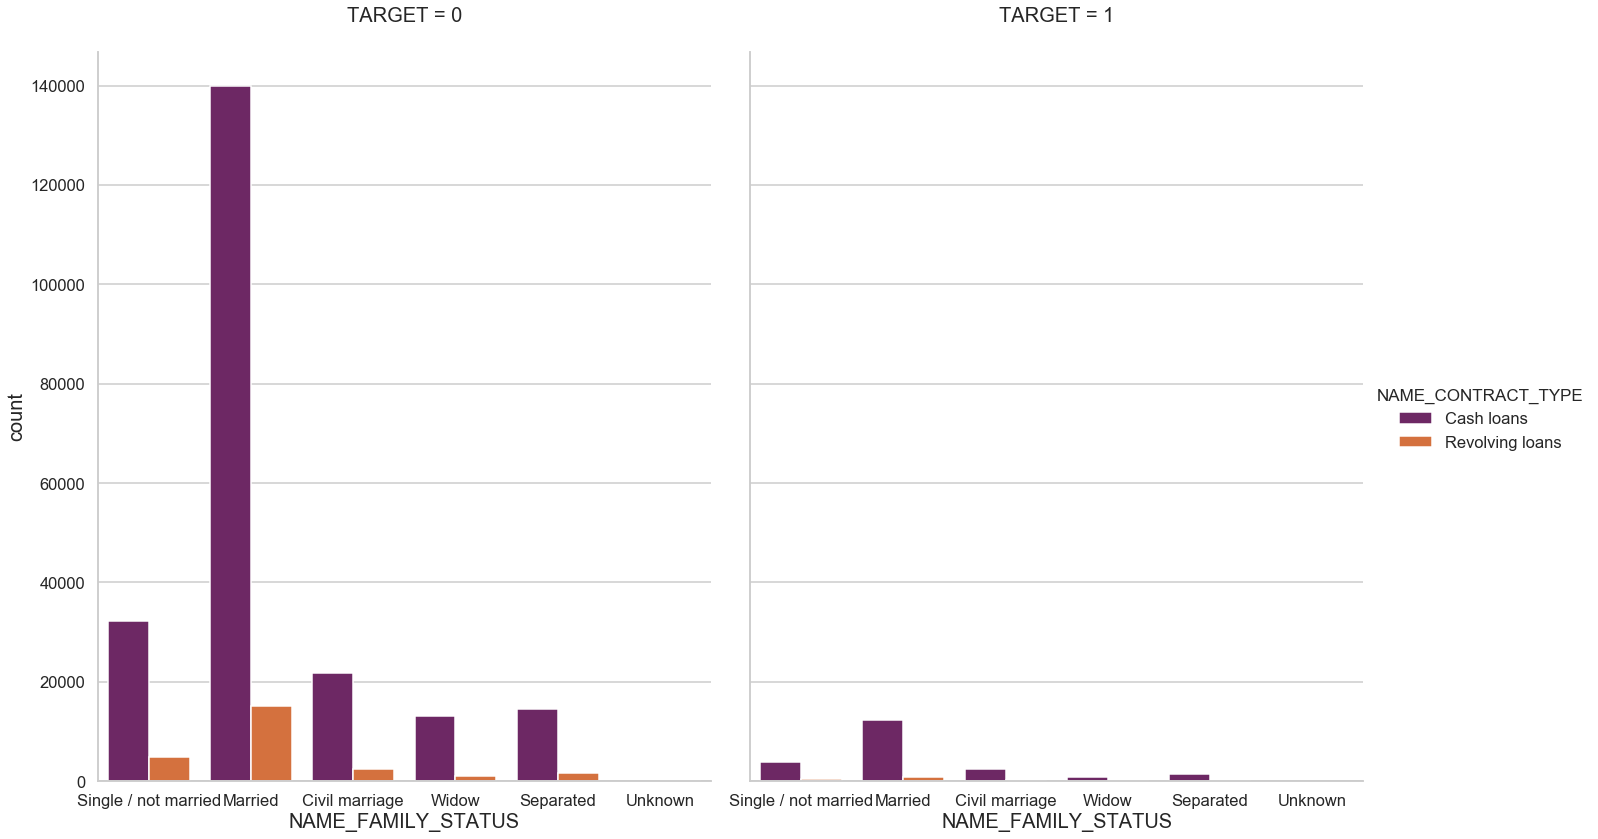

In [83]:

# Analyze impact of Family Status and Contract Type on "Target" variable

plt.figure(6,figsize=(20,5))

column = "NAME_FAMILY_STATUS"
h = "NAME_CONTRACT_TYPE"
z = 'TARGET'
sns.catplot(x=column, hue= h, col= z,
                data=application_clean, kind="count", height = 12, aspect = 0.8, palette = 'inferno')

plt.xticks(rotation=0)
# plt.legend(loc="upper right")
plt.show() 

# 6. **Loading `Previous Applciation Data`**

**`previous_application`** - contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer. </font>

In [84]:
# Reading the previous_application.csv data into previous_data dataframe.
previous_data = pd.read_csv("previous_application.csv")

# 7. **Checking the structure of `previous_data` dataframe**

In [85]:
# Checking shape
previous_data.shape

(1670214, 37)

In [86]:
# Checking the datatypes
previous_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [87]:
# Quick Review to the stats matrics of previous_data
previous_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

# 8. **Data Quality Check & Missing Values in `previous_data`**
1. Analyze existing dataframes for missing values in columns
2. Analyze existing dataframes for missing values in rows 
3. Removing the columns which has more than **`90%`** missing values
4. Filter data - Remove columns which do not add any anlytical value 
5. Removing Deduplicate rows.

### 8.1 **Analyzing the missing values**

In [88]:
# Analyze columns for missing values in previous_data
previous_nullcols = round(100*(previous_data.isnull().sum()/len(previous_data.index)),2).sort_values(ascending=False)
previous_nullcols

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

**As we just have to do EDA we are not going to remove the missing values from previous_data.**

### 8.2 **Removing Columns which has missing values above 90%**

In [89]:
# Create new DF by removing columns where more than 90% of null values from previous_data

# Create a list of columns to be deleted (Logic null% > 90)
previous_coltodelete = list(previous_nullcols[previous_nullcols.values>90].index)

# Create new DF by removing the columns using application_coltodelete from application dataframe
previous_clean = previous_data.drop(previous_coltodelete, axis=1)

# Size of new dataframe
previous_clean.shape

(1670214, 35)

### 8.3 **Checking duplicates**

In [90]:
# Drop duplicate data from previous_clean, if any
previous_clean.drop_duplicates(subset=None, inplace=True)
previous_clean.shape

(1670214, 35)

### 8.4 **Standarizing the Datatypes and Values**
1. Analyzing the Datatypes.
2. Analyzing the Values.
3. Standarizing the values of columns, say -ve days and date columns.
4. Standarizing the Datatypes.

In [91]:
# Here we are going to analyis and observe every column, datatype and their unique values.
# The purpose of this task is to analyis various types of variables like Numerical, Catagorial Variables, Univariate and Multivariate variables,
# Continous and Descriate etc.

# To achive above task I'm creating below for loop to walk through all the columns and print their datatype, unique values 
# and count of unique values. 

for col in previous_clean.columns:
    uniq_val = previous_clean[col].unique()
    col_dtype = previous_clean[col].dtypes
    print('Column Name\t\t:{}\nDatatype\t\t:{}\nUnique Values Count\t:{}\nUnique Values\t\t:{}'.format(col,col_dtype,len(uniq_val),uniq_val))
    print('='*100)

Column Name		:SK_ID_PREV
Datatype		:int64
Unique Values Count	:1670214
Unique Values		:[2030495 2802425 2523466 ... 2659632 2785582 2418762]
Column Name		:SK_ID_CURR
Datatype		:int64
Unique Values Count	:338857
Unique Values		:[271877 108129 122040 ... 253940 353284 191629]
Column Name		:NAME_CONTRACT_TYPE
Datatype		:object
Unique Values Count	:4
Unique Values		:['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
Column Name		:AMT_ANNUITY
Datatype		:float64
Unique Values Count	:357960
Unique Values		:[ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
Column Name		:AMT_APPLICATION
Datatype		:float64
Unique Values Count	:93885
Unique Values		:[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
Column Name		:AMT_CREDIT
Datatype		:float64
Unique Values Count	:86804
Unique Values		:[ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
Column Name		:AMT_DOWN_PAYMENT
Datatype		:float64
Unique Values Count	:29279
Unique Values		:[    0.        nan 1

In [92]:
# Converting -ve days to +ve days.

previous_clean[['DAYS_FIRST_DRAWING',
                   'DAYS_TERMINATION', 
                   'DAYS_LAST_DUE', 
                   'DAYS_LAST_DUE_1ST_VERSION', 
                   'DAYS_FIRST_DUE',
                   'DAYS_DECISION']] = np.abs(previous_clean[['DAYS_FIRST_DRAWING',
                                                                   'DAYS_TERMINATION', 
                                                                   'DAYS_LAST_DUE', 
                                                                   'DAYS_LAST_DUE_1ST_VERSION', 
                                                                   'DAYS_FIRST_DUE',
                                                                   'DAYS_DECISION']])

# 9. **Univariate and Segmented Univariate Analysis of `previous_clean` dataframe**

### 9.1 Univariate Analysis

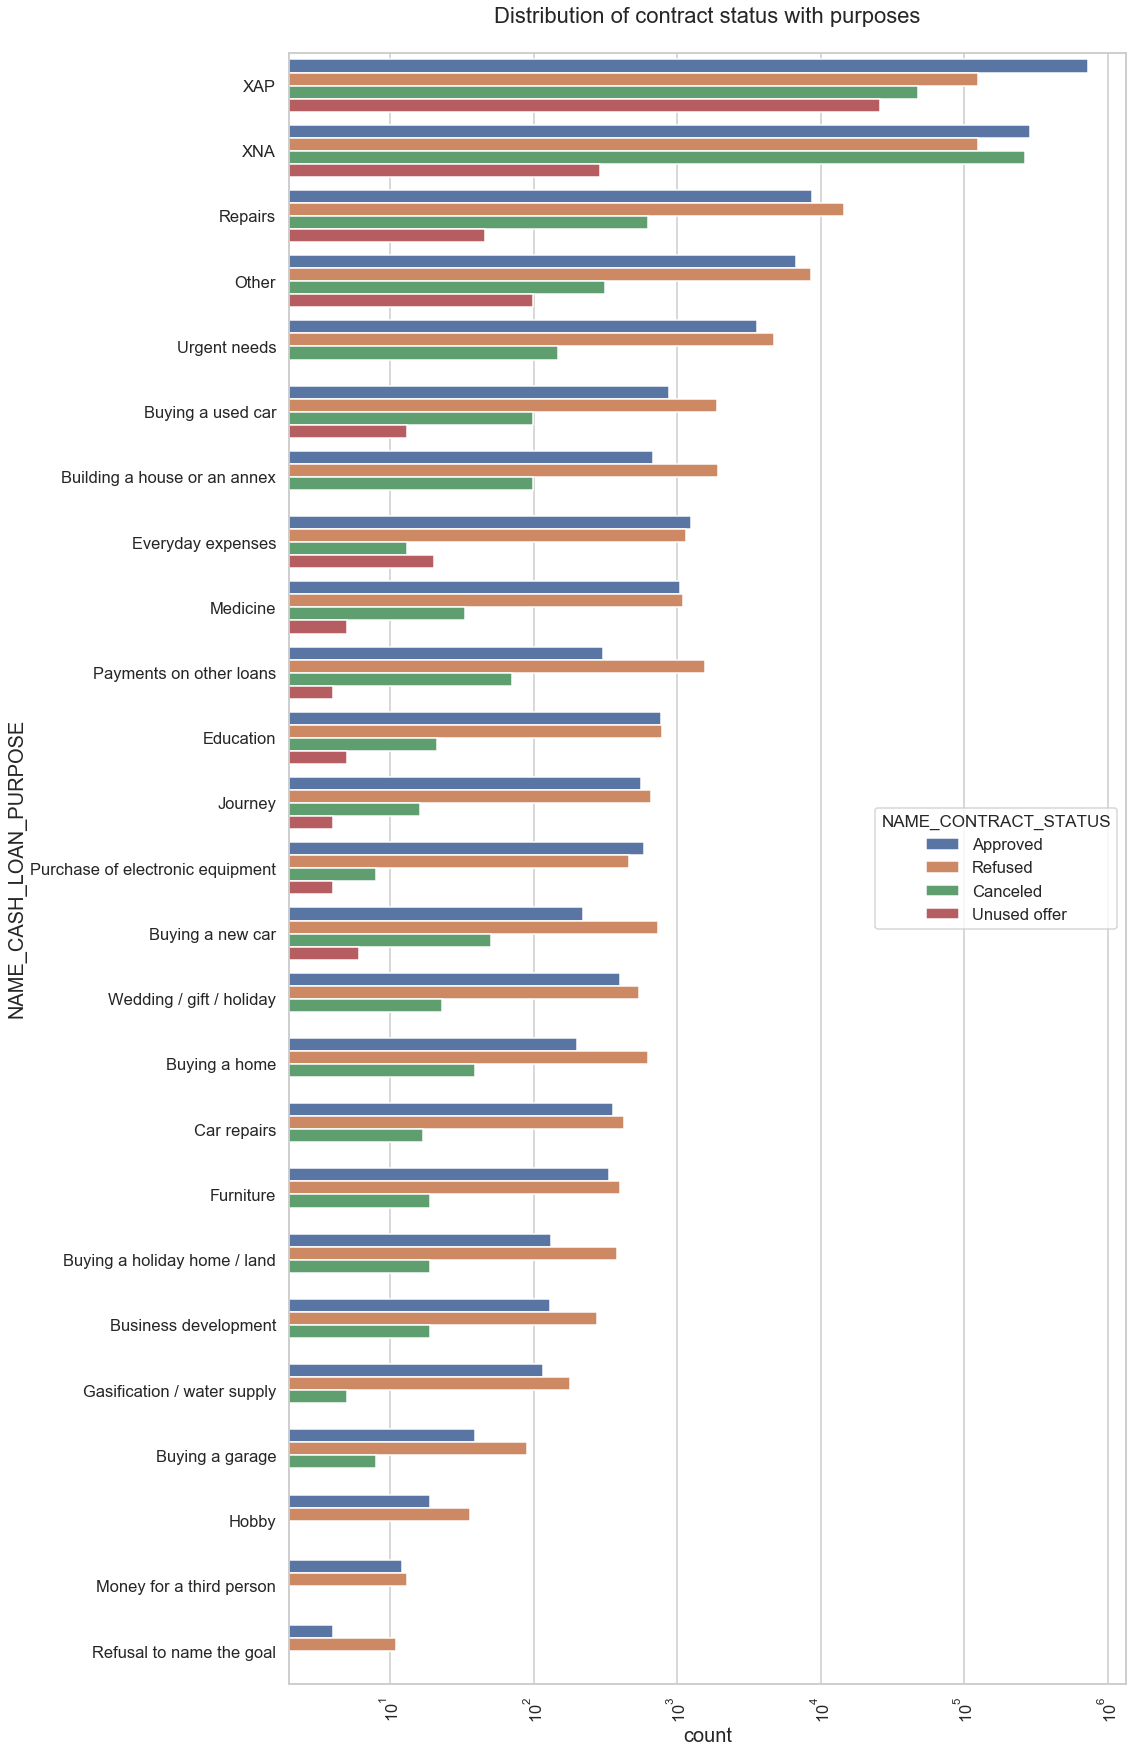

In [93]:

# Relationship between Loan Purpose and Contract Status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = previous_clean, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=previous_clean['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')

#### Observations

- Most rejection of loans came from purpose 'repairs'.
- For education purposes we have equal number of approves and rejection
- Payign other loans and buying a new car is having significant higher rejection than approves

### 9.2 Segmented Univariate Analysis

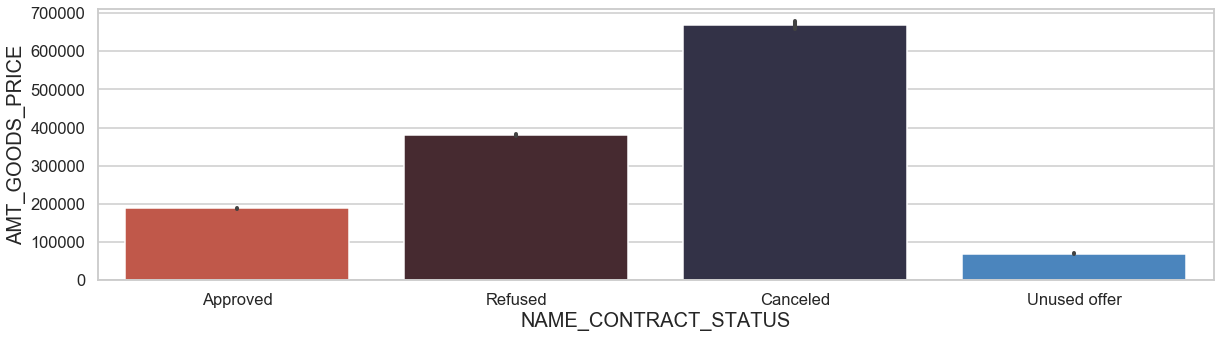

In [94]:
# Segmented Univariate Analysis - Previous Application 
# Analyze impact of target on AMT_GOODS_PRICE on  NAME_CONTRACT_STATUS variables.

# Setting figure size
plt.figure(5,figsize=(20,5))

    
sns.barplot(y="AMT_GOODS_PRICE",x="NAME_CONTRACT_STATUS",data=previous_clean, palette='icefire_r')


plt.show()

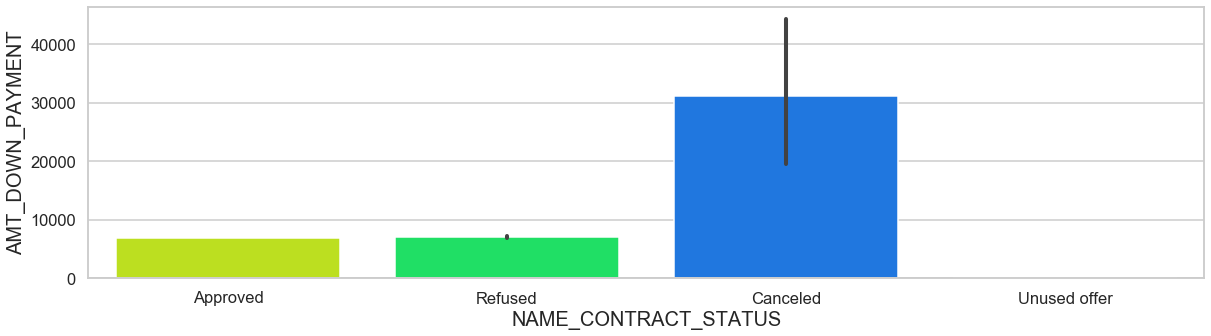

In [95]:

# Segmented Univariate Analysis - Previous Application 
# Analyze impact of target on AMT_DOWN_PAYMENT on  NAME_CONTRACT_STATUS variables.

# Setting figure size
plt.figure(5,figsize=(20,5))

    
sns.barplot(y="AMT_DOWN_PAYMENT",x="NAME_CONTRACT_STATUS",data=previous_clean, palette='hsv')


# plt.legend(bbox_to_anchor=(1, 1))

plt.show()

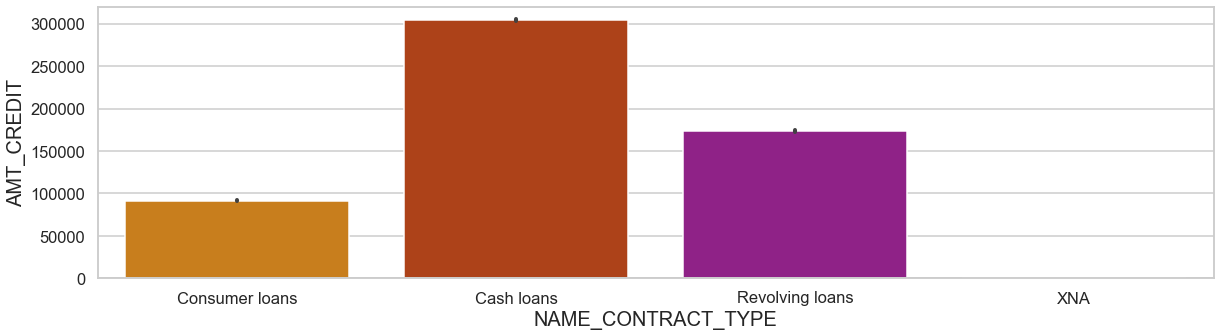

In [96]:
# Segmented Univariate Analysis - Previous Application 
# Analyze impact of target on AMT_CREDIT on  NAME_CONTRACT_TYPE variables.

# Setting figure size
plt.figure(5,figsize=(20,5))


sns.barplot(y="AMT_CREDIT",x="NAME_CONTRACT_TYPE",data=previous_clean,palette='gnuplot_r')


plt.show()

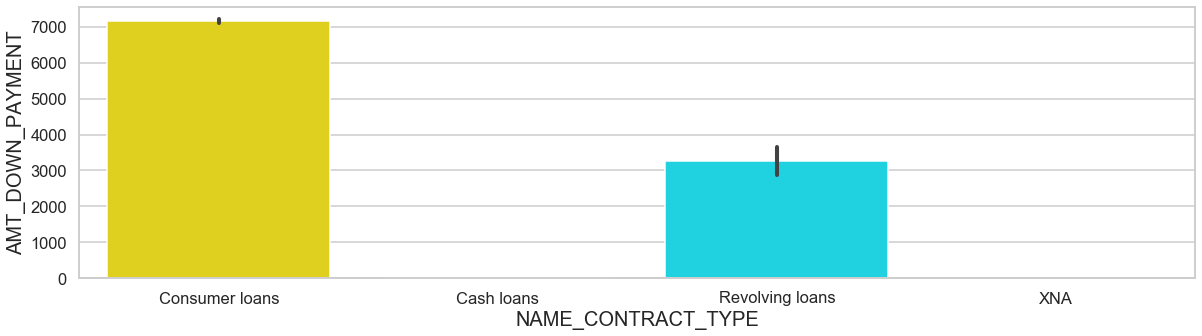

In [97]:
# Segmented Univariate Analysis - Previous Application 
# Analyze impact of target on AMT_DOWN_PAYMENT on  NAME_CONTRACT_TYPE variables.

# Setting figure size
plt.figure(5,figsize=(20,5))


sns.barplot(y="AMT_DOWN_PAYMENT",x="NAME_CONTRACT_TYPE",data=previous_clean,palette='gist_rainbow')


plt.show()

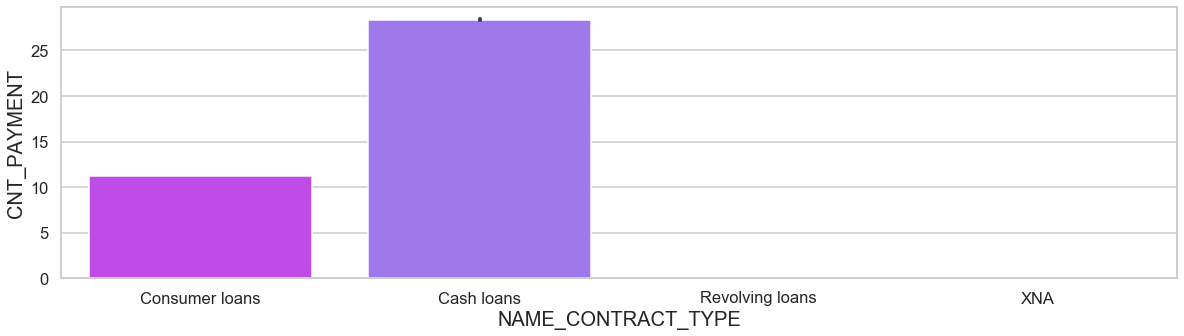

In [98]:
# Segmented Univariate Analysis - Previous Application 
# Analyze impact of target on CNT_PAYMENT on  NAME_CONTRACT_TYPE variables.

# Setting figure size
plt.figure(5,figsize=(20,5))


sns.barplot(y="CNT_PAYMENT",x="NAME_CONTRACT_TYPE",data=previous_clean, palette='cool_r')


# plt.legend(bbox_to_anchor=(1, 1))

plt.show()

# 10. **Merging the Application Data and Previous Application Data.**

In [99]:
# Merging the application_clean and previous_clean

merged_data = pd.merge(application_clean, previous_clean, 
                       how='left',
                       on='SK_ID_CURR',
                       suffixes=('_appli','_prev'))
merged_data.shape

(1226960, 102)

In [100]:
# Quick review of merged_data dataframe
merged_data.describe()

SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.226960e+06  1.226960e+06  1.226960e+06      1.226960e+06   
mean   2.784691e+05  8.794174e-02  3.659288e-01      1.553726e+05   
std    1.027834e+05  2.832103e-01  6.360111e-01      6.125621e+04   
min    1.000020e+05  0.000000e+00  0.000000e+00      2.565000e+04   
25%    1.893710e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.789965e+05  0.000000e+00  0.000000e+00      1.440000e+05   
75%    3.671788e+05  0.000000e+00  1.000000e+00      2.025000e+05   
max    4.562550e+05  1.000000e+00  2.000000e+00      3.370500e+05   

       AMT_CREDIT_appli  AMT_ANNUITY_appli  AMT_GOODS_PRICE_appli  \
count      1.226960e+06       1.226900e+06           1.225799e+06   
mean       5.289330e+05       2.465411e+04           4.718789e+05   
std        3.168263e+05       1.109631e+04           2.847075e+05   
min        4.500000e+04       1.615500e+03           4.050000e+04   
25%        2.695500e+05       1.609650e+04           2.250000e+05   
50%        4.721040e+05       2.371500e+04           4.500000e+05   
75%        7.385670e+05       3.163050e+04           6.750000e+05   
max        1.558814e+06       5.733450e+04           1.345500e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  \
count                1.226960e+06  1.226960e+06   1.226960e+06   
mean                 2.017951e-02  1.629378e+04   7.422836e+04   
std                  1.247191e-02  4.398017e+03   1.445751e+05   
min                  2.900000e-04  7.489000e+03   0.000000e+00   
25%                  1.003200e-02  1.261300e+04   1.014000e+03   
50%                  1.885000e-02  1.603600e+04   2.367000e+03   
75%                  2.639200e-02  2.000300e+04   6.508000e+03   
max                  7.250800e-02  2.520100e+04   3.652430e+05   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    FLAG_MOBIL  FLAG_EMP_PHONE  \
count       1.226960e+06     1.226960e+06  1.226960e+06    1.226960e+06   
mean        5.021684e+03     3.028697e+03  9.999992e-01    8.020490e-01   
std         3.511999e+03     1.504537e+03  9.027860e-04    3.984552e-01   
min         0.000000e+00     0.000000e+00  0.000000e+00    0.000000e+00   
25%         2.056000e+03     1.780000e+03  1.000000e+00    1.000000e+00   
50%         4.545000e+03     3.320000e+03  1.000000e+00    1.000000e+00   
75%         7.539000e+03     4.312000e+03  1.000000e+00    1.000000e+00   
max         1.578100e+04     7.197000e+03  1.000000e+00    1.000000e+00   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  \
count     1.226960e+06      1.226960e+06  1.226960e+06  1.226960e+06   
mean      1.846026e-01      9.990635e-01  2.795364e-01  6.591739e-02   
std       3.879750e-01      3.058733e-02  4.487716e-01  2.481377e-01   
min       0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%       0.000000e+00      1.000000e+00  0.000000e+00  0.000000e+00   
50%       0.000000e+00      1.000000e+00  0.000000e+00  0.000000e+00   
75%       0.000000e+00      1.000000e+00  1.000000e+00  0.000000e+00   
max       1.000000e+00      1.000000e+00  1.000000e+00  1.000000e+00   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count     1.226960e+06          1.226960e+06                 1.226960e+06   
mean      2.101065e+00          2.080345e+00                 2.059665e+00   
std       8.340879e-01          4.807756e-01                 4.738022e-01   
min       0.000000e+00          1.000000e+00                 1.000000e+00   
25%       2.000000e+00          2.000000e+00                 2.000000e+00   
50%       2.000000e+00          2.000000e+00                 2.000000e+00   
75%       2.000000e+00          2.000000e+00                 2.000000e+00   
max       4.000000e+00          3.000000e+00                 3.000000e+00   

       HOUR_APPR_PROCESS_START_appli  REG_REGION_NOT_LIVE_REGION  \
count                   1.226960e+06                1.226960e+06   
mean           

In [101]:
# List of numerical columns in merged dataframe (merged_data)
merged_numcols=list(merged_data.select_dtypes(exclude="object"))
merged_numcols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_appli',
 'AMT_ANNUITY_appli',
 'AMT_GOODS_PRICE_appli',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START_appli',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREA

In [102]:
# List Categorical Variables in merged dataframe (merged_data)
merged_nonnumcols=list(merged_data.select_dtypes(include="object"))
merged_nonnumcols

['NAME_CONTRACT_TYPE_appli',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE_appli',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START_appli',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE_prev',
 'WEEKDAY_APPR_PROCESS_START_prev',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE_prev',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

# 11. **Univariate, Segmented Univariate and Bivariate Analysis of `merged_data`**

### 11.1 Univariate, Segmented Univariate Analysis

length:  9


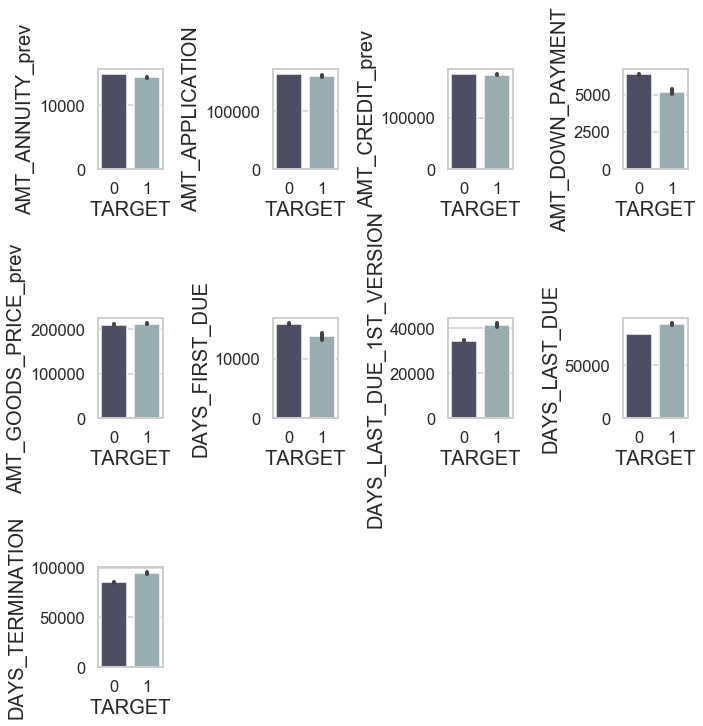

In [103]:

# Segmented Univariate Analysis - All App Data (merged dataframe)
# Analyze impact of target on other quantitative variables.

# Selecting only limited columns for univariate from merged dataframe

cols2anzuni = ["AMT_ANNUITY_prev", "AMT_APPLICATION","AMT_CREDIT_prev", "AMT_DOWN_PAYMENT","AMT_GOODS_PRICE_prev",
               "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", "DAYS_TERMINATION"]


# Number of numerical columns
ln=len(cols2anzuni)
print("length: ",ln)

# calculation for subplots
n=4
m=(ln//n)+1
ct=1

# Setting figure size
plt.figure(5,figsize=(10,10))

# Running in loop to plot all columns as subplot
for column in cols2anzuni:
#     print("ct: ",ct)
    plt.subplot(m,n,ct)

    #     plt.yscale("log")
    sns.barplot(y=column,x="TARGET",data=merged_data, palette='bone')
    ct+=1

# plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

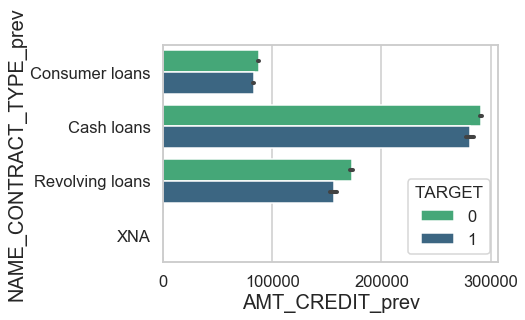

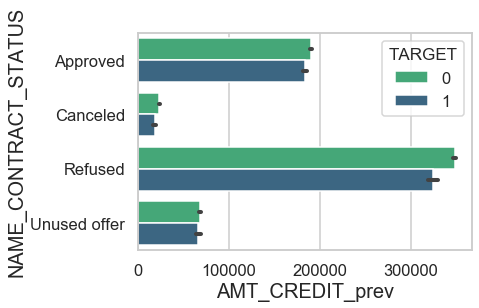

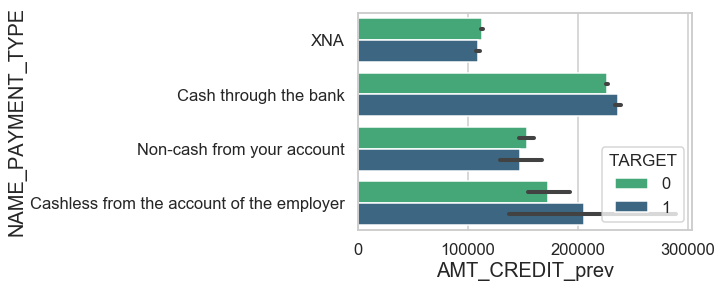

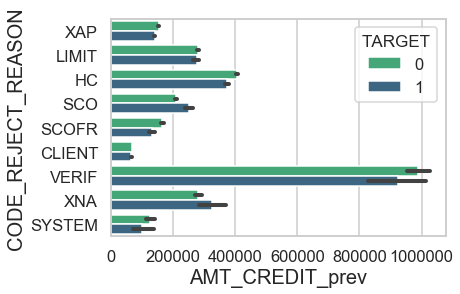

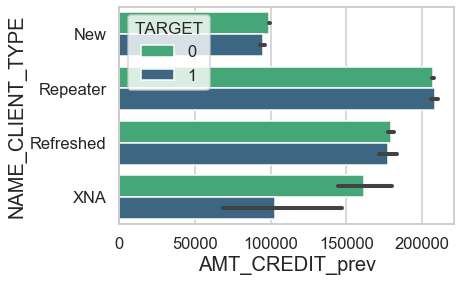

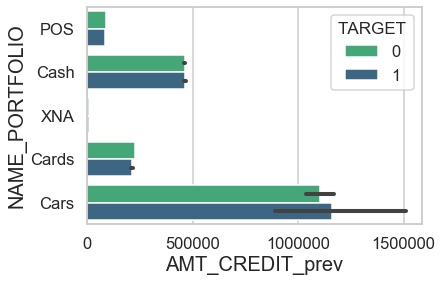

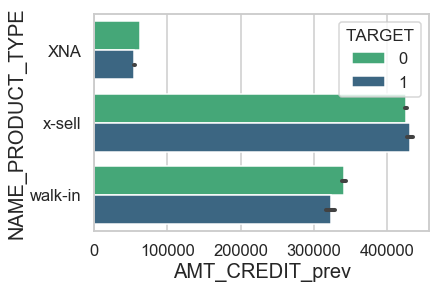

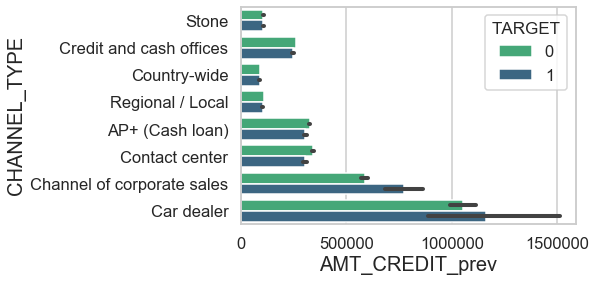

In [104]:
# Segmented Univariate Analysis - All App Data (merged dataframe)
# Analyze impact of target on other categorical variables.

# Selecting only limited columns for univariate from merged dataframe

cols2anzuni2 = ["NAME_CONTRACT_TYPE_prev", "NAME_CONTRACT_STATUS", "NAME_PAYMENT_TYPE",
                "CODE_REJECT_REASON", "NAME_CLIENT_TYPE","NAME_PORTFOLIO", 
                "NAME_PRODUCT_TYPE", "CHANNEL_TYPE"]

# Running in loop to plot all columns
for column in cols2anzuni2:

    sns.barplot(y=column,x='AMT_CREDIT_prev',data=merged_data, hue = 'TARGET', palette='viridis_r')
    plt.show()

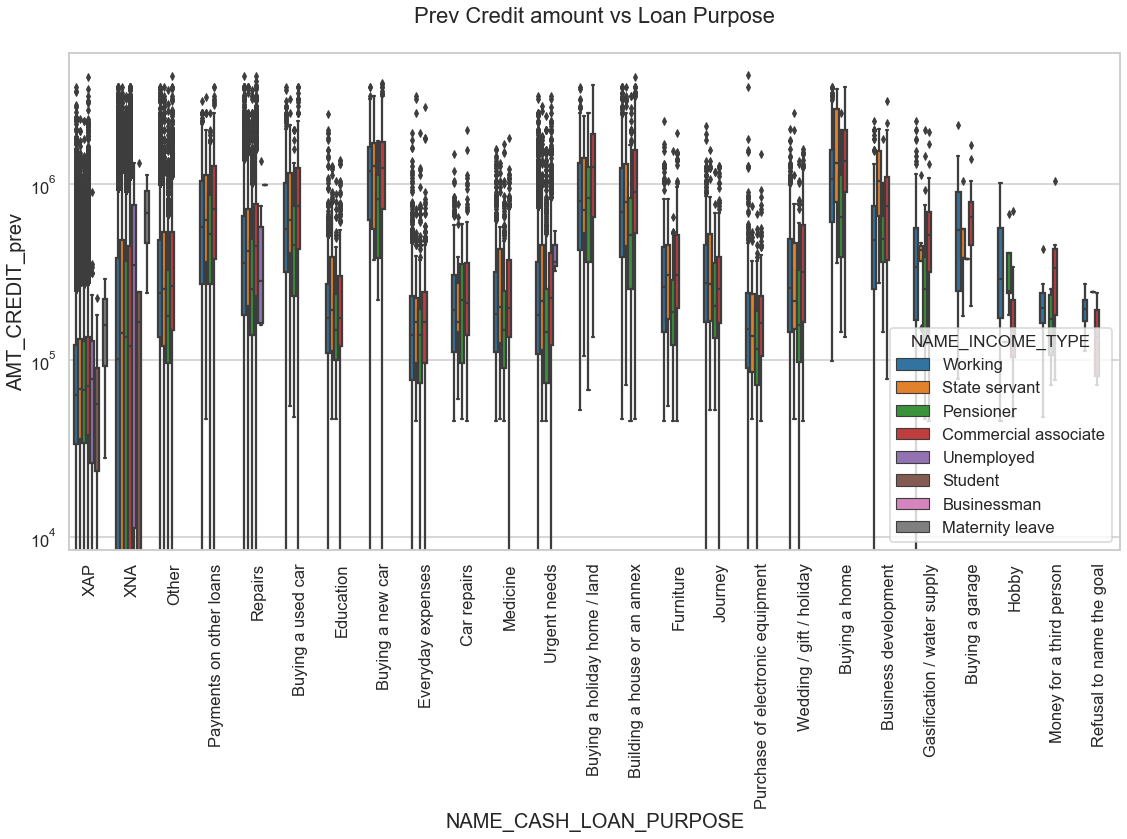

In [111]:

# Box plotting for Credit amount in logarithmic scale

f = plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =merged_data, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_prev',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
f.tight_layout()
plt.show()

#### Conclusion

- The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
- Income type of state servants have a significant amount of credit applied
- Money for third person or a Hobby is having less credits applied for.

# **THANK YOU**